## Installing packages

In [ ]:
pip install yfinance


In [ ]:
pip install python-louvain

## Importing the libraries

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx


## Data Acquisition and Preprocessing

### Data Fetching

In [ ]:
import pandas as pd
import yfinance as yf

# Fetch the S&P 500 companies' data from Wikipedia
sp500url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
data_table = pd.read_html(sp500url)
sp500_data = data_table[0]

# Manually replace tickers 'BRK.B' with 'BRK-B' and 'BF.B' with 'BF-B'
sp500_data['Symbol'] = sp500_data['Symbol'].replace('BRK.B', 'BRK-B').replace('BF.B', 'BF-B')

# Define sector abbreviations as per your provided mapping
sector_abbreviations = {
    'Communication Services': 'ComServ',
    'Consumer Discretionary': 'CD',
    'Consumer Staples': 'CS',
    'Energy': 'EN',
    'Financials': 'Fin',
    'Health Care': 'HC',
    'Industrials': 'IN',
    'Information Technology': 'IT',
    'Materials': 'MT',
    'Real Estate': 'RE',
    'Utilities': 'UT'
}

# Fetch full names and sectors for all companies
companies = sp500_data['Security'].tolist()
sectors = sp500_data['GICS Sector'].tolist()

# Initialize lists to store combined names
combined_names = []

# Combine sector abbreviation and company name
for company, sector in zip(companies, sectors):
    # Extract sector abbreviation
    sector_abbreviation = sector_abbreviations.get(sector, 'OT')  # 'OT' for 'Other' if not found

    # Combine sector abbreviation and company name
    combined_name = f"({sector_abbreviation}_{company})"
    combined_names.append(combined_name)

# Download the historical Adj Close prices for the valid tickers
tickers = sp500_data['Symbol'].tolist()
start_date = '2019-01-01'
end_date = '2019-12-31'
sp500_prices = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Replace the tickers with combined names in the column names
sp500_prices.columns = combined_names

# Print the DataFrame with combined names
print(sp500_prices)


[*********************100%%**********************]  503 of 503 completed

ERROR:yfinance:
7 Failed downloads:
ERROR:yfinance:['VLTO', 'OTIS', 'ABNB', 'KVUE', 'CEG', 'CARR', 'GEHC']: Exception("%ticker%: Data doesn't exist for startDate = 1546318800, endDate = 1577768400")



              (IN_3M)  (IN_A. O. Smith)  (HC_Abbott)  (HC_AbbVie)  \
Date                                                                
2019-01-02  63.488911         31.963158    37.893322    70.646530   
2019-01-03  61.150002         29.581665    34.118881    68.318840   
2019-01-04  63.266617         31.530161    35.575382    70.519867   
2019-01-07  64.610023         32.425678    35.496212    71.549118   
2019-01-08  65.557198         31.904110    36.172878    71.881653   
...               ...               ...          ...          ...   
2019-12-23  82.931427         29.192120    69.170486    75.492065   
2019-12-24  82.970345         29.072563    69.236237    75.157478   
2019-12-26  83.116257         29.560759    70.609909    75.140747   
2019-12-27  83.087074         28.335287    70.583115    74.613770   
2019-12-30  82.755669         28.195801    71.002029    74.044952   

            (IT_Accenture)   (CS_ADM)  (IT_Adobe Inc.)    (IN_ADP)  \
Date                           

In [ ]:
sp500_prices.to_csv("sp2019.csv")

In [ ]:
import pandas as pd
import yfinance as yf

# Fetch the S&P 500 companies' data from Wikipedia
sp500url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
data_table = pd.read_html(sp500url)
sp500_data = data_table[0]

# Manually replace tickers 'BRK.B' with 'BRK-B' and 'BF.B' with 'BF-B'
sp500_data['Symbol'] = sp500_data['Symbol'].replace('BRK.B', 'BRK-B').replace('BF.B', 'BF-B')

# Define sector abbreviations as per your provided mapping
sector_abbreviations = {
    'Communication Services': 'ComServ',
    'Consumer Discretionary': 'CD',
    'Consumer Staples': 'CS',
    'Energy': 'EN',
    'Financials': 'Fin',
    'Health Care': 'HC',
    'Industrials': 'IN',
    'Information Technology': 'IT',
    'Materials': 'MT',
    'Real Estate': 'RE',
    'Utilities': 'UT'
}

# Fetch full names and sectors for all companies
companies = sp500_data['Security'].tolist()
sectors = sp500_data['GICS Sector'].tolist()

# Initialize lists to store combined names
combined_names = []

# Combine sector abbreviation and company name
for company, sector in zip(companies, sectors):
    # Extract sector abbreviation
    sector_abbreviation = sector_abbreviations.get(sector, 'OT')  # 'OT' for 'Other' if not found

    # Combine sector abbreviation and company name
    combined_name = f"({sector_abbreviation}_{company})"
    combined_names.append(combined_name)

# Download the historical Adj Close prices for the valid tickers
tickers = sp500_data['Symbol'].tolist()
start_date = '2020-01-01'
end_date = '2020-12-31'
sp500_20 = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Replace the tickers with combined names in the column names
sp500_20.columns = combined_names

# Print the DataFrame with combined names
sp500_20


[*********************100%%**********************]  503 of 503 completed

ERROR:yfinance:
4 Failed downloads:
ERROR:yfinance:['VLTO', 'KVUE', 'CEG', 'GEHC']: Exception("%ticker%: Data doesn't exist for startDate = 1577854800, endDate = 1609390800")



[*********************100%%**********************]  504 of 503 completed

(IN_3M)  (IN_A. O. Smith)  (HC_Abbott)  (HC_AbbVie)  \
Date                                                                 
2020-01-02   83.779129         28.982893    73.152664    74.906540   
2020-01-03   82.433975         27.548195    72.441444    74.195518   
2020-01-06   82.677673         27.219410    73.018692    74.781052   
2020-01-07   82.931122         27.119778    72.675293    74.354454   
2020-01-08   83.749886         27.737495    73.844360    74.881424   
...                ...               ...          ...          ...   
2020-12-23  115.076118         15.890000   128.687241    91.173935   
2020-12-24  115.085930         15.660000   129.679749    91.156288   
2020-12-28  115.596069         16.059999   134.317810    91.324013   
2020-12-29  115.007454         15.860000   132.529404    92.427490   
2020-12-30  115.164413         16.150000   131.399353    92.930679   

            (IT_Accenture)    (CS_ADM)  (IT_Adobe Inc.)    (IN_ADP)  \
Date                                                                  
2020-01-02             NaN   81.280243        43.400002  198.402542   
2020-01-03             NaN   80.289375        43.349998  198.072128   
2020-01-06             NaN   80.710030        43.520000  196.778687   
2020-01-07             NaN   80.261337        43.160000  192.530243   
2020-01-08             NaN   80.588509        42.730000  192.907867   
...                    ...         ...              ...         ...   
2020-12-23      158.009995  102.027061        35.080002  246.950729   
2020-12-24      154.839996  102.881638        34.860001  246.816391   
2020-12-28      149.000000  102.349915        35.330002  249.099426   
2020-12-29      150.000000  102.862648        35.299999  247.257721   
2020-12-30      148.429993  102.967110        35.580002  247.046661   

            (UT_AES Corporation)  (Fin_Aflac)  ...  \
Date                                           ...   
2020-01-02            334.429993   112.303558  ...   
2020-01-03            331.809998   110.326599  ...   
2020-01-06            333.709991   109.030403  ...   
2020-01-07            333.390015   111.510910  ...   
2020-01-08            337.869995   112.518036  ...   
...                          ...          ...  ...   
2020-12-23            496.910004   136.309586  ...   
2020-12-24            499.859985   137.499268  ...   
2020-12-28            498.950012   137.699142  ...   
2020-12-29            502.109985   136.728363  ...   
2020-12-30            497.450012   139.126755  ...   

            (Fin_Willis Towers Watson)  (IN_W. W. Grainger)  \
Date                                                          
2020-01-02                  141.295837            56.082611   
2020-01-03                  139.199997            56.352329   
2020-01-06                  138.924515            56.271408   
2020-01-07                  139.583740            56.154533   
2020-01-08                  140.459457            56.100590   
...                                ...                  ...   
2020-12-23                  114.401932            59.337597   
2020-12-24                  113.499001            59.632854   
2020-12-28                  114.570595            60.269508   
2020-12-29                  113.419632            60.361763   
2020-12-30                  112.516724            60.573986   

            (CD_Wynn Resorts)  (UT_Xcel Energy)  (IN_Xylem Inc.)  \
Date                                                               
2020-01-02          57.528831         54.571384        76.070862   
2020-01-03          57.066322         53.967487        76.518631   
2020-01-06          57.504490         54.264645        76.023247   
2020-01-07          57.033878         54.552219        75.737427   
2020-01-08          56.173794         55.127354        75.994652   
...                       ...               ...              ...   
2020-12-23          36.599270         49.942631        96.266678   
2020-12-24          36.450310         50.1458

In [ ]:
sp500_20.to_csv("sp2020.csv")

In [ ]:
import pandas as pd
import yfinance as yf

# Fetch the S&P 500 companies' data from Wikipedia
sp500url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
data_table = pd.read_html(sp500url)
sp500_data = data_table[0]

# Manually replace tickers 'BRK.B' with 'BRK-B' and 'BF.B' with 'BF-B'
sp500_data['Symbol'] = sp500_data['Symbol'].replace('BRK.B', 'BRK-B').replace('BF.B', 'BF-B')

# Define sector abbreviations as per your provided mapping
sector_abbreviations = {
    'Communication Services': 'ComServ',
    'Consumer Discretionary': 'CD',
    'Consumer Staples': 'CS',
    'Energy': 'EN',
    'Financials': 'Fin',
    'Health Care': 'HC',
    'Industrials': 'IN',
    'Information Technology': 'IT',
    'Materials': 'MT',
    'Real Estate': 'RE',
    'Utilities': 'UT'
}

# Fetch full names and sectors for all companies
companies = sp500_data['Security'].tolist()
sectors = sp500_data['GICS Sector'].tolist()

# Initialize lists to store combined names
combined_names = []

# Combine sector abbreviation and company name
for company, sector in zip(companies, sectors):
    # Extract sector abbreviation
    sector_abbreviation = sector_abbreviations.get(sector, 'OT')  # 'OT' for 'Other' if not found

    # Combine sector abbreviation and company name
    combined_name = f"({sector_abbreviation}_{company})"
    combined_names.append(combined_name)

# Download the historical Adj Close prices for the valid tickers
tickers = sp500_data['Symbol'].tolist()
start_date = '2021-01-01'
end_date = '2021-12-31'
sp500_21 = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Replace the tickers with combined names in the column names
sp500_21.columns = combined_names

# Print the DataFrame with combined names
sp500_21


[*********************100%%**********************]  503 of 503 completed

ERROR:yfinance:
4 Failed downloads:
ERROR:yfinance:['GEHC', 'KVUE', 'VLTO', 'CEG']: Exception("%ticker%: Data doesn't exist for startDate = 1609477200, endDate = 1640926800")


(IN_3M)  (IN_A. O. Smith)  (HC_Abbott)  (HC_AbbVie)  \
Date                                                                 
2021-01-04  116.581589         15.130000   127.164169    93.054268   
2021-01-05  117.534760         15.430000   128.736374    94.016495   
2021-01-06  120.757843         15.520000   124.402924    93.204346   
2021-01-07  123.971130         15.380000   128.647949    94.201897   
2021-01-08  124.855499         15.130000   129.758362    94.696243   
...                ...               ...          ...          ...   
2021-12-23  155.695862         18.260000   174.288620   123.125160   
2021-12-27  156.623337         18.170000   178.292877   124.346321   
2021-12-28  157.057465         18.540001   177.264633   124.327827   
2021-12-29  158.507874         18.049999   177.353622   125.225204   
2021-12-30  158.734802         18.070000   176.186935   125.752518   

            (IT_Accenture)    (CS_ADM)  (IT_Adobe Inc.)    (IN_ADP)  \
Date                                                                  
2021-01-04      139.149994  103.603279        34.900002  246.010635   
2021-01-05      148.300003  104.885162        35.040001  247.411194   
2021-01-06      142.770004  104.666763        36.580002  250.116257   
2021-01-07      151.270004  105.682762        36.240002  252.476105   
2021-01-08      149.770004  105.977119        36.439999  253.396927   
...                    ...         ...              ...         ...   
2021-12-23      171.309998  134.179138        43.480000  391.659332   
2021-12-27      171.679993  136.396820        43.930000  403.332092   
2021-12-28      169.710007  135.442245        44.270000  403.273804   
2021-12-29      167.440002  136.136475        44.599998  403.419464   
2021-12-30      168.779999  135.953262        44.330002  401.875397   

            (UT_AES Corporation)  (Fin_Aflac)  ...  \
Date                                           ...   
2021-01-04            485.339996   138.974503  ...   
2021-01-05            485.690002   141.458572  ...   
2021-01-06            466.309998   142.096207  ...   
2021-01-07            477.739990   148.101761  ...   
2021-01-08            485.100006   149.177261  ...   
...                          ...          ...  ...   
2021-12-23            569.619995   167.068558  ...   
2021-12-27            577.679993   169.787552  ...   
2021-12-28            569.359985   168.732864  ...   
2021-12-29            569.289978   169.835938  ...   
2021-12-30            570.530029   169.119888  ...   

            (Fin_Willis Towers Watson)  (IN_W. W. Grainger)  \
Date                                                          
2021-01-04                  106.067352            60.583218   
2021-01-05                  109.331726            59.992699   
2021-01-06                  109.986580            61.321362   
2021-01-07                  108.895157            60.121887   
2021-01-08                  108.180756            60.675480   
...                                ...                  ...   
2021-12-23                   88.187706            63.188358   
2021-12-27                   86.897835            63.387569   
2021-12-28                   85.786560            64.146477   
2021-12-29                   84.318092            64.469017   
2021-12-30                   85.478973            64.725143   

            (CD_Wynn Resorts)  (UT_Xcel Energy)  (IN_Xylem Inc.)  \
Date                                                               
2021-01-04          36.362690         52.013485        96.228073   
2021-01-05          38.115108         53.503727        96.112244   
2021-01-06          39.087696         56.087479       100.166382   
2021-01-07          39.394367         55.797161       104.712814   
2021-01-08          39.832474         56.300365       103.651016   
...                       ...               ...              ...   
2021-12-23          56.753986         53.919926       114.501877   
2021-12-27          57.563168         54.4257

In [ ]:
sp500_21.to_csv("sp2021.csv")

In [ ]:
import pandas as pd
import yfinance as yf

# Fetch the S&P 500 companies' data from Wikipedia
sp500url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
data_table = pd.read_html(sp500url)
sp500_data = data_table[0]

# Manually replace tickers 'BRK.B' with 'BRK-B' and 'BF.B' with 'BF-B'
sp500_data['Symbol'] = sp500_data['Symbol'].replace('BRK.B', 'BRK-B').replace('BF.B', 'BF-B')

# Define sector abbreviations as per your provided mapping
sector_abbreviations = {
    'Communication Services': 'ComServ',
    'Consumer Discretionary': 'CD',
    'Consumer Staples': 'CS',
    'Energy': 'EN',
    'Financials': 'Fin',
    'Health Care': 'HC',
    'Industrials': 'IN',
    'Information Technology': 'IT',
    'Materials': 'MT',
    'Real Estate': 'RE',
    'Utilities': 'UT'
}

# Fetch full names and sectors for all companies
companies = sp500_data['Security'].tolist()
sectors = sp500_data['GICS Sector'].tolist()

# Initialize lists to store combined names
combined_names = []

# Combine sector abbreviation and company name
for company, sector in zip(companies, sectors):
    # Extract sector abbreviation
    sector_abbreviation = sector_abbreviations.get(sector, 'OT')  # 'OT' for 'Other' if not found

    # Combine sector abbreviation and company name
    combined_name = f"({sector_abbreviation}_{company})"
    combined_names.append(combined_name)

# Download the historical Adj Close prices for the valid tickers
tickers = sp500_data['Symbol'].tolist()
start_date = '2022-01-01'
end_date = '2022-12-31'
sp500_22 = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Replace the tickers with combined names in the column names
sp500_22.columns = combined_names

# Print the DataFrame with combined names
sp500_22


[*********************100%%**********************]  503 of 503 completed

ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['KVUE', 'VLTO']: Exception("%ticker%: Data doesn't exist for startDate = 1641013200, endDate = 1672462800")


(IN_3M)  (IN_A. O. Smith)  (HC_Abbott)  (HC_AbbVie)  \
Date                                                                 
2022-01-03  154.596817         18.750000   179.953918   125.280708   
2022-01-04  149.370483         19.020000   177.669983   125.040169   
2022-01-05  146.811661         18.680000   172.944000   125.697006   
2022-01-06  147.325394         18.570000   170.056976   125.104927   
2022-01-07  143.403168         19.280001   170.225067   124.781166   
...                ...               ...          ...          ...   
2022-12-23  148.183105         12.710000   131.127060   156.766937   
2022-12-27  148.500885         12.530000   129.307236   156.661209   
2022-12-28  147.051102         12.320000   125.339409   155.930710   
2022-12-29  150.030060         12.700000   128.889572   156.247894   
2022-12-30  148.821777         12.720000   129.207779   155.334778   

            (IT_Accenture)    (CS_ADM)  (IT_Adobe Inc.)    (IN_ADP)  \
Date                                                                  
2022-01-03      172.679993  134.063416        44.549999  395.446686   
2022-01-04      170.800003  130.910477        45.130001  392.620697   
2022-01-05      162.250000  130.322311        44.599998  385.706329   
2022-01-06      159.750000  130.303024        44.860001  367.080475   
2022-01-07      166.050003  130.707993        45.070000  360.039917   
...                    ...         ...              ...         ...   
2022-12-23       85.250000  106.058311        63.380001  261.928558   
2022-12-27       83.489998  106.440659        63.619999  261.160706   
2022-12-28       82.489998  105.715172        62.599998  259.005005   
2022-12-29       85.230003  108.146530        63.110001  264.182739   
2022-12-30       85.500000  107.636742        62.779999  262.666809   

            (UT_AES Corporation)  (Fin_Aflac)  ...  \
Date                                           ...   
2022-01-03            564.369995   171.413132  ...   
2022-01-04            554.000000   169.864960  ...   
2022-01-05            514.429993   167.242722  ...   
2022-01-06            514.119995   167.774902  ...   
2022-01-07            510.700012   163.372253  ...   
...                          ...          ...  ...   
2022-12-23            338.450012   161.535767  ...   
2022-12-27            335.089996   159.918839  ...   
2022-12-28            328.329987   158.025848  ...   
2022-12-29            337.579987   161.673813  ...   
2022-12-30            336.529999   161.723114  ...   

            (Fin_Willis Towers Watson)  (IN_W. W. Grainger)  \
Date                                                          
2022-01-03                   87.086349            64.450035   
2022-01-04                   86.808533            64.857956   
2022-01-05                   83.593773            65.493530   
2022-01-06                   83.980736            64.981270   
2022-01-07                   83.891441            65.550446   
...                                ...                  ...   
2022-12-23                   80.091270            68.689735   
2022-12-27                   83.673149            69.309525   
2022-12-28                   79.466164            68.810280   
2022-12-29                   80.627060            69.297813   
2022-12-30                   81.827637            68.361755   

            (CD_Wynn Resorts)  (UT_Xcel Energy)  (IN_Xylem Inc.)  \
Date                                                               
2022-01-03          59.097820         55.447815       113.907448   
2022-01-04          61.320736         55.730457       115.115799   
2022-01-05          62.083401         54.833782       113.546860   
2022-01-06          63.543640         54.794800       113.390961   
2022-01-07          64.064491         54.970234       112.484688   
...                       ...               ...              ...   
2022-12-23         105.091942         31.343016       108.321198   
2022-12-27         106.552094         31.5793

In [ ]:
sp500_22.to_csv("sp2022.csv")

### Data Cleaning

In [ ]:
# Sort columns alphabetically and then numerically
sp500_prices = pd.read_csv("/content/drive/MyDrive/Project_SNA/19.csv")
sp500_sorted = sp500_prices.reindex(sorted(sp500_prices.columns, key=lambda s: ("".join([c for c in s if c.isalpha()]), int("".join([c for c in s if c.isdigit()])) if any(c.isdigit() for c in s) else 0)), axis=1)
# Function to remove consecutive NaN values
def remove_consecutive_nan(df, threshold):
    mask = df.notna().cumsum().mask(df.notna()).apply(pd.Series.value_counts).gt(threshold)
    return df.loc[:, ~mask.any(axis=0)]
sp500_nan = remove_consecutive_nan(sp500_sorted, 3)
sp500_nan

CD_AMZN    CD_APTV       CD_AZO    CD_BBWI     CD_BBY      CD_BKNG  \
0    76.956497  60.352283   838.479981  18.880033  45.637390  1721.699951   
1    75.014000  59.631809   845.580017  18.987673  44.700809  1663.119995   
2    78.769501  61.803108   835.630005  19.884672  44.913673  1717.550049   
3    81.475502  62.740719   822.320007  20.717087  47.476513  1711.819946   
4    82.829002  66.135834   811.369995  20.236298  48.872879  1686.920044   
..         ...        ...          ...        ...        ...          ...   
246  89.650002  95.287651  1213.869995  13.896812  76.743546  2032.099976   
247  89.460503  94.649277  1219.310059  13.858779  76.997482  2044.000000   
248  93.438499  95.477173  1210.719971  13.988088  76.927437  2064.320068   
249  93.489998  96.065666  1202.589966  13.851172  76.191887  2072.540039   
250  92.344498  95.008362  1183.250000  13.744682  76.682251  2053.870117   

        CD_BWA     CD_CCL      CD_CMG     CD_CZR  ...      UT_NI     UT_NRG  \
0    28.197596  47.317493  443.359985  37.950001  ...  21.203173  32.862415   
1    27.346775  44.963486  439.450012  37.380001  ...  21.228550  32.551994   
2    28.374186  47.507332  455.000000  39.450001  ...  21.600681  33.664360   
3    29.112635  48.067360  485.149994  40.799999  ...  21.719088  33.974792   
4    30.027668  49.263351  497.369995  42.180000  ...  22.125052  34.492180   
..         ...        ...         ...        ...  ...        ...        ...   
246  36.291306  50.668629  828.289978  59.090000  ...  23.895044  34.667789   
247  35.947231  50.352322  828.890015  59.180000  ...  23.877632  34.503437   
248  35.889889  50.737823  838.599976  59.060001  ...  23.807993  33.932564   
249  35.848927  50.737823  836.789978  59.160000  ...  23.755764  33.932564   
250  35.554008  50.431400  836.070007  59.009998  ...  23.955976  33.932564   

        UT_PCG     UT_PEG     UT_PNW     UT_PPL      UT_SO     UT_SRE  \
0    23.799999  43.195915  67.384148  22.445452  35.536835  39.660908   
1    23.950001  43.187416  68.067184  22.365606  36.040779  39.842937   
2    24.400000  43.654797  68.904694  23.052305  36.341526  41.035439   
3    18.950001  43.748295  68.774620  23.084246  36.260246  41.028011   
4    17.559999  43.918247  69.807274  23.387667  37.292541  42.175930   
..         ...        ...        ...        ...        ...        ...   
246  10.940000  51.397255  74.759178  29.996376  53.765183  58.425953   
247  10.950000  51.318310  74.658348  29.962723  53.654690  58.460861   
248  10.860000  51.423565  74.733955  29.887011  53.688686  58.837296   
249  10.440000  51.379719  74.649948  29.878609  53.935158  59.303486   
250  10.800000  51.458645  74.986015  30.004782  53.833179  59.374229   

        UT_WEC     UT_XEL  
0    58.124538  42.202583  
1    58.279354  42.036282  
2    58.709389  42.447643  
3    58.442768  42.263840  
4    59.044830  42.753960  
..         ...        ...  
246  80.974548  56.293884  
247  81.098457  56.514153  
248  81.213531  56.451221  
249  81.709221  56.747902  
250  81.585297  56.900745  

[251 rows x 493 columns]

In [ ]:
sp500_nan

CD_AMZN    CD_APTV       CD_AZO    CD_BBWI     CD_BBY      CD_BKNG  \
0    76.956497  60.352283   838.479981  18.880033  45.637390  1721.699951   
1    75.014000  59.631809   845.580017  18.987673  44.700809  1663.119995   
2    78.769501  61.803108   835.630005  19.884672  44.913673  1717.550049   
3    81.475502  62.740719   822.320007  20.717087  47.476513  1711.819946   
4    82.829002  66.135834   811.369995  20.236298  48.872879  1686.920044   
..         ...        ...          ...        ...        ...          ...   
246  89.650002  95.287651  1213.869995  13.896812  76.743546  2032.099976   
247  89.460503  94.649277  1219.310059  13.858779  76.997482  2044.000000   
248  93.438499  95.477173  1210.719971  13.988088  76.927437  2064.320068   
249  93.489998  96.065666  1202.589966  13.851172  76.191887  2072.540039   
250  92.344498  95.008362  1183.250000  13.744682  76.682251  2053.870117   

        CD_BWA     CD_CCL      CD_CMG     CD_CZR  ...      UT_NI     UT_NRG  \
0    28.197596  47.317493  443.359985  37.950001  ...  21.203173  32.862415   
1    27.346775  44.963486  439.450012  37.380001  ...  21.228550  32.551994   
2    28.374186  47.507332  455.000000  39.450001  ...  21.600681  33.664360   
3    29.112635  48.067360  485.149994  40.799999  ...  21.719088  33.974792   
4    30.027668  49.263351  497.369995  42.180000  ...  22.125052  34.492180   
..         ...        ...         ...        ...  ...        ...        ...   
246  36.291306  50.668629  828.289978  59.090000  ...  23.895044  34.667789   
247  35.947231  50.352322  828.890015  59.180000  ...  23.877632  34.503437   
248  35.889889  50.737823  838.599976  59.060001  ...  23.807993  33.932564   
249  35.848927  50.737823  836.789978  59.160000  ...  23.755764  33.932564   
250  35.554008  50.431400  836.070007  59.009998  ...  23.955976  33.932564   

        UT_PCG     UT_PEG     UT_PNW     UT_PPL      UT_SO     UT_SRE  \
0    23.799999  43.195915  67.384148  22.445452  35.536835  39.660908   
1    23.950001  43.187416  68.067184  22.365606  36.040779  39.842937   
2    24.400000  43.654797  68.904694  23.052305  36.341526  41.035439   
3    18.950001  43.748295  68.774620  23.084246  36.260246  41.028011   
4    17.559999  43.918247  69.807274  23.387667  37.292541  42.175930   
..         ...        ...        ...        ...        ...        ...   
246  10.940000  51.397255  74.759178  29.996376  53.765183  58.425953   
247  10.950000  51.318310  74.658348  29.962723  53.654690  58.460861   
248  10.860000  51.423565  74.733955  29.887011  53.688686  58.837296   
249  10.440000  51.379719  74.649948  29.878609  53.935158  59.303486   
250  10.800000  51.458645  74.986015  30.004782  53.833179  59.374229   

        UT_WEC     UT_XEL  
0    58.124538  42.202583  
1    58.279354  42.036282  
2    58.709389  42.447643  
3    58.442768  42.263840  
4    59.044830  42.753960  
..         ...        ...  
246  80.974548  56.293884  
247  81.098457  56.514153  
248  81.213531  56.451221  
249  81.709221  56.747902  
250  81.585297  56.900745  

[251 rows x 493 columns]

In [ ]:
sp500_20 = pd.read_csv("/content/drive/MyDrive/Project_SNA/20.csv")
# Sort columns alphabetically and then numerically
sp500_sorted = sp500_20.reindex(sorted(sp500_20.columns, key=lambda s: ("".join([c for c in s if c.isalpha()]), int("".join([c for c in s if c.isdigit()])) if any(c.isdigit() for c in s) else 0)), axis=1)
# Function to remove consecutive NaN values
def remove_consecutive_nan(df, threshold):
    mask = df.notna().cumsum().mask(df.notna()).apply(pd.Series.value_counts).gt(threshold)
    return df.loc[:, ~mask.any(axis=0)]
spnan_20 = remove_consecutive_nan(sp500_sorted, 3)
spnan_20.to_csv("Filtered_2020.csv")
spnan_20

CD_AMZN     CD_APTV       CD_AZO    CD_BBWI     CD_BBY      CD_BKNG  \
0     94.900497   96.065666  1189.739990  13.303514  76.454590  2074.580078   
1     93.748497   93.861275  1187.979980  14.345584  76.340736  2065.479980   
2     95.143997   92.115715  1165.709961  13.813143  76.979988  2047.400024   
3     95.343002   90.958664  1145.380005  13.706652  77.417816  2068.050049   
4     94.598503   92.853836  1147.489990  13.805535  77.627983  2062.899902   
..          ...         ...          ...        ...        ...          ...   
247  159.263504  128.350006  1192.989990  30.177317  92.027176  2100.850098   
248  158.634506  128.419998  1204.219971  30.000219  92.216019  2088.350098   
249  164.197998  128.139999  1192.619995  29.892414  92.242989  2137.919922   
250  166.100006  128.070007  1177.119995  28.945278  90.606392  2185.399902   
251  164.292496  130.789993  1175.869995  29.284092  91.163918  2205.260010   

        CD_BWA     CD_CCL       CD_CMG     CD_CZR  ...      UT_NI     UT_NRG  \
0    36.004585  50.718056   858.190002  59.509998  ...  23.660011  33.560619   
1    34.702023  49.314434   865.130005  58.009998  ...  23.851521  33.041653   
2    34.554565  47.821857   858.020019  58.799999  ...  23.842810  32.332375   
3    34.767559  47.970123   860.080017  59.330002  ...  24.051735  31.891245   
4    34.980553  48.197472   856.729981  59.529999  ...  24.077845  31.882601   
..         ...        ...          ...        ...  ...        ...        ...   
247  33.177383  20.940001  1410.989990  76.680000  ...  19.703382  31.657021   
248  32.624702  20.840000  1412.550049  75.839996  ...  19.865255  31.433012   
249  32.859180  21.709999  1401.489990  73.639999  ...  20.054106  31.567417   
250  32.281376  21.430000  1392.209961  73.370003  ...  20.090075  31.854147   
251  32.817310  21.790001  1374.170044  73.690002  ...  20.278923  32.579937   

     UT_PCG     UT_PEG     UT_PNW     UT_PPL      UT_SO     UT_SRE     UT_WEC  \
0     10.85  51.493729  74.532326  29.794479  53.221237  58.615593  80.257553   
1     10.57  51.484970  74.767578  29.760843  53.170250  58.080997  80.762085   
2     10.38  50.985023  74.691963  29.794479  53.382725  58.568428  80.824043   
3     10.58  50.520161  74.507118  29.592602  53.221237  58.521263  80.514236   
4     10.61  50.835915  74.364296  29.760843  53.204243  58.922195  80.620476   
..      ...        ...        ...        ...        ...        ...        ...   
247   12.51  51.407898  67.529175  23.826326  52.660915  53.253357  80.623436   
248   12.39  51.971722  67.939224  23.924191  53.033386  53.232216  81.305290   
249   12.32  52.126316  68.427803  24.244484  53.201893  53.481674  82.259911   
250   11.96  51.908066  68.986183  24.288967  53.272835  53.439388  82.105331   
251   12.34  52.162685  69.021088  24.546984  53.751732  53.198391  82.323540   

        UT_XEL  
0    56.082611  
1    56.352329  
2    56.271408  
3    56.154537  
4    56.100590  
..         ...  
247  59.337597  
248  59.632847  
249  60.269505  
250  60.361767  
251  60.573990  

[252 rows x 497 columns]

In [ ]:
# Sort columns alphabetically and then numerically
sp500_21 = pd.read_csv("/content/drive/MyDrive/Project_SNA/21.csv")
sp500_sorted = sp500_21.reindex(sorted(sp500_21.columns, key=lambda s: ("".join([c for c in s if c.isalpha()]), int("".join([c for c in s if c.isdigit()])) if any(c.isdigit() for c in s) else 0)), axis=1)
# Function to remove consecutive NaN values
def remove_consecutive_nan(df, threshold):
    mask = df.notna().cumsum().mask(df.notna()).apply(pd.Series.value_counts).gt(threshold)
    return df.loc[:, ~mask.any(axis=0)]
spnan_21 = remove_consecutive_nan(sp500_sorted, 3)
spnan_21
# spnan_21.to_csv("Filtered_2021.csv")

CD_ABNB     CD_AMZN     CD_APTV       CD_AZO    CD_BBWI     CD_BBY  \
0    139.149994  159.331497  129.509995  1180.400024  32.012936  90.363594   
1    148.300003  160.925507  133.389999  1180.349976  32.683914  90.822205   
2    142.770004  156.919006  138.110001  1229.699951  35.206142  95.237419   
3    151.270004  158.108002  144.800003  1246.040039  37.324169  96.856033   
4    149.770004  159.134995  145.559998  1252.920044  37.793049  96.730156   
..          ...         ...         ...          ...        ...        ...   
246  171.309998  171.068497  162.399994  2014.500000  69.500000  90.470810   
247  171.679993  169.669495  163.449997  2047.060059  69.800003  91.393227   
248  169.710007  170.660996  162.630005  2059.939941  68.660004  91.799088   
249  167.440002  169.201004  163.210007  2104.040039  69.500000  93.035126   
250  168.779999  168.644501  163.139999  2084.520020  69.699997  93.671593   

         CD_BKNG     CD_BWA     CD_CCL       CD_CMG  ...      UT_NI  \
0    2164.080078  31.871058  20.379999  1319.119995  ...  21.609674   
1    2188.070068  32.624714  20.600000  1355.109985  ...  21.552250   
2    2249.810059  33.637955  20.400000  1343.410034  ...  22.030764   
3    2239.850098  34.416725  20.740000  1368.140015  ...  21.179008   
4    2281.540039  33.738434  20.469999  1402.439941  ...  20.872761   
..           ...        ...        ...          ...  ...        ...   
246  2402.250000  37.148666  21.200001  1748.670044  ...  26.654858   
247  2394.510010  37.761848  20.950001  1766.239990  ...  26.853256   
248  2386.909912  38.247284  20.900000  1752.910034  ...  27.140934   
249  2384.679932  38.213219  20.790001  1748.599976  ...  27.478212   
250  2395.919922  38.170635  20.530001  1747.219971  ...  27.329412   

        UT_NRG  UT_PCG     UT_PEG     UT_PNW     UT_PPL      UT_SO     UT_SRE  \
0    32.526176   12.21  50.680382  69.003632  24.538088  52.643181  57.841545   
1    32.983154   12.38  50.689480  67.817085  24.564783  52.989040  57.659328   
2    33.350536   12.38  51.753464  70.216370  25.009632  54.283833  57.846218   
3    33.511818   12.31  51.016850  68.000298  24.680437  54.221764  56.019398   
4    34.954433   12.24  52.117222  67.851967  24.742720  54.603104  55.963329   
..         ...     ...        ...        ...        ...        ...        ...   
246  39.069958   12.00  60.721443  62.799553  27.718199  61.493073  64.705002   
247  39.227348   11.91  61.172760  62.781319  27.821835  61.881218  65.080002   
248  39.514359   12.06  61.661690  63.537727  28.047953  62.592812  65.394997   
249  39.708778   11.99  62.028397  63.674423  28.066793  62.907017  65.724998   
250  39.727299   12.07  62.357471  64.248573  28.217539  63.175030  65.885002   

        UT_WEC     UT_XEL  
0    82.168991  60.583221  
1    81.905327  59.992695  
2    82.941765  61.321354  
3    80.241592  60.121883  
4    79.959740  60.675491  
..         ...        ...  
246  88.647141  63.188354  
247  89.237175  63.387562  
248  90.379791  64.146469  
249  90.773163  64.469017  
250  90.960480  64.725136  

[251 rows x 500 columns]

In [ ]:
sp500_22 = pd.read_csv("/content/drive/MyDrive/Project_SNA/22.csv")
# Sort columns alphabetically and then numerically
sp500_sorted = sp500_22.reindex(sorted(sp500_22.columns, key=lambda s: ("".join([c for c in s if c.isalpha()]), int("".join([c for c in s if c.isdigit()])) if any(c.isdigit() for c in s) else 0)), axis=1)
# Function to remove consecutive NaN values
def remove_consecutive_nan(df, threshold):
    mask = df.notna().cumsum().mask(df.notna()).apply(pd.Series.value_counts).gt(threshold)
    return df.loc[:, ~mask.any(axis=0)]
spnan_22 = remove_consecutive_nan(sp500_sorted, 2)
spnan_22
# spnan_22.to_csv("Filtered_2022.csv")

CD_ABNB     CD_AMZN     CD_APTV       CD_AZO    CD_BBWI     CD_BBY  \
0    172.679993  170.404495  166.029999  2045.109985  69.620003  94.197380   
1    170.800003  167.522003  172.210007  2080.250000  70.449997  96.983078   
2    162.250000  164.356995  168.279999  2034.030029  66.599998  95.009102   
3    159.750000  163.253998  174.119995  2062.489990  62.340000  94.898415   
4    166.050003  162.554001  169.470001  2014.770020  59.900002  94.547905   
..          ...         ...         ...          ...        ...        ...   
246   85.250000   85.250000   91.260002  2430.649902  41.939999  78.422150   
247   83.489998   83.040001   91.500000  2454.320068  41.950001  78.913803   
248   82.489998   81.820000   90.279999  2461.629883  40.750000  77.284622   
249   85.230003   84.180000   93.809998  2464.379883  41.650002  78.316101   
250   85.500000   84.000000   93.129997  2466.179932  42.139999  77.323181   

         CD_BKNG     CD_BWA  CD_CCL       CD_CMG  ...      UT_NI     UT_NRG  \
0    2461.419922  38.477222   21.41  1690.670044  ...  27.299652  39.773590   
1    2464.929932  40.819244   21.73  1647.319946  ...  27.398853  39.458809   
2    2413.300049  40.853310   21.17  1594.550049  ...  27.547651  38.347813   
3    2429.969971  41.475006   21.07  1620.969971  ...  27.428612  37.625668   
4    2434.580078  41.406883   21.90  1597.810059  ...  27.646851  37.551601   
..           ...        ...     ...          ...  ...        ...        ...   
246  1971.520020  34.724079    7.81  1412.359985  ...  27.709999  30.611338   
247  1998.270020  34.854290    7.67  1398.000000  ...  27.799999  30.927910   
248  1958.839966  34.272663    7.67  1378.280029  ...  27.549999  30.563375   
249  2003.510010  35.123402    8.08  1404.949951  ...  27.840000  31.081396   
250  2015.280029  34.941101    8.06  1387.489990  ...  27.420000  30.525000   

        UT_PCG     UT_PEG     UT_PNW     UT_PPL      UT_SO     UT_SRE  \
0    12.210000  62.207039  63.601532  28.396547  62.999432  65.995003   
1    12.440000  62.047195  63.473930  28.255224  62.999432  67.184998   
2    11.860000  61.896755  63.656189  28.311754  63.073380  67.595001   
3    11.820000  61.953171  63.902252  28.274067  62.999432  68.080002   
4    12.210000  62.996849  64.521965  28.500185  63.433804  69.105003   
..         ...        ...        ...        ...        ...        ...   
246  16.059999  59.363728  74.503784  28.731762  68.918701  78.875000   
247  16.450001  60.073215  74.293465  28.877659  69.427849  79.419998   
248  16.160000  59.567829  73.433022  28.634499  68.832237  78.160004   
249  16.340000  60.092655  73.738953  28.848478  69.351006  77.940002   
250  16.260000  59.548386  72.696877  28.420519  68.601685  77.269997   

        UT_WEC     UT_XEL  
0    89.995811  64.450035  
1    89.771027  64.857948  
2    90.810631  65.493538  
3    90.239311  64.981270  
4    91.044792  65.550438  
..         ...        ...  
246  92.162758  68.689728  
247  92.674339  69.309525  
248  91.766991  68.810287  
249  92.095184  69.297813  
250  90.502502  68.361755  

[251 rows x 500 columns]

### Correlation Matrix

In [ ]:
# Set the date column as the index
sp500_nan = sp500_nan.set_index('Date')
log_returns = np.log(sp500_nan) - np.log(sp500_nan.shift(1))
returns_19 = log_returns.iloc[1:]
# Calculate the correlation matrix
corr_19 = returns_19.corr()
# Print the correlation matrix
corr_19

CD_AMZN   CD_APTV    CD_AZO   CD_BBWI    CD_BBY   CD_BKNG    CD_BWA  \
CD_AMZN  1.000000  0.460862  0.218670  0.257298  0.327334  0.390517  0.403683   
CD_APTV  0.460862  1.000000  0.203984  0.398397  0.474636  0.314044  0.701278   
CD_AZO   0.218670  0.203984  1.000000  0.134192  0.132720  0.134490  0.266827   
CD_BBWI  0.257298  0.398397  0.134192  1.000000  0.342221  0.295129  0.446600   
CD_BBY   0.327334  0.474636  0.132720  0.342221  1.000000  0.174607  0.396316   
...           ...       ...       ...       ...       ...       ...       ...   
UT_PPL   0.167225  0.169580  0.196745  0.189822  0.072627  0.246196  0.185472   
UT_SO    0.065582 -0.005731  0.027070 -0.097150 -0.137551  0.109605 -0.128211   
UT_SRE   0.187707  0.020265  0.127674 -0.006663  0.025459  0.156618  0.038865   
UT_WEC   0.029603 -0.176549  0.114408 -0.152380 -0.185429  0.119375 -0.280953   
UT_XEL   0.075411 -0.114463  0.146530 -0.119942 -0.148132  0.133194 -0.202037   

           CD_CCL    CD_CMG    CD_CZR  ...     UT_NI    UT_NRG    UT_PCG  \
CD_AMZN  0.367033  0.305817  0.434332  ...  0.175753  0.228649  0.016375   
CD_APTV  0.345514  0.179045  0.342170  ...  0.010573  0.208229  0.052383   
CD_AZO   0.162149  0.165444  0.183413  ...  0.169513  0.139645 -0.044895   
CD_BBWI  0.207327  0.012517  0.302027  ...  0.045239  0.122634  0.059110   
CD_BBY   0.257128  0.216477  0.269786  ... -0.012259  0.110607 -0.038315   
...           ...       ...       ...  ...       ...       ...       ...   
UT_PPL   0.156964  0.093710  0.126922  ...  0.414181  0.343678  0.151982   
UT_SO   -0.037496  0.139022 -0.069679  ...  0.609900  0.324693  0.148909   
UT_SRE   0.015944  0.175865  0.095890  ...  0.562682  0.342898  0.195055   
UT_WEC  -0.137259  0.179349 -0.128545  ...  0.663158  0.303097  0.092403   
UT_XEL  -0.109968  0.209022 -0.045263  ...  0.655072  0.357373  0.123310   

           UT_PEG    UT_PNW    UT_PPL     UT_SO    UT_SRE    UT_WEC    UT_XEL  
CD_AMZN  0.107809  0.065532  0.167225  0.065582  0.187707  0.029603  0.075411  
CD_APTV  0.017321 -0.037014  0.169580 -0.005731  0.020265 -0.176549 -0.114463  
CD_AZO   0.181242  0.085177  0.196745  0.027070  0.127674  0.114408  0.146530  
CD_BBWI  0.026145 -0.000970  0.189822 -0.097150 -0.006663 -0.152380 -0.119942  
CD_BBY   0.073933 -0.082437  0.072627 -0.137551  0.025459 -0.185429 -0.148132  
...           ...       ...       ...       ...       ...       ...       ...  
UT_PPL   0.507056  0.478127  1.000000  0.451945  0.438476  0.397376  0.491882  
UT_SO    0.641581  0.662497  0.451945  1.000000  0.547025  0.690771  0.711173  
UT_SRE   0.582872  0.546010  0.438476  0.547025  1.000000  0.565493  0.628734  
UT_WEC   0.657868  0.790846  0.397376  0.690771  0.565493  1.000000  0.886628  
UT_XEL   0.678730  0.750272  0.491882  0.711173  0.628734  0.886628  1.000000  

[492 rows x 492 columns]

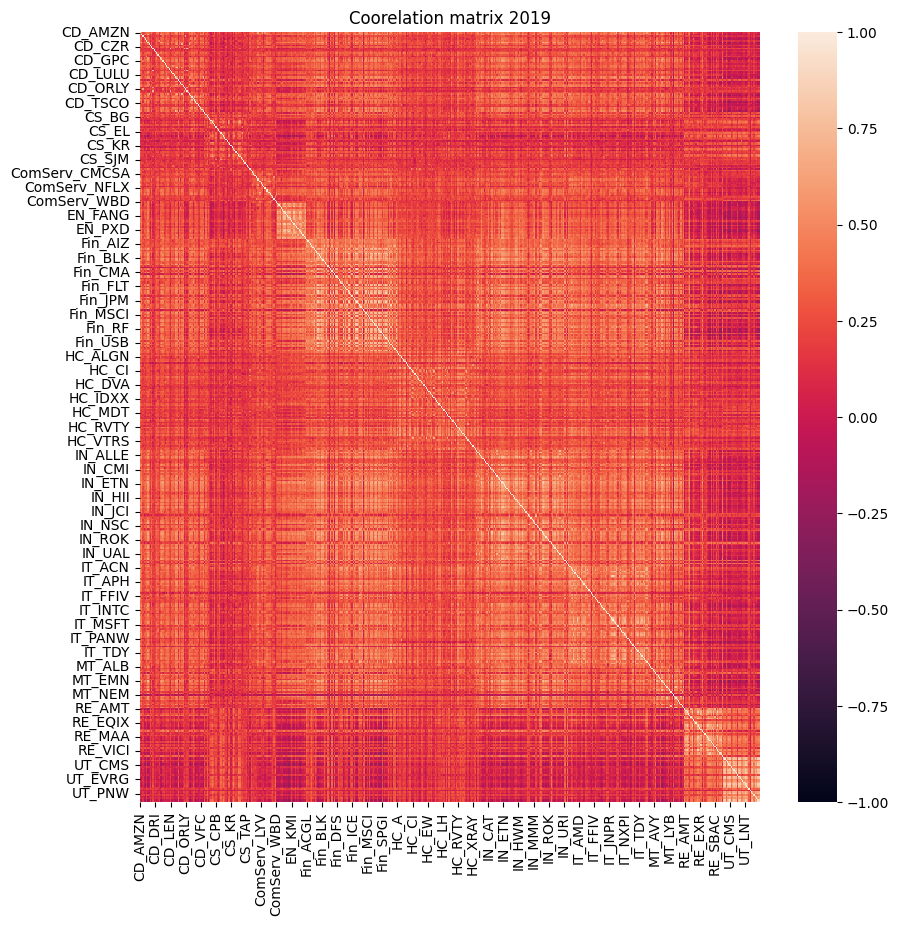

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
# Plot the heatmap of the average correlation matrix
sns.heatmap(corr_19, vmin=-1, vmax=1 )
plt.title('Coorelation matrix 2019')
plt.show()

In [ ]:
# Calculate log returns
spnan_20 = spnan_20.set_index('Date')
log_returns = np.log(spnan_20) - np.log(spnan_20.shift(1))
returns_20 = log_returns.iloc[1:]
# Calculate the correlation matrix
corr_20 = returns_20.corr()
# Print the correlation matrix
corr_20

CD_AMZN   CD_APTV    CD_AZO   CD_BBWI    CD_BBY   CD_BKNG    CD_BWA  \
CD_AMZN  1.000000  0.285508  0.324538  0.134680  0.445808  0.333915  0.298395   
CD_APTV  0.285508  1.000000  0.540485  0.490814  0.595105  0.591793  0.736997   
CD_AZO   0.324538  0.540485  1.000000  0.471532  0.593071  0.510938  0.563661   
CD_BBWI  0.134680  0.490814  0.471532  1.000000  0.542670  0.451240  0.476701   
CD_BBY   0.445808  0.595105  0.593071  0.542670  1.000000  0.512711  0.587173   
...           ...       ...       ...       ...       ...       ...       ...   
UT_PPL   0.219599  0.566068  0.671271  0.521801  0.637371  0.593201  0.574109   
UT_SO    0.308445  0.335149  0.612875  0.382433  0.571432  0.513999  0.397381   
UT_SRE   0.326281  0.462716  0.574020  0.511288  0.595836  0.595264  0.480673   
UT_WEC   0.279719  0.118129  0.539937  0.312813  0.476853  0.379416  0.233456   
UT_XEL   0.379412  0.375237  0.653503  0.380156  0.557114  0.473534  0.370898   

           CD_CCL    CD_CMG    CD_CZR  ...     UT_NI    UT_NRG    UT_PCG  \
CD_AMZN  0.184049  0.468499  0.263074  ...  0.325162  0.315604  0.297967   
CD_APTV  0.654943  0.626350  0.694689  ...  0.444802  0.647407  0.571434   
CD_AZO   0.390198  0.440327  0.468562  ...  0.673715  0.546850  0.493814   
CD_BBWI  0.496312  0.382586  0.590541  ...  0.416323  0.554542  0.365393   
CD_BBY   0.464185  0.528688  0.582048  ...  0.542529  0.625287  0.537271   
...           ...       ...       ...  ...       ...       ...       ...   
UT_PPL   0.510075  0.362647  0.474773  ...  0.808027  0.693212  0.543905   
UT_SO    0.328561  0.261366  0.301549  ...  0.856123  0.570570  0.491910   
UT_SRE   0.516664  0.389089  0.468199  ...  0.784887  0.681749  0.521601   
UT_WEC   0.138184  0.134389  0.138723  ...  0.735631  0.436922  0.378155   
UT_XEL   0.234482  0.306308  0.262723  ...  0.851286  0.567929  0.529293   

           UT_PEG    UT_PNW    UT_PPL     UT_SO    UT_SRE    UT_WEC    UT_XEL  
CD_AMZN  0.299136  0.294712  0.219599  0.308445  0.326281  0.279719  0.379412  
CD_APTV  0.603554  0.622002  0.566068  0.335149  0.462716  0.118129  0.375237  
CD_AZO   0.608604  0.686668  0.671271  0.612875  0.574020  0.539937  0.653503  
CD_BBWI  0.488340  0.510934  0.521801  0.382433  0.511288  0.312813  0.380156  
CD_BBY   0.609046  0.596480  0.637371  0.571432  0.595836  0.476853  0.557114  
...           ...       ...       ...       ...       ...       ...       ...  
UT_PPL   0.800934  0.834098  1.000000  0.836703  0.741453  0.710011  0.784607  
UT_SO    0.725317  0.805513  0.836703  1.000000  0.802452  0.829624  0.847598  
UT_SRE   0.704739  0.750678  0.741453  0.802452  1.000000  0.569311  0.669137  
UT_WEC   0.579146  0.618116  0.710011  0.829624  0.569311  1.000000  0.871202  
UT_XEL   0.699973  0.771543  0.784607  0.847598  0.669137  0.871202  1.000000  

[496 rows x 496 columns]

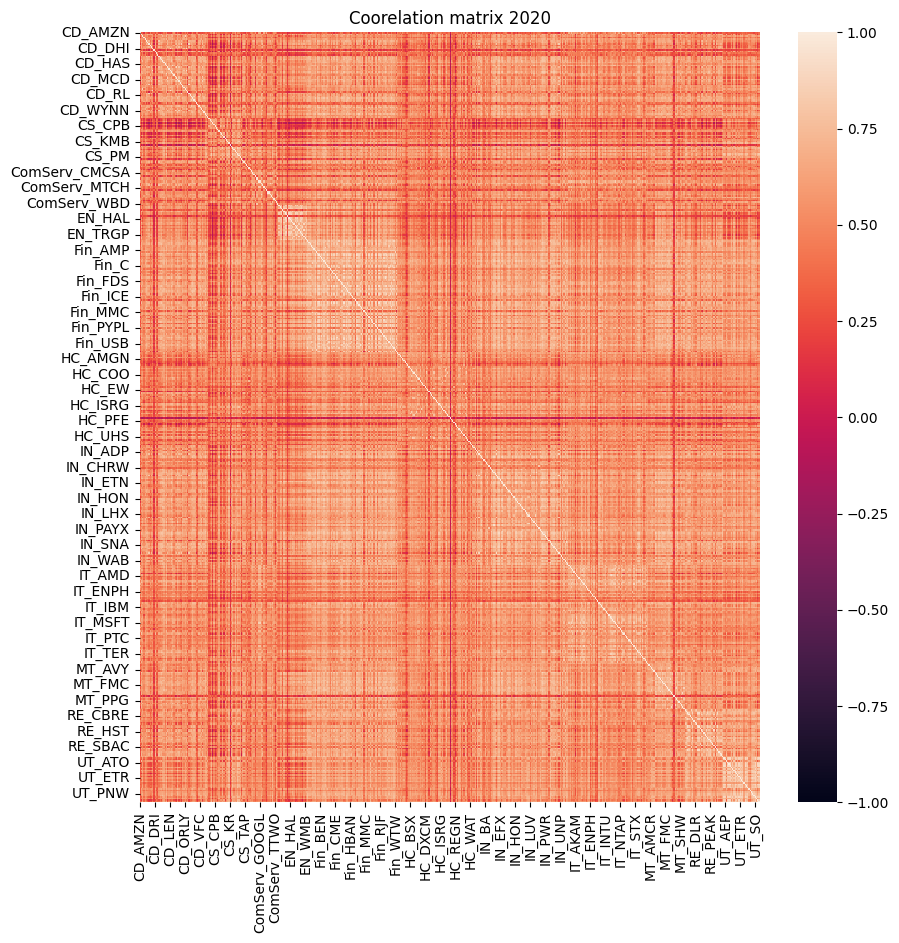

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
# Plot the heatmap of the average correlation matrix
sns.heatmap(corr_20, vmin=-1, vmax=1 )
plt.title('Coorelation matrix 2020')
plt.show()

In [ ]:
# Calculate log returns
spnan_21 = spnan_21.set_index('Date')
log_returns = np.log(spnan_21) - np.log(spnan_21.shift(1))
returns_21 = log_returns.iloc[1:]
# Calculate the correlation matrix
corr_21 = returns_21.corr()
# Print the correlation matrix
corr_21

CD_ABNB   CD_AMZN   CD_APTV    CD_AZO   CD_BBWI    CD_BBY   CD_BKNG  \
CD_ABNB  1.000000  0.257664  0.228328  0.008566  0.121589  0.251939  0.351214   
CD_AMZN  0.257664  1.000000  0.190169  0.140975  0.174417  0.133698  0.315135   
CD_APTV  0.228328  0.190169  1.000000  0.221018  0.466923  0.367182  0.454958   
CD_AZO   0.008566  0.140975  0.221018  1.000000  0.445892  0.356799  0.204255   
CD_BBWI  0.121589  0.174417  0.466923  0.445892  1.000000  0.366539  0.386893   
...           ...       ...       ...       ...       ...       ...       ...   
UT_PPL  -0.111020 -0.075223  0.152078  0.286888  0.160503  0.235453  0.190608   
UT_SO   -0.145798  0.033427  0.061269  0.263030  0.081650  0.113392  0.232146   
UT_SRE  -0.031035  0.154453  0.161745  0.350179  0.171176  0.178487  0.319700   
UT_WEC  -0.188880 -0.021307 -0.215868  0.215185 -0.169909  0.063024 -0.069363   
UT_XEL  -0.218695  0.089823 -0.099536  0.276335 -0.013571  0.119148  0.044282   

           CD_BWA    CD_CCL    CD_CMG  ...     UT_NI    UT_NRG    UT_PCG  \
CD_ABNB  0.249924  0.382383  0.314895  ... -0.191284  0.071583  0.005423   
CD_AMZN  0.011354  0.144521  0.423934  ... -0.000217  0.076202  0.175448   
CD_APTV  0.540602  0.426659  0.314408  ...  0.062071  0.130273  0.363281   
CD_AZO   0.236433  0.050473  0.175193  ...  0.297312  0.154013  0.232549   
CD_BBWI  0.300113  0.366034  0.236787  ...  0.142152  0.070496  0.228256   
...           ...       ...       ...  ...       ...       ...       ...   
UT_PPL   0.191940  0.119548 -0.079278  ...  0.565825  0.384202  0.303837   
UT_SO   -0.012848 -0.037219  0.067659  ...  0.627098  0.295867  0.362728   
UT_SRE   0.087151  0.111861  0.105127  ...  0.644212  0.396698  0.428172   
UT_WEC  -0.083260 -0.235730 -0.035652  ...  0.638815  0.262180  0.175751   
UT_XEL  -0.072670 -0.209762  0.029175  ...  0.651470  0.285673  0.232724   

           UT_PEG    UT_PNW    UT_PPL     UT_SO    UT_SRE    UT_WEC    UT_XEL  
CD_ABNB -0.183736 -0.207615 -0.111020 -0.145798 -0.031035 -0.188880 -0.218695  
CD_AMZN  0.152195 -0.032985 -0.075223  0.033427  0.154453 -0.021307  0.089823  
CD_APTV  0.069297 -0.042165  0.152078  0.061269  0.161745 -0.215868 -0.099536  
CD_AZO   0.364839  0.204203  0.286888  0.263030  0.350179  0.215185  0.276335  
CD_BBWI  0.166784  0.030061  0.160503  0.081650  0.171176 -0.169909 -0.013571  
...           ...       ...       ...       ...       ...       ...       ...  
UT_PPL   0.568271  0.553805  1.000000  0.511325  0.590907  0.459040  0.434016  
UT_SO    0.638475  0.569344  0.511325  1.000000  0.618765  0.700182  0.706391  
UT_SRE   0.665881  0.589211  0.590907  0.618765  1.000000  0.565969  0.611208  
UT_WEC   0.661582  0.600924  0.459040  0.700182  0.565969  1.000000  0.843199  
UT_XEL   0.715899  0.603942  0.434016  0.706391  0.611208  0.843199  1.000000  

[499 rows x 499 columns]

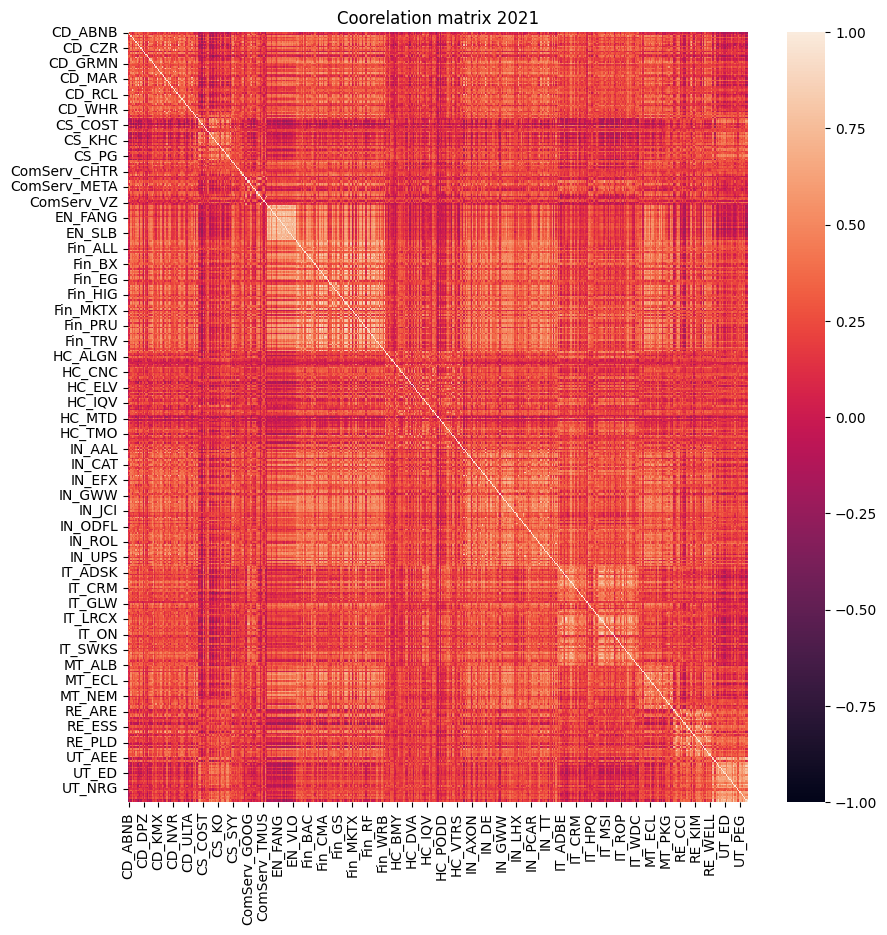

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
# Plot the heatmap of the average correlation matrix
sns.heatmap(corr_21, vmin=-1, vmax=1 )
plt.title('Coorelation matrix 2021')
plt.show()

In [ ]:
# Calculate log returns
spnan_22 = spnan_22.set_index('Date')
# Calculate log returns
log_returns = np.log(spnan_22) - np.log(spnan_22.shift(1))
returns_22 = log_returns.iloc[1:]
# Calculate the correlation matrix
corr_22 = returns_22.corr()
# Print the correlation matrix
corr_22

CD_ABNB   CD_AMZN   CD_APTV    CD_AZO   CD_BBWI    CD_BBY   CD_BKNG  \
CD_ABNB  1.000000  0.649338  0.648023  0.264608  0.468668  0.453386  0.736672   
CD_AMZN  0.649338  1.000000  0.604063  0.307265  0.473467  0.489353  0.553233   
CD_APTV  0.648023  0.604063  1.000000  0.337531  0.562350  0.512593  0.719056   
CD_AZO   0.264608  0.307265  0.337531  1.000000  0.229802  0.422626  0.277852   
CD_BBWI  0.468668  0.473467  0.562350  0.229802  1.000000  0.577359  0.452302   
...           ...       ...       ...       ...       ...       ...       ...   
UT_PPL   0.321369  0.360879  0.475026  0.300468  0.310299  0.322319  0.426797   
UT_SO    0.122077  0.271330  0.251703  0.242220  0.153688  0.256317  0.184457   
UT_SRE   0.220989  0.303306  0.370368  0.300570  0.176589  0.289363  0.266295   
UT_WEC   0.093842  0.219267  0.255365  0.319675  0.120485  0.220231  0.171641   
UT_XEL   0.114151  0.263255  0.276785  0.317299  0.145997  0.252517  0.206062   

           CD_BWA    CD_CCL    CD_CMG  ...     UT_NI    UT_NRG    UT_PCG  \
CD_ABNB  0.552231  0.640417  0.657456  ...  0.172860  0.295380  0.457439   
CD_AMZN  0.487912  0.525564  0.686928  ...  0.305856  0.341407  0.406327   
CD_APTV  0.822370  0.646903  0.594501  ...  0.330645  0.409881  0.485966   
CD_AZO   0.286969  0.221110  0.345508  ...  0.331085  0.325051  0.309466   
CD_BBWI  0.492794  0.534562  0.483313  ...  0.195507  0.290273  0.355817   
...           ...       ...       ...  ...       ...       ...       ...   
UT_PPL   0.480738  0.345759  0.303498  ...  0.754652  0.456282  0.486017   
UT_SO    0.281896  0.166341  0.205204  ...  0.823052  0.415641  0.419003   
UT_SRE   0.386308  0.224398  0.219107  ...  0.816381  0.438428  0.498063   
UT_WEC   0.246203  0.146995  0.164722  ...  0.834592  0.385769  0.382836   
UT_XEL   0.289184  0.173191  0.198132  ...  0.847315  0.417262  0.406880   

           UT_PEG    UT_PNW    UT_PPL     UT_SO    UT_SRE    UT_WEC    UT_XEL  
CD_ABNB  0.219675  0.099499  0.321369  0.122077  0.220989  0.093842  0.114151  
CD_AMZN  0.274962  0.244994  0.360879  0.271330  0.303306  0.219267  0.263255  
CD_APTV  0.380459  0.261579  0.475026  0.251703  0.370368  0.255365  0.276785  
CD_AZO   0.316382  0.316096  0.300468  0.242220  0.300570  0.319675  0.317299  
CD_BBWI  0.214273  0.136067  0.310299  0.153688  0.176589  0.120485  0.145997  
...           ...       ...       ...       ...       ...       ...       ...  
UT_PPL   0.752529  0.712543  1.000000  0.758124  0.719625  0.747786  0.773489  
UT_SO    0.795377  0.835782  0.758124  1.000000  0.794895  0.863985  0.879237  
UT_SRE   0.781888  0.745918  0.719625  0.794895  1.000000  0.773990  0.806173  
UT_WEC   0.813652  0.808414  0.747786  0.863985  0.773990  1.000000  0.917520  
UT_XEL   0.839537  0.830748  0.773489  0.879237  0.806173  0.917520  1.000000  

[499 rows x 499 columns]

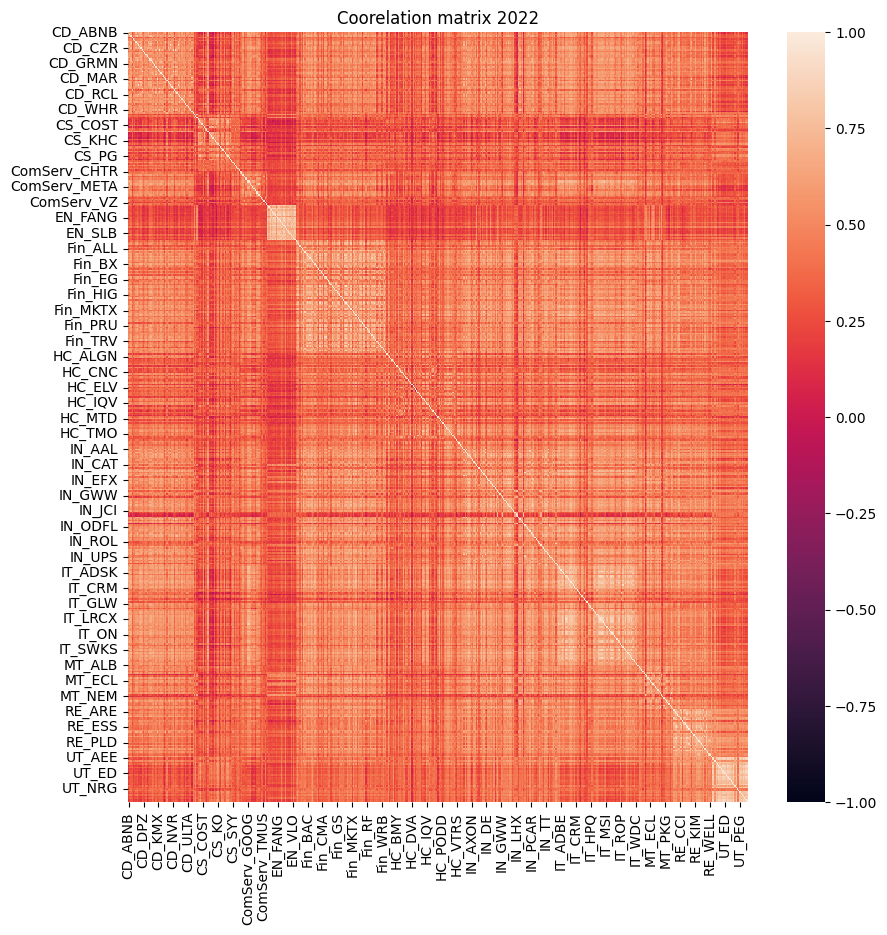

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
# Plot the heatmap of the average correlation matrix
sns.heatmap(corr_22, vmin=-1, vmax=1 )
plt.title('Coorelation matrix 2022')
plt.show()

## Network Construction

### Converting Correlation to Distance matrix

In [ ]:
DistMat_19 = np.sqrt(2 * (1 - corr_19))
DistMat_19

CD_AMZN   CD_APTV    CD_AZO   CD_BBWI    CD_BBY   CD_BKNG    CD_BWA  \
CD_AMZN  0.000000  1.038401  1.250064  1.218772  1.159884  1.104068  1.092078   
CD_APTV  1.038401  0.000000  1.261758  1.096907  1.025050  1.171286  0.772945   
CD_AZO   1.250064  1.261758  0.000000  1.315909  1.317027  1.315682  1.210928   
CD_BBWI  1.218772  1.096907  1.315909  0.000000  1.146977  1.187325  1.052045   
CD_BBY   1.159884  1.025050  1.317027  1.146977  0.000000  1.284829  1.098803   
...           ...       ...       ...       ...       ...       ...       ...   
UT_PPL   1.290562  1.288736  1.267482  1.272932  1.361890  1.227846  1.276345   
UT_SO    1.367053  1.418260  1.394941  1.481317  1.508344  1.334463  1.502139   
UT_SRE   1.274592  1.399811  1.320853  1.418917  1.396095  1.298755  1.386460   
UT_WEC   1.393124  1.533981  1.330858  1.518144  1.539759  1.327121  1.600595   
UT_XEL   1.359844  1.492959  1.306499  1.496624  1.515343  1.316667  1.550508   

           CD_CCL    CD_CMG    CD_CZR  ...     UT_NI    UT_NRG    UT_PCG  \
CD_AMZN  1.125137  1.178289  1.063643  ...  1.283937  1.242056  1.402587   
CD_APTV  1.144103  1.281370  1.147022  ...  1.406717  1.258389  1.376675   
CD_AZO   1.294489  1.291941  1.277957  ...  1.288788  1.311758  1.445611   
CD_BBWI  1.259105  1.405335  1.181501  ...  1.381855  1.324663  1.371780   
CD_BBY   1.218911  1.251817  1.208482  ...  1.422855  1.333711  1.441051   
...           ...       ...       ...  ...       ...       ...       ...   
UT_PPL   1.298488  1.346321  1.321422  ...  1.082422  1.145707  1.302319   
UT_SO    1.440483  1.312233  1.462654  ...  0.883289  1.162159  1.304677   
UT_SRE   1.402894  1.283850  1.344701  ...  0.935220  1.146387  1.268814   
UT_WEC   1.508150  1.281133  1.502361  ...  0.820783  1.180596  1.347291   
UT_XEL   1.489945  1.257758  1.445865  ...  0.830575  1.133691  1.324152   

           UT_PEG    UT_PNW    UT_PPL     UT_SO    UT_SRE    UT_WEC    UT_XEL  
CD_AMZN  1.335808  1.367090  1.290562  1.367053  1.274592  1.393124  1.359844  
CD_APTV  1.401912  1.440149  1.288736  1.418260  1.399811  1.533981  1.492959  
CD_AZO   1.279655  1.352644  1.267482  1.394941  1.320853  1.330858  1.306499  
CD_BBWI  1.395604  1.414899  1.272932  1.481317  1.418917  1.518144  1.496624  
CD_BBY   1.360931  1.471351  1.361890  1.508344  1.396095  1.539759  1.515343  
...           ...       ...       ...       ...       ...       ...       ...  
UT_PPL   0.992919  1.021639  0.000000  1.046952  1.059740  1.097838  1.008086  
UT_SO    0.846663  0.821587  1.046952  0.000000  0.951814  0.786421  0.760036  
UT_SRE   0.913376  0.952880  1.059740  0.951814  0.000000  0.932209  0.861702  
UT_WEC   0.827202  0.646767  1.097838  0.786421  0.932209  0.000000  0.476177  
UT_XEL   0.801586  0.706722  1.008086  0.760036  0.861702  0.476177  0.000000  

[492 rows x 492 columns]

In [ ]:
DistMat_20 = np.sqrt(2 * (1 - corr_20))
DistMat_20

CD_AMZN   CD_APTV    CD_AZO   CD_BBWI    CD_BBY   CD_BKNG    CD_BWA  \
CD_AMZN  0.000000  1.195401  1.162292  1.315538  1.052799  1.154197  1.184571   
CD_APTV  1.195401  0.000000  0.958660  1.009144  0.899883  0.903556  0.725263   
CD_AZO   1.162292  0.958660  0.000000  1.028074  0.902141  0.989002  0.934173   
CD_BBWI  1.315538  1.009144  1.028074  0.000000  0.956378  1.047626  1.023033   
CD_BBY   1.052799  0.899883  0.902141  0.956378  0.000000  0.987207  0.908655   
...           ...       ...       ...       ...       ...       ...       ...   
UT_PPL   1.249321  0.931592  0.810837  0.977956  0.851620  0.901996  0.922920   
UT_SO    1.176057  1.153127  0.879914  1.111366  0.925816  0.985902  1.097834   
UT_SRE   1.160792  1.036614  0.923017  0.988647  0.899070  0.899707  1.019144   
UT_WEC   1.200235  1.328060  0.959232  1.172337  1.022885  1.114077  1.238179   
UT_XEL   1.114081  1.117822  0.832462  1.113413  0.941155  1.026124  1.121697   

           CD_CCL    CD_CMG    CD_CZR  ...     UT_NI    UT_NRG    UT_PCG  \
CD_AMZN  1.277459  1.031020  1.214023  ...  1.161755  1.169954  1.184933   
CD_APTV  0.830732  0.864466  0.781423  ...  1.053753  0.839753  0.925814   
CD_AZO   1.104357  1.057992  1.030959  ...  0.807818  0.951998  1.006167   
CD_BBWI  1.003681  1.111228  0.904940  ...  1.080442  0.943884  1.126594   
CD_BBY   1.035196  0.970888  0.914278  ...  0.956526  0.865694  0.962007   
...           ...       ...       ...  ...       ...       ...       ...   
UT_PPL   0.989873  1.129029  1.024916  ...  0.619634  0.783311  0.955087   
UT_SO    1.158826  1.215429  1.181906  ...  0.536428  0.926747  1.008058   
UT_SRE   0.983195  1.105360  1.031311  ...  0.655916  0.797810  0.978161   
UT_WEC   1.312871  1.315759  1.312461  ...  0.727143  1.061205  1.115208   
UT_XEL   1.237350  1.177873  1.214312  ...  0.545369  0.929592  0.970265   

           UT_PEG    UT_PNW    UT_PPL     UT_SO    UT_SRE    UT_WEC    UT_XEL  
CD_AMZN  1.183946  1.187677  1.249321  1.176057  1.160792  1.200235  1.114081  
CD_APTV  0.890445  0.869480  0.931592  1.153127  1.036614  1.328060  1.117822  
CD_AZO   0.884756  0.791622  0.810837  0.879914  0.923017  0.959232  0.832462  
CD_BBWI  1.011592  0.989005  0.977956  1.111366  0.988647  1.172337  1.113413  
CD_BBY   0.884256  0.898355  0.851620  0.925816  0.899070  1.022885  0.941155  
...           ...       ...       ...       ...       ...       ...       ...  
UT_PPL   0.630978  0.576024  0.000000  0.571484  0.719093  0.761562  0.656343  
UT_SO    0.741192  0.623677  0.571484  0.000000  0.628566  0.583740  0.552091  
UT_SRE   0.768454  0.706147  0.719093  0.628566  0.000000  0.928104  0.813465  
UT_WEC   0.917446  0.873939  0.761562  0.583740  0.928104  0.000000  0.507540  
UT_XEL   0.774632  0.675954  0.656343  0.552091  0.813465  0.507540  0.000000  

[496 rows x 496 columns]

In [ ]:
DistMat_21 = np.sqrt(2 * (1 - corr_21))
DistMat_21

CD_ABNB   CD_AMZN   CD_APTV    CD_AZO   CD_BBWI    CD_BBY   CD_BKNG  \
CD_ABNB  0.000000  1.218471  1.242314  1.408143  1.325452  1.223161  1.139110   
CD_AMZN  1.218471  0.000000  1.272660  1.310744  1.284977  1.316284  1.170355   
CD_APTV  1.242314  1.272660  0.000000  1.248184  1.032548  1.125005  1.044070   
CD_AZO   1.408143  1.310744  1.248184  0.000000  1.052719  1.134196  1.261543   
CD_BBWI  1.325452  1.284977  1.032548  1.052719  0.000000  1.125576  1.107345   
...           ...       ...       ...       ...       ...       ...       ...   
UT_PPL   1.490651  1.466440  1.302246  1.194246  1.295760  1.236565  1.272315   
UT_SO    1.513802  1.390376  1.370205  1.214059  1.355249  1.331622  1.239237   
UT_SRE   1.435991  1.300421  1.294801  1.140019  1.287497  1.281805  1.166448   
UT_WEC   1.541999  1.429201  1.559403  1.252849  1.529647  1.368924  1.462439   
UT_XEL   1.561214  1.349205  1.482927  1.203050  1.423777  1.327292  1.382547   

           CD_BWA    CD_CCL    CD_CMG  ...     UT_NI    UT_NRG    UT_PCG  \
CD_ABNB  1.224807  1.111411  1.170560  ...  1.543557  1.362657  1.410374   
CD_AMZN  1.406162  1.308036  1.073374  ...  1.414367  1.359263  1.284174   
CD_APTV  0.958538  1.070833  1.170976  ...  1.369620  1.318884  1.128467   
CD_AZO   1.235773  1.378062  1.284373  ...  1.185486  1.300759  1.238912   
CD_BBWI  1.183120  1.126025  1.235487  ...  1.309846  1.363454  1.242372   
...           ...       ...       ...  ...       ...       ...       ...   
UT_PPL   1.271267  1.326991  1.469202  ...  0.931853  1.109773  1.179969   
UT_SO    1.423269  1.440291  1.365534  ...  0.863599  1.186704  1.128957   
UT_SRE   1.351184  1.332771  1.337814  ...  0.843550  1.098456  1.069418   
UT_WEC   1.471911  1.572088  1.439202  ...  0.849923  1.214759  1.283939   
UT_XEL   1.464698  1.555482  1.393431  ...  0.834901  1.195264  1.238770   

           UT_PEG    UT_PNW    UT_PPL     UT_SO    UT_SRE    UT_WEC    UT_XEL  
CD_ABNB  1.538659  1.554101  1.490651  1.513802  1.435991  1.541999  1.561214  
CD_AMZN  1.302156  1.437348  1.466440  1.390376  1.300421  1.429201  1.349205  
CD_APTV  1.364333  1.443721  1.302246  1.370205  1.294801  1.559403  1.482927  
CD_AZO   1.127085  1.261584  1.194246  1.214059  1.140019  1.252849  1.203050  
CD_BBWI  1.290904  1.392795  1.295760  1.355249  1.287497  1.529647  1.423777  
...           ...       ...       ...       ...       ...       ...       ...  
UT_PPL   0.929224  0.944663  0.000000  0.988610  0.904536  1.040154  1.063940  
UT_SO    0.850324  0.928069  0.988610  0.000000  0.873196  0.774362  0.766301  
UT_SRE   0.817458  0.906410  0.904536  0.873196  0.000000  0.931698  0.881808  
UT_WEC   0.822700  0.893393  1.040154  0.774362  0.931698  0.000000  0.560001  
UT_XEL   0.753792  0.890009  1.063940  0.766301  0.881808  0.560001  0.000000  

[499 rows x 499 columns]

In [ ]:
DistMat_22 = np.sqrt(2 * (1 - corr_22))
DistMat_22

CD_ABNB   CD_AMZN   CD_APTV    CD_AZO   CD_BBWI    CD_BBY   CD_BKNG  \
CD_ABNB  0.000000  0.837451  0.839020  1.212758  1.030856  1.045576  0.725711   
CD_AMZN  0.837451  0.000000  0.889873  1.177060  1.026190  1.010590  0.945269   
CD_APTV  0.839020  0.889873  0.000000  1.151059  0.935575  0.987327  0.749592   
CD_AZO   1.212758  1.177060  1.151059  0.000000  1.241127  1.074592  1.201789   
CD_BBWI  1.030856  1.026190  0.935575  1.241127  0.000000  0.919392  1.046611   
...           ...       ...       ...       ...       ...       ...       ...   
UT_PPL   1.165016  1.130594  1.024670  1.182821  1.174480  1.164200  1.070703   
UT_SO    1.325083  1.207203  1.223354  1.231081  1.301009  1.219576  1.277139   
UT_SRE   1.248208  1.180418  1.122169  1.182734  1.283285  1.192172  1.211367   
UT_WEC   1.346223  1.249587  1.220357  1.166469  1.326285  1.248814  1.287136   
UT_XEL   1.331051  1.213874  1.202676  1.168504  1.306907  1.222688  1.260110   

           CD_BWA    CD_CCL    CD_CMG  ...     UT_NI    UT_NRG    UT_PCG  \
CD_ABNB  0.946329  0.848036  0.827700  ...  1.286188  1.187114  1.041692   
CD_AMZN  1.012016  0.974101  0.791293  ...  1.178256  1.147688  1.089654   
CD_APTV  0.596037  0.840354  0.900554  ...  1.157026  1.086388  1.013937   
CD_AZO   1.194178  1.248110  1.144108  ...  1.156646  1.161851  1.175188   
CD_BBWI  1.007180  0.964820  1.016550  ...  1.268458  1.191408  1.135062   
...           ...       ...       ...  ...       ...       ...       ...   
UT_PPL   1.019080  1.143889  1.180256  ...  0.700497  1.042802  1.013886   
UT_SO    1.198419  1.291247  1.260790  ...  0.594892  1.081072  1.077959   
UT_SRE   1.107874  1.245473  1.249715  ...  0.606001  1.059785  1.001935   
UT_WEC   1.227841  1.306143  1.292500  ...  0.575165  1.108360  1.111003   
UT_XEL   1.192322  1.285931  1.266387  ...  0.552604  1.079573  1.089146   

           UT_PEG    UT_PNW    UT_PPL     UT_SO    UT_SRE    UT_WEC    UT_XEL  
CD_ABNB  1.249259  1.342014  1.165016  1.325083  1.248208  1.346223  1.331051  
CD_AMZN  1.204191  1.228825  1.130594  1.207203  1.180418  1.249587  1.213874  
CD_APTV  1.113140  1.215254  1.024670  1.223354  1.122169  1.220357  1.202676  
CD_AZO   1.169289  1.169533  1.182821  1.231081  1.182734  1.166469  1.168504  
CD_BBWI  1.253576  1.314483  1.174480  1.301009  1.283285  1.326285  1.306907  
...           ...       ...       ...       ...       ...       ...       ...  
UT_PPL   0.703522  0.758231  0.000000  0.695523  0.748833  0.710231  0.673068  
UT_SO    0.639723  0.573093  0.695523  0.000000  0.640476  0.521566  0.491454  
UT_SRE   0.660472  0.712856  0.748833  0.640476  0.000000  0.672325  0.622619  
UT_WEC   0.610488  0.619009  0.710231  0.521566  0.672325  0.000000  0.406153  
UT_XEL   0.566503  0.581812  0.673068  0.491454  0.622619  0.406153  0.000000  

[499 rows x 499 columns]

In [ ]:
DistMat_22.to_csv("distmat.csv")

### Minimum Spanning Tree

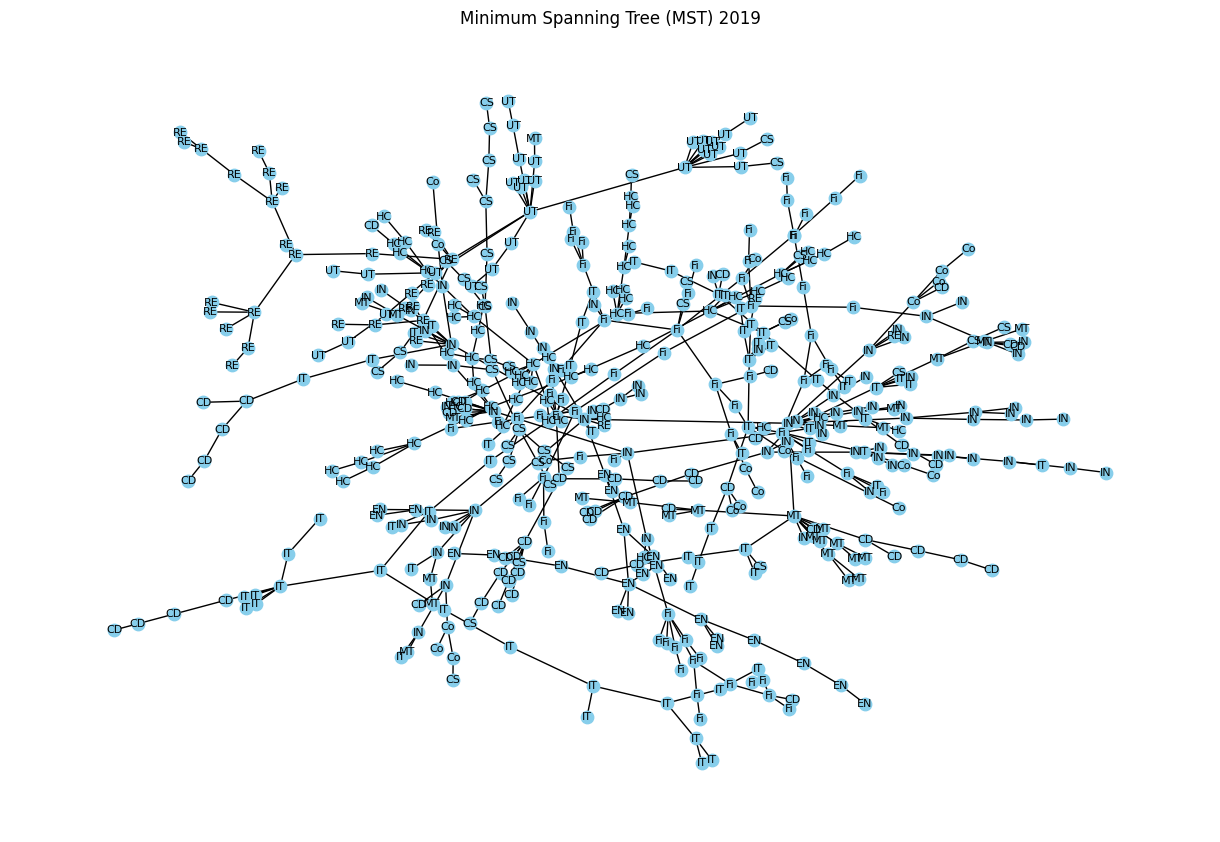

In [215]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Extract the node names (company names) from the columns of your distance matrix for 2019
node_names_19 = [name.split('_')[0].strip('()')[:2] for name in DistMat_19.columns]

# Create node_labels dictionary for 2019
node_labels_19 = {i: node_names_19[i] for i in range(len(node_names_19))}

# Create a NetworkX graph from the distance matrix for 2019
G_19 = nx.from_numpy_array(np.array(DistMat_19))

# Calculate the minimum spanning tree for 2019 using NetworkX
mst_19 = nx.minimum_spanning_tree(G_19)

# Visualize the MST with labeled nodes for 2019
plt.figure(figsize=(12, 8))
pos_19 = nx.spring_layout(mst_19)  # Positions nodes for visualization
nx.draw(mst_19, pos_19, labels=node_labels_19, with_labels=True, node_color='skyblue', node_size=80, font_size=8, edge_color='black')
plt.title('Minimum Spanning Tree (MST) 2019')
plt.show()


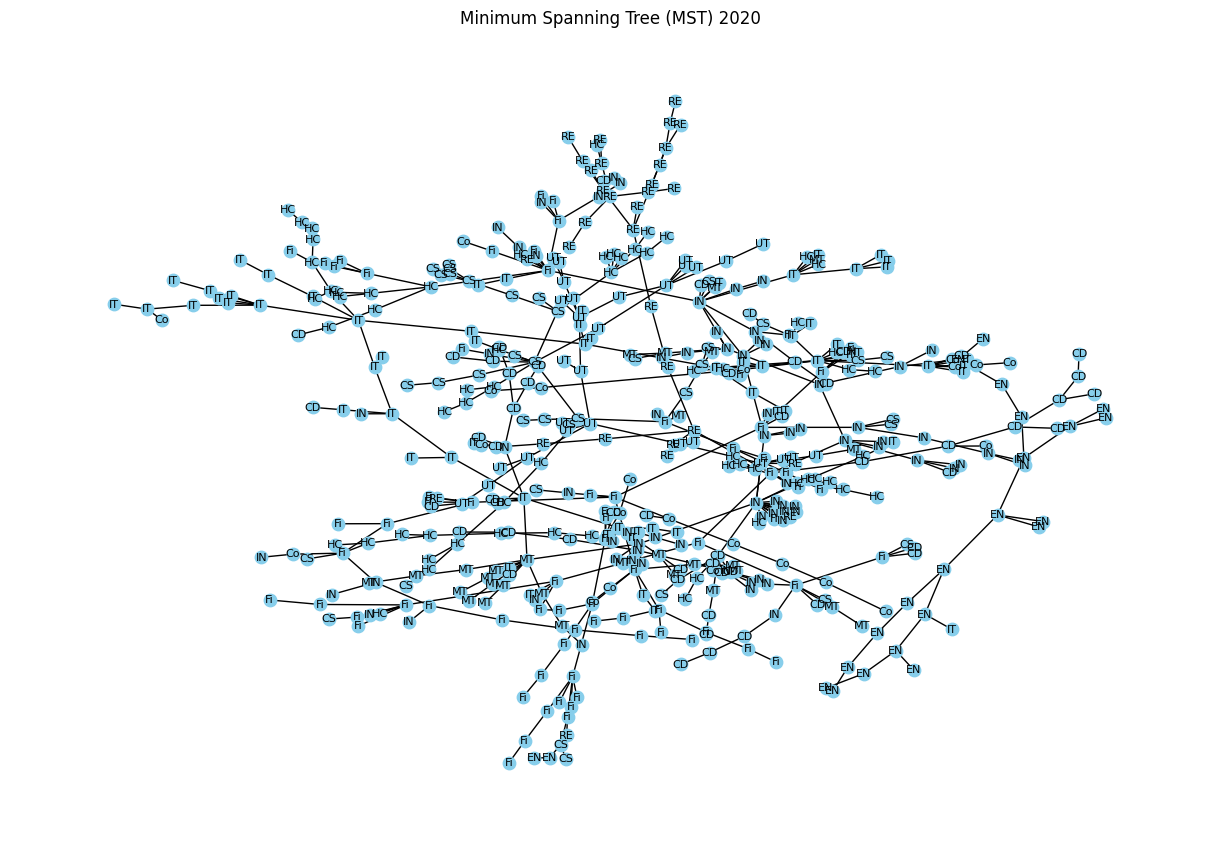

In [216]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Extract the first two characters from each column name, ignoring brackets
node_names_20 = [name.split('_')[0].strip('()')[:2] for name in DistMat_20.columns]
# Create node_labels dictionary for 2020
node_labels_20 = {i: node_names_20[i] for i in range(len(node_names_20))}

# Create a NetworkX graph from the distance matrix for 2020
G_20 = nx.from_numpy_array(np.array(DistMat_20))

# Calculate the minimum spanning tree for 2020 using NetworkX
mst_20 = nx.minimum_spanning_tree(G_20)

# Visualize the MST with labeled nodes for 2020
plt.figure(figsize=(12, 8))
pos_20 = nx.spring_layout(mst_20)  # Positions nodes for visualization
nx.draw(mst_20, pos_20, labels=node_labels_20, with_labels=True, node_color='skyblue', node_size=80, font_size=8, edge_color='black')
plt.title('Minimum Spanning Tree (MST) 2020')
plt.show()

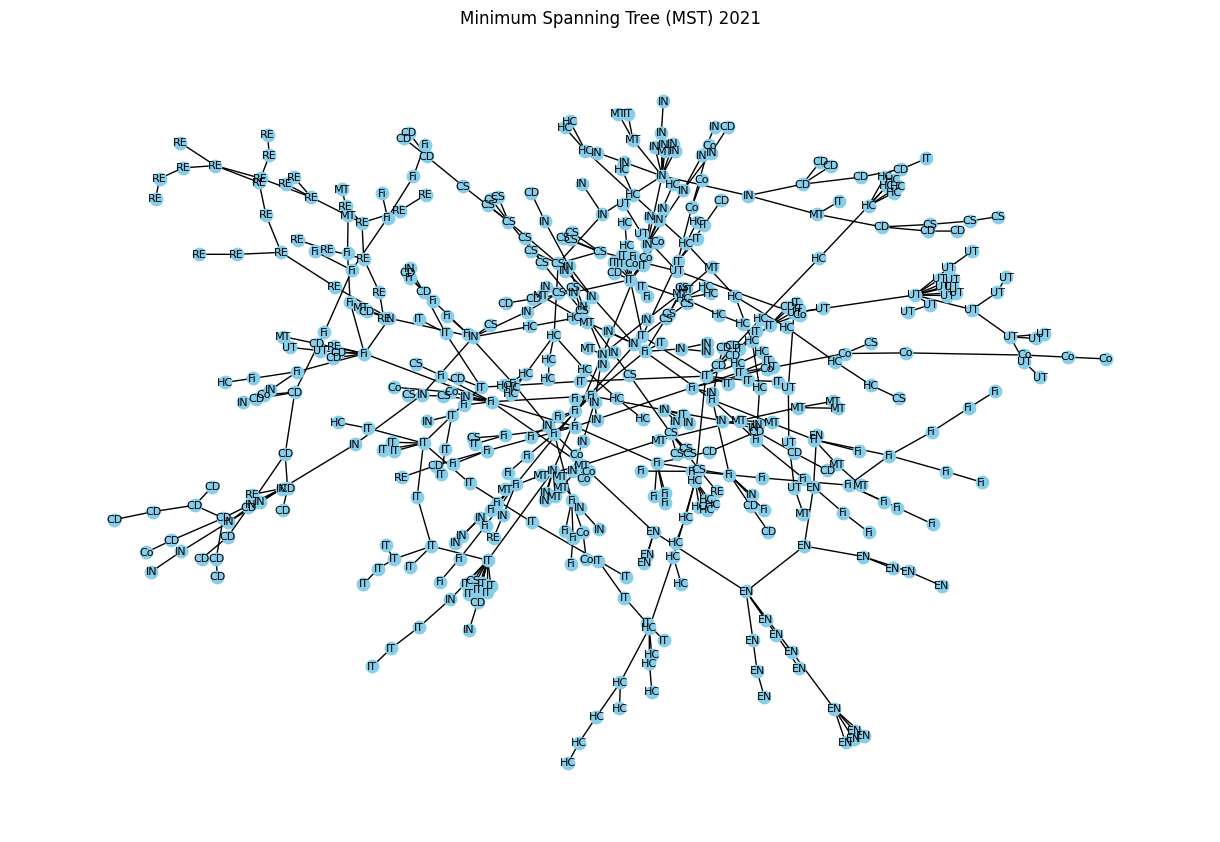

In [217]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Extract the first two characters from each column name, ignoring brackets
node_names_21 = [name.split('_')[0].strip('()')[:2] for name in DistMat_21.columns]
# Create node_labels dictionary for 2021
node_labels_21 = {i: node_names_21[i] for i in range(len(node_names_21))}

# Create a NetworkX graph from the distance matrix for 2021
G_21 = nx.from_numpy_array(np.array(DistMat_21))

# Calculate the minimum spanning tree for 2021 using NetworkX
mst_21 = nx.minimum_spanning_tree(G_21)

# Visualize the MST with labeled nodes for 2021
plt.figure(figsize=(12, 8))
pos_21 = nx.spring_layout(mst_21)  # Positions nodes for visualization
nx.draw(mst_21, pos_21, labels=node_labels_21, with_labels=True, node_color='skyblue', node_size=80, font_size=8, edge_color='black')
plt.title('Minimum Spanning Tree (MST) 2021')
plt.show()


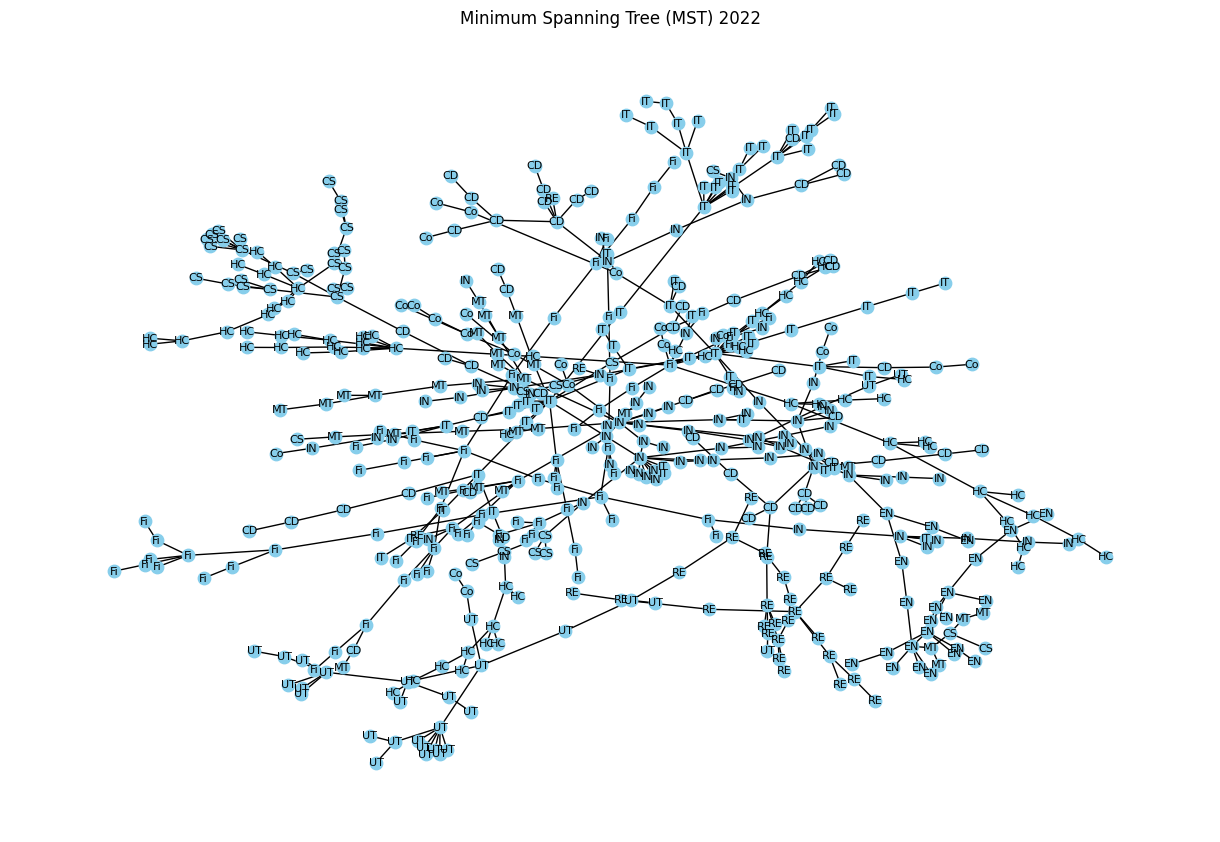

In [218]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Extract the first two characters from each column name, ignoring brackets
node_names_22 = [name.split('_')[0].strip('()')[:2] for name in DistMat_22.columns]
# Create node_labels dictionary for 2022
node_labels_22 = {i: node_names_22[i] for i in range(len(node_names_22))}

# Create a NetworkX graph from the distance matrix for 2022
G_22 = nx.from_numpy_array(np.array(DistMat_22))

# Calculate the minimum spanning tree for 2022 using NetworkX
mst_22 = nx.minimum_spanning_tree(G_22)

# Visualize the MST with labeled nodes for 2022
plt.figure(figsize=(12, 8))
pos_22 = nx.spring_layout(mst_22)  # Positions nodes for visualization
nx.draw(mst_22, pos_22, labels=node_labels_22, with_labels=True, node_color='skyblue', node_size=80, font_size=8, edge_color='black')
plt.title('Minimum Spanning Tree (MST) 2022')
plt.show()

## Centrality Measures based on years

### Degree Centrality

In [ ]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(mst_19)

node_labels = {i: DistMat_19.columns[i] for i in range(len(DistMat_19.columns))}

# Assuming 'node_names' contains the names of companies corresponding to the nodes in your MST
node_mapping = {i: node_labels[i] for i in range(len(node_labels))}

# Create a DataFrame with node names and their degree centrality values
degree_19 = pd.DataFrame({
    'Node': [node_mapping[i] for i in range(len(node_mapping))],
    'Degree Centrality': [degree_centrality[i] for i in range(len(degree_centrality))]
})

# Sort the DataFrame by degree centrality values (optional)
degree_19 = degree_19.sort_values(by='Degree Centrality', ascending=False)

# Display the DataFrame with node names and their degree centrality values
degree_19


Node  Degree Centrality
287   IN_EMR           0.024440
320    IN_PH           0.022403
414   MT_EMN           0.022403
174   Fin_MA           0.020367
480   UT_LNT           0.020367
..       ...                ...
55    CS_CAG           0.002037
258   HC_UHS           0.002037
256   HC_TFX           0.002037
255  HC_TECH           0.002037
246  HC_MRNA           0.002037

[492 rows x 2 columns]

In [ ]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(mst_20)

node_labels = {i: DistMat_20.columns[i] for i in range(len(DistMat_20.columns))}

# Assuming 'node_names' contains the names of companies corresponding to the nodes in your MST
node_mapping = {i: node_labels[i] for i in range(len(node_labels))}

# Create a DataFrame with node names and their degree centrality values
degree_20 = pd.DataFrame({
    'Node': [node_mapping[i] for i in range(len(node_mapping))],
    'Degree Centrality': [degree_centrality[i] for i in range(len(degree_centrality))]
})

# Sort the DataFrame by degree centrality values
degree_20 = degree_20.sort_values(by='Degree Centrality', ascending=False)

# Display the DataFrame with node names and their degree centrality values
degree_20


Node  Degree Centrality
287   IN_DOV           0.032323
380  IT_MSFT           0.022222
273   IN_AME           0.020202
412    MT_CE           0.020202
201    Fin_V           0.020202
..       ...                ...
213  HC_BIIB           0.002020
212   HC_BDX           0.002020
211   HC_BAX           0.002020
209  HC_ALGN           0.002020
248  HC_MRNA           0.002020

[496 rows x 2 columns]

In [ ]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(mst_21)

node_labels = {i: DistMat_21.columns[i] for i in range(len(DistMat_21.columns))}

# Assuming 'node_names' contains the names of companies corresponding to the nodes in your MST
node_mapping = {i: node_labels[i] for i in range(len(node_labels))}

# Create a DataFrame with node names and their degree centrality values
degree_21 = pd.DataFrame({
    'Node': [node_mapping[i] for i in range(len(node_mapping))],
    'Degree Centrality': [degree_centrality[i] for i in range(len(degree_centrality))]
})

# Sort the DataFrame by degree centrality values (optional)
degree_21 = degree_21.sort_values(by='Degree Centrality', ascending=False)

# Display the DataFrame with node names and their degree centrality values
degree_21


Node  Degree Centrality
386   IT_NOW           0.026104
307   IN_ITW           0.022088
356   IT_APH           0.022088
487   UT_LNT           0.020080
141  Fin_AMP           0.018072
..       ...                ...
221   HC_COO           0.002008
220   HC_CNC           0.002008
217   HC_BSX           0.002008
214  HC_BIIB           0.002008
249  HC_MRNA           0.002008

[499 rows x 2 columns]

In [ ]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(mst_22)

node_labels = {i: DistMat_22.columns[i] for i in range(len(DistMat_22.columns))}

# Assuming 'node_names' contains the names of companies corresponding to the nodes in your MST
node_mapping = {i: node_labels[i] for i in range(len(node_labels))}

# Create a DataFrame with node names and their degree centrality values
degree_22 = pd.DataFrame({
    'Node': [node_mapping[i] for i in range(len(node_mapping))],
    'Degree Centrality': [degree_centrality[i] for i in range(len(degree_centrality))]
})

# Sort the DataFrame by degree centrality values (optional)
degree_22 = degree_22.sort_values(by='Degree Centrality', ascending=False)

# Display the DataFrame with node names and their degree centrality values
degree_22


Node  Degree Centrality
355   IT_ANSS           0.034137
356    IT_APH           0.032129
325     IN_PH           0.030120
274    IN_AME           0.024096
183  Fin_MSCI           0.018072
..        ...                ...
214   HC_BIIB           0.002008
212    HC_BAX           0.002008
210   HC_ALGN           0.002008
208   HC_ABBV           0.002008
249   HC_MRNA           0.002008

[499 rows x 2 columns]

### EigenVector Centrality

In [ ]:
# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(mst_19, max_iter=500, tol=1e-6 )

node_labels = {i: DistMat_19.columns[i] for i in range(len(DistMat_19.columns))}

# Assuming 'node_names' contains the names of companies corresponding to the nodes in your MST
node_mapping = {i: node_labels[i] for i in range(len(node_labels))}

# Create a DataFrame with node names and their degree centrality values
eigen_19 = pd.DataFrame({
    'Node': [node_mapping[i] for i in range(len(node_mapping))],
    'eigenvector_centrality': [eigenvector_centrality[i] for i in range(len(eigenvector_centrality))]
})

# Sort the DataFrame by degree centrality values (optional)
eigen_19 = eigen_19.sort_values(by='eigenvector_centrality', ascending=False)

# Display the DataFrame with node names and their degree centrality values
eigen_19


Node  eigenvector_centrality
287   IN_EMR            4.910078e-01
320    IN_PH            4.234080e-01
414   MT_EMN            2.722524e-01
271   IN_AME            2.275987e-01
144  Fin_BLK            2.078893e-01
..       ...                     ...
244   HC_MOH            4.727989e-08
246  HC_MRNA            4.727989e-08
58    CS_CLX            1.410786e-08
72     CS_KR            1.353116e-08
219   HC_COR            1.353116e-08

[492 rows x 2 columns]

In [ ]:
# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(mst_20, max_iter=500, tol=1e-6 )

node_labels = {i: DistMat_20.columns[i] for i in range(len(DistMat_20.columns))}

# Assuming 'node_names' contains the names of companies corresponding to the nodes in your MST
node_mapping = {i: node_labels[i] for i in range(len(node_labels))}

# Create a DataFrame with node names and their degree centrality values
eigen_20 = pd.DataFrame({
    'Node': [node_mapping[i] for i in range(len(node_mapping))],
    'eigenvector_centrality': [eigenvector_centrality[i] for i in range(len(eigenvector_centrality))]
})

# Sort the DataFrame by degree centrality values (optional)
eigen_20 = eigen_20.sort_values(by='eigenvector_centrality', ascending=False)

# Display the DataFrame with node names and their degree centrality values
eigen_20


Node  eigenvector_centrality
287   IN_DOV            6.440499e-01
21     CD_HD            2.490950e-01
322    IN_PH            2.282572e-01
475   UT_DTE            2.112817e-01
245   HC_MDT            1.969335e-01
..       ...                     ...
265   HC_WST            1.371529e-10
444   RE_DLR            1.371529e-10
460  RE_SBAC            1.287959e-10
246   HC_MOH            1.246701e-10
141  Fin_AON            4.249426e-11

[496 rows x 2 columns]

In [ ]:
# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(mst_21, max_iter=500, tol=1e-6 )

node_labels = {i: DistMat_21.columns[i] for i in range(len(DistMat_21.columns))}

# Assuming 'node_names' contains the names of companies corresponding to the nodes in your MST
node_mapping = {i: node_labels[i] for i in range(len(node_labels))}

# Create a DataFrame with node names and their degree centrality values
eigen_21 = pd.DataFrame({
    'Node': [node_mapping[i] for i in range(len(node_mapping))],
    'eigenvector_centrality': [eigenvector_centrality[i] for i in range(len(eigenvector_centrality))]
})

# Sort the DataFrame by degree centrality values (optional)
eigen_21 = eigen_21.sort_values(by='eigenvector_centrality', ascending=False)

# Display the DataFrame with node names and their degree centrality values
eigen_21


Node  eigenvector_centrality
386    IT_NOW            6.213386e-01
348   IT_ADBE            3.008033e-01
398   IT_SNPS            2.320668e-01
237   HC_IDXX            2.070532e-01
322   IN_PAYC            1.903925e-01
..        ...                     ...
448   RE_EQIX            9.582858e-10
439    RE_AMT            9.582858e-10
163   Fin_FIS            5.483952e-10
173  Fin_JKHY            5.073148e-10
167   Fin_GPN            1.500944e-10

[499 rows x 2 columns]

In [ ]:
# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(mst_22, max_iter=500, tol=1e-6 )

node_labels = {i: DistMat_22.columns[i] for i in range(len(DistMat_22.columns))}

# Assuming 'node_names' contains the names of companies corresponding to the nodes in your MST
node_mapping = {i: node_labels[i] for i in range(len(node_labels))}

# Create a DataFrame with node names and their degree centrality values
eigen_22 = pd.DataFrame({
    'Node': [node_mapping[i] for i in range(len(node_mapping))],
    'eigenvector_centrality': [eigenvector_centrality[i] for i in range(len(eigenvector_centrality))]
})

# Sort the DataFrame by degree centrality values (optional)
eigen_22 = eigen_22.sort_values(by='eigenvector_centrality', ascending=False)

# Display the DataFrame with node names and their degree centrality values
eigen_22


Node  eigenvector_centrality
355    IT_ANSS            4.670448e-01
356     IT_APH            4.367947e-01
274     IN_AME            2.449450e-01
378    IT_KEYS            2.147953e-01
183   Fin_MSCI            1.883635e-01
..         ...                     ...
481     UT_EIX            5.927918e-13
480      UT_ED            5.927918e-13
489      UT_NI            4.644547e-13
107  ComServ_T            4.061300e-13
477       UT_D            1.406064e-13

[499 rows x 2 columns]

### Betwenness Centrality

In [ ]:
# Calculate eigenvector centrality
bc = nx.betweenness_centrality(mst_19)

labels_19 = {i: DistMat_19.columns[i] for i in range(len(DistMat_19.columns))}

# Assuming 'node_names' contains the names of companies corresponding to the nodes in your MST
mapping_19= {i: labels_19[i] for i in range(len(labels_19))}

# Create a DataFrame with node names and their degree centrality values
btw_19 = pd.DataFrame({
    'Node': [mapping_19[i] for i in range(len(mapping_19))],
    'betweenness_centrality': [bc[i] for i in range(len(bc))]
})

# Sort the DataFrame by degree centrality values (optional)
btw_19 = btw_19.sort_values(by='betweenness_centrality', ascending=False)

# Display the DataFrame with node names and their degree centrality values
btw_19


Node  betweenness_centrality
378  IT_MSFT                0.623509
148    Fin_C                0.573341
144  Fin_BLK                0.543231
156  Fin_DFS                0.513055
140  Fin_AXP                0.501002
..       ...                     ...
251   HC_RMD                0.000000
249  HC_PODD                0.000000
46   CD_TSLA                0.000000
244   HC_MOH                0.000000
246  HC_MRNA                0.000000

[492 rows x 2 columns]

In [ ]:
# Calculate eigenvector centrality
bc = nx.betweenness_centrality(mst_20)

labels_20 = {i: DistMat_20.columns[i] for i in range(len(DistMat_20.columns))}

# Assuming 'node_names' contains the names of companies corresponding to the nodes in your MST
mapping_20 = {i: labels_20[i] for i in range(len(labels_20))}

# Create a DataFrame with node names and their degree centrality values
btw_20 = pd.DataFrame({
    'Node': [mapping_20[i] for i in range(len(mapping_20))],
    'betweenness_centrality': [bc[i] for i in range(len(bc))]
})

# Sort the DataFrame by degree centrality values (optional)
btw_20 = btw_20.sort_values(by='betweenness_centrality', ascending=False)

# Display the DataFrame with node names and their degree centrality values
btw_20


Node  betweenness_centrality
287   IN_DOV                0.640682
273   IN_AME                0.588230
301  IN_HUBB                0.513082
283   IN_CSX                0.504584
317   IN_NSC                0.504143
..       ...                     ...
213  HC_BIIB                0.000000
212   HC_BDX                0.000000
211   HC_BAX                0.000000
209  HC_ALGN                0.000000
248  HC_MRNA                0.000000

[496 rows x 2 columns]

In [ ]:
# Calculate eigenvector centrality
bc = nx.betweenness_centrality(mst_21)

labels_21 = {i: DistMat_21.columns[i] for i in range(len(DistMat_21.columns))}

# Assuming 'node_names' contains the names of companies corresponding to the nodes in your MST
mapping_21 = {i: labels_21[i] for i in range(len(labels_21))}

# Create a DataFrame with node names and their degree centrality values
btw_21 = pd.DataFrame({
    'Node': [mapping_21[i] for i in range(len(mapping_21))],
    'betweenness_centrality': [bc[i] for i in range(len(bc))]
})

# Sort the DataFrame by degree centrality values (optional)
btw_21 = btw_21.sort_values(by='betweenness_centrality', ascending=False)

# Display the DataFrame with node names and their degree centrality values
btw_21


Node  betweenness_centrality
292   IN_ETN                0.636469
154  Fin_CFG                0.543074
175  Fin_KEY                0.516157
179  Fin_MET                0.506598
341   IN_URI                0.505935
..       ...                     ...
221   HC_COO                0.000000
220   HC_CNC                0.000000
217   HC_BSX                0.000000
214  HC_BIIB                0.000000
249  HC_MRNA                0.000000

[499 rows x 2 columns]

In [ ]:
# Calculate eigenvector centrality
bc = nx.betweenness_centrality(mst_22)

labels_22 = {i: DistMat_22.columns[i] for i in range(len(DistMat_22.columns))}

# Assuming 'node_names' contains the names of companies corresponding to the nodes in your MST
mapping_22= {i: labels_22[i] for i in range(len(labels_22))}

# Create a DataFrame with node names and their degree centrality values
btw_22 = pd.DataFrame({
    'Node': [mapping_22[i] for i in range(len(mapping_22))],
    'betweenness_centrality': [bc[i] for i in range(len(bc))]
})

# Sort the DataFrame by degree centrality values (optional)
btw_22 = btw_22.sort_values(by='betweenness_centrality', ascending=False)

# Display the DataFrame with node names and their degree centrality values
btw_22


Node  betweenness_centrality
325    IN_PH                0.684864
356   IT_APH                0.610935
274   IN_AME                0.572212
292   IN_ETN                0.503010
355  IT_ANSS                0.332962
..       ...                     ...
214  HC_BIIB                0.000000
212   HC_BAX                0.000000
210  HC_ALGN                0.000000
208  HC_ABBV                0.000000
249  HC_MRNA                0.000000

[499 rows x 2 columns]

### Centrality Plots

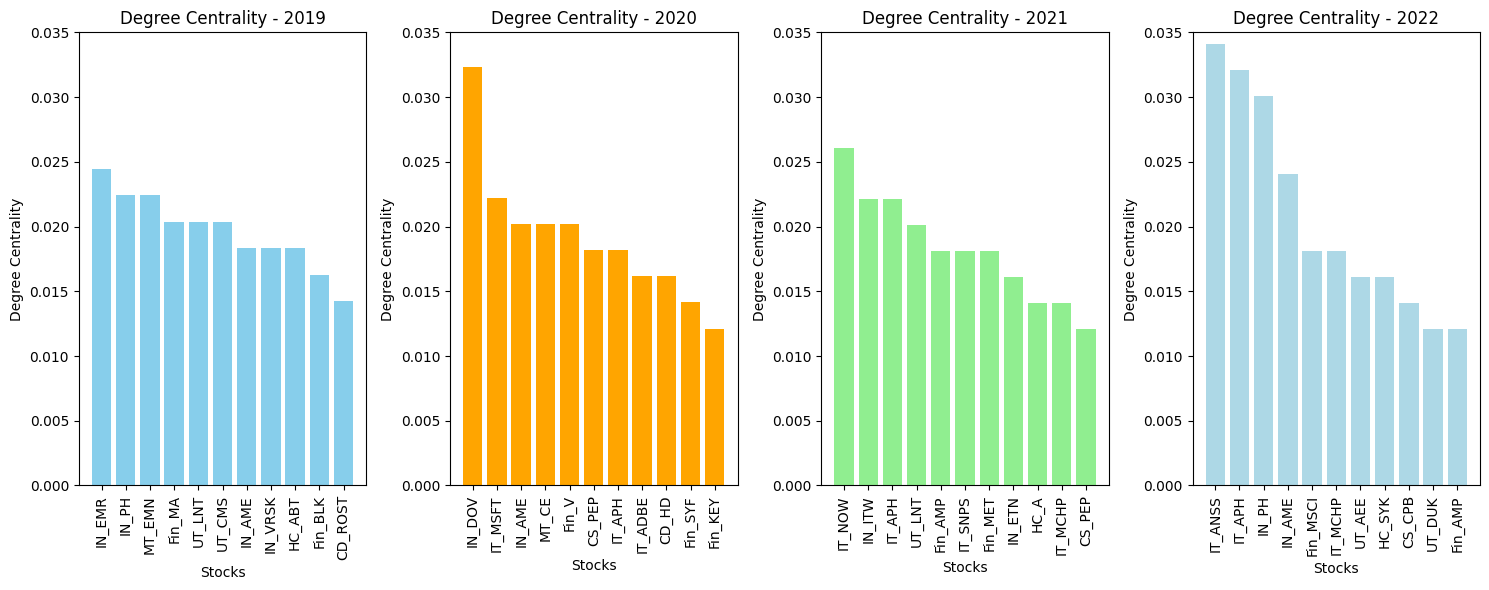

In [ ]:
import matplotlib.pyplot as plt

# Extract top five nodes and their degree centrality values for each year
top_5_degree_19 = degree_19.head(11)
top_5_degree_20 = degree_20.head(11)
top_5_degree_21 = degree_21.head(11)
top_5_degree_22 = degree_22.head(11)

# Plotting the top five nodes for each year
plt.figure(figsize=(15, 6))

# 2019
plt.subplot(141)
plt.bar(top_5_degree_19['Node'], top_5_degree_19['Degree Centrality'], color='skyblue')
plt.title('Degree Centrality - 2019')
plt.xlabel('Stocks')
plt.ylabel('Degree Centrality')
plt.xticks(rotation=90)
plt.ylim(0.0, 0.035)  # Setting y-axis limits
plt.tight_layout()

# 2020
plt.subplot(142)
plt.bar(top_5_degree_20['Node'], top_5_degree_20['Degree Centrality'], color='orange')
plt.title('Degree Centrality - 2020')
plt.xlabel('Stocks')
plt.ylabel('Degree Centrality')
plt.xticks(rotation=90)
plt.ylim(0.0, 0.035)  # Setting y-axis limits
plt.tight_layout()

# 2021
plt.subplot(143)
plt.bar(top_5_degree_21['Node'], top_5_degree_21['Degree Centrality'], color='lightgreen')
plt.title('Degree Centrality - 2021')
plt.xlabel('Stocks')
plt.ylabel('Degree Centrality')
plt.xticks(rotation=90)
plt.ylim(0.0, 0.035)  # Setting y-axis limits
plt.tight_layout()

# 2022
plt.subplot(144)
plt.bar(top_5_degree_22['Node'], top_5_degree_22['Degree Centrality'], color='lightblue')
plt.title('Degree Centrality - 2022')
plt.xlabel('Stocks')
plt.ylabel('Degree Centrality')
plt.xticks(rotation=90)
plt.ylim(0.0, 0.035)  # Setting y-axis limits
plt.tight_layout()

plt.show()


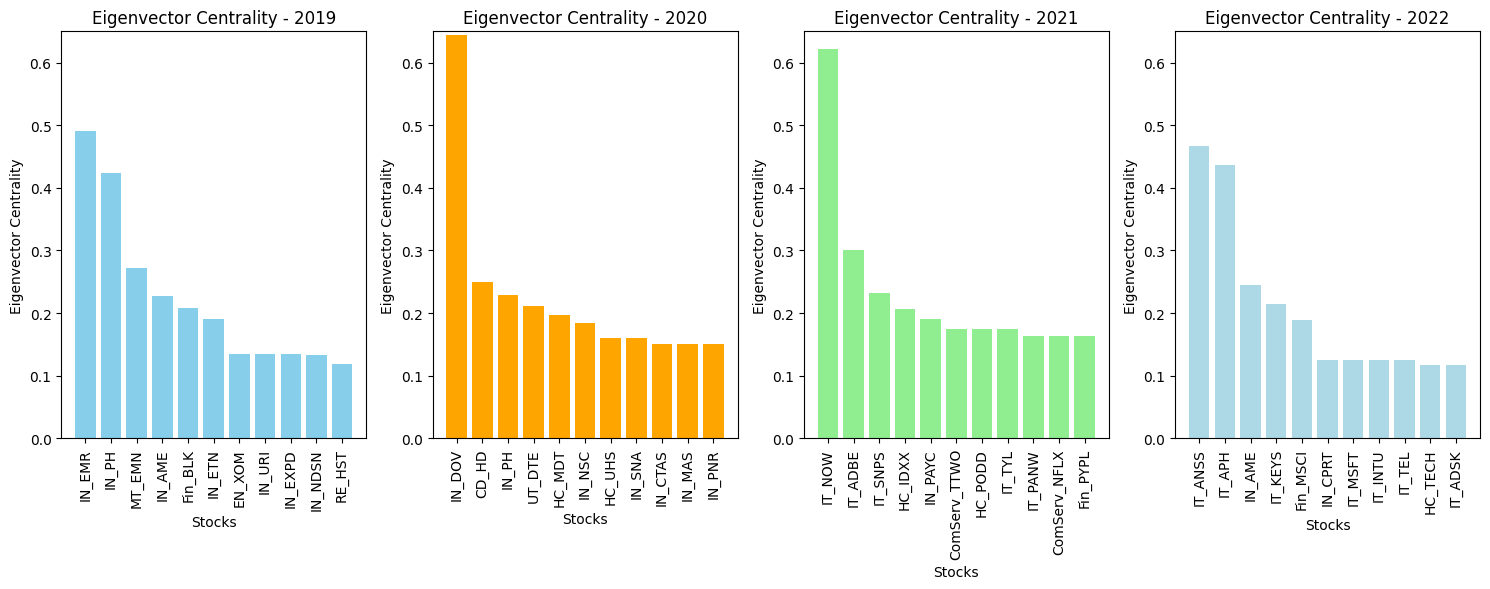

In [ ]:
import matplotlib.pyplot as plt

# Extract top five nodes and their eigenvector centrality values for each year
top_5_eigen_19 = eigen_19.head(11)
top_5_eigen_20 = eigen_20.head(11)
top_5_eigen_21 = eigen_21.head(11)
top_5_eigen_22 = eigen_22.head(11)

# Plotting the top five nodes for each year
plt.figure(figsize=(15, 6))

# 2019
plt.subplot(141)
plt.bar(top_5_eigen_19['Node'], top_5_eigen_19['eigenvector_centrality'], color='skyblue')
plt.title('Eigenvector Centrality - 2019')
plt.xlabel('Stocks')
plt.ylabel('Eigenvector Centrality')
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylim(0.0, 0.65)


# 2020
plt.subplot(142)
plt.bar(top_5_eigen_20['Node'], top_5_eigen_20['eigenvector_centrality'], color='orange')
plt.title('Eigenvector Centrality - 2020')
plt.xlabel('Stocks')
plt.ylabel('Eigenvector Centrality')
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylim(0.0, 0.65)


# 2021
plt.subplot(143)
plt.bar(top_5_eigen_21['Node'], top_5_eigen_21['eigenvector_centrality'], color='lightgreen')
plt.title('Eigenvector Centrality - 2021')
plt.xlabel('Stocks')
plt.ylabel('Eigenvector Centrality')
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylim(0.0, 0.65)


# 2022
plt.subplot(144)
plt.bar(top_5_eigen_22['Node'], top_5_eigen_22['eigenvector_centrality'], color='lightblue')
plt.title('Eigenvector Centrality - 2022')
plt.xlabel('Stocks')
plt.ylabel('Eigenvector Centrality')
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylim(0.0, 0.65)


plt.show()


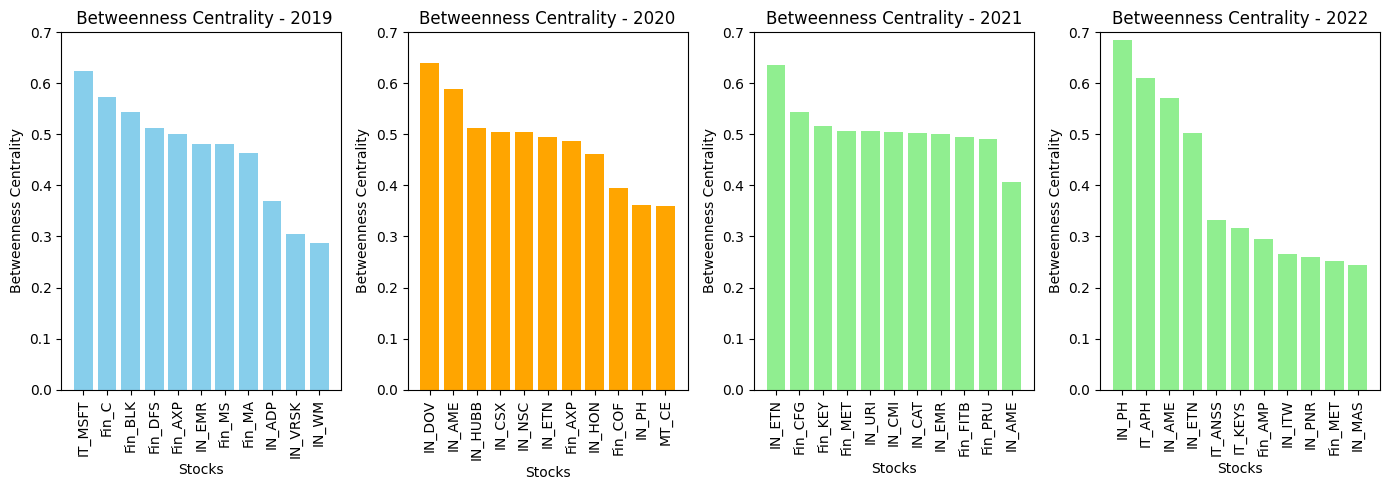

In [ ]:
import matplotlib.pyplot as plt

# Extract top five nodes and their betweenness centrality values for each year
top_5_19 = btw_19.head(11)
top_5_20 = btw_20.head(11)
top_5_21 = btw_21.head(11)
top_5_22 = btw_22.head(11)
# Plotting the top five nodes for each year
plt.figure(figsize=(14, 5))

# 2019
plt.subplot(141)
plt.bar(top_5_19['Node'], top_5_19['betweenness_centrality'], color='skyblue')
plt.title(' Betweenness Centrality - 2019')
plt.xlabel('Stocks')
plt.ylabel('Betweenness Centrality')
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylim(0.0, 0.7)

# 2020
plt.subplot(142)
plt.bar(top_5_20['Node'], top_5_20['betweenness_centrality'], color='orange')
plt.title('Betweenness Centrality - 2020')
plt.xlabel('Stocks')
plt.ylabel('Betweenness Centrality')
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylim(0.0, 0.7)

# 2021
plt.subplot(143)
plt.bar(top_5_21['Node'], top_5_21['betweenness_centrality'], color='lightgreen')
plt.title('Betweenness Centrality - 2021')
plt.xlabel('Stocks')
plt.ylabel('Betweenness Centrality')
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylim(0.0, 0.7)

#2022
plt.subplot(144)
plt.bar(top_5_22['Node'], top_5_22['betweenness_centrality'], color='lightgreen')
plt.title('Betweenness Centrality - 2022')
plt.xlabel('Stocks')
plt.ylabel('Betweenness Centrality')
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylim(0.0, 0.7)

plt.show()


## Centrality Measures based on clubed sectors

In [ ]:
# Dictionary to store companies by sectors
sectors_dict = {}

# Extract sectors from company names and group them
for company in DistMat_22:
    sector_with_brackets = company.split('_')[0]  # Extract sector with brackets from the company name
    sector = sector_with_brackets.strip('()')[:2]  # Extract sector abbreviation

    # Check if the sector key exists in the dictionary
    if sector in sectors_dict:
        sectors_dict[sector].append(company)
    else:
        sectors_dict[sector] = [company]  # Create a new list for the sector if it doesn't exist

# Display the dictionary containing companies grouped by sectors
for sector, companies in sectors_dict.items():
    print(f"{sector}: {companies}")


CD: ['CD_ABNB', 'CD_AMZN', 'CD_APTV', 'CD_AZO', 'CD_BBWI', 'CD_BBY', 'CD_BKNG', 'CD_BWA', 'CD_CCL', 'CD_CMG', 'CD_CZR', 'CD_DHI', 'CD_DPZ', 'CD_DRI', 'CD_EBAY', 'CD_ETSY', 'CD_EXPE', 'CD_F', 'CD_GM', 'CD_GPC', 'CD_GRMN', 'CD_HAS', 'CD_HD', 'CD_HLT', 'CD_KMX', 'CD_LEN', 'CD_LKQ', 'CD_LOW', 'CD_LULU', 'CD_LVS', 'CD_MAR', 'CD_MCD', 'CD_MGM', 'CD_MHK', 'CD_NCLH', 'CD_NKE', 'CD_NVR', 'CD_ORLY', 'CD_PHM', 'CD_POOL', 'CD_RCL', 'CD_RL', 'CD_ROST', 'CD_SBUX', 'CD_TJX', 'CD_TPR', 'CD_TSCO', 'CD_TSLA', 'CD_ULTA', 'CD_VFC', 'CD_WHR', 'CD_WYNN', 'CD_YUM']
CS: ['CS_ADM', 'CS_BF-B', 'CS_BG', 'CS_CAG', 'CS_CHD', 'CS_CL', 'CS_CLX', 'CS_COST', 'CS_CPB', 'CS_DG', 'CS_DLTR', 'CS_EL', 'CS_GIS', 'CS_HRL', 'CS_HSY', 'CS_K', 'CS_KDP', 'CS_KHC', 'CS_KMB', 'CS_KO', 'CS_KR', 'CS_LW', 'CS_MDLZ', 'CS_MKC', 'CS_MNST', 'CS_MO', 'CS_PEP', 'CS_PG', 'CS_PM', 'CS_SJM', 'CS_STZ', 'CS_SYY', 'CS_TAP', 'CS_TGT', 'CS_TSN', 'CS_WBA', 'CS_WMT']
Co: ['ComServ_CHTR', 'ComServ_CMCSA', 'ComServ_DIS', 'ComServ_EA', 'ComServ_FOX', '

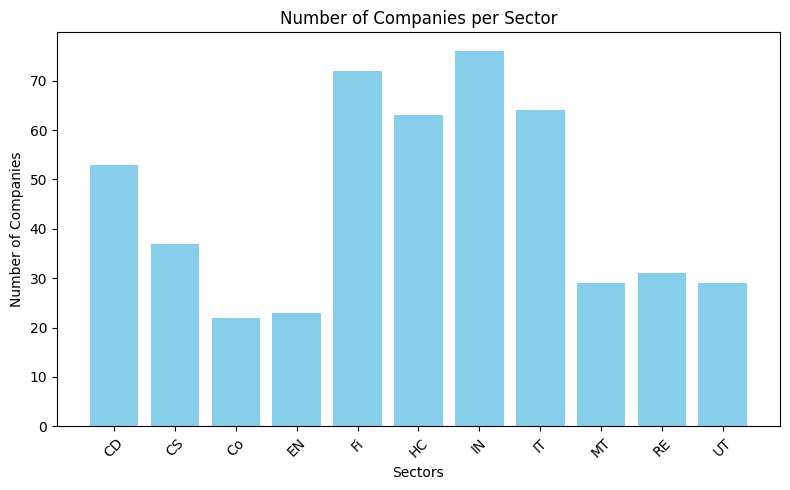

In [ ]:
import matplotlib.pyplot as plt

# Modify your existing code to count companies per sector
sectors_count = {sector: len(companies) for sector, companies in sectors_dict.items()}

# Plotting the count of companies per sector
plt.figure(figsize=(8, 5))
plt.bar(sectors_count.keys(), sectors_count.values(), color='skyblue')
plt.xlabel('Sectors')
plt.ylabel('Number of Companies')
plt.title('Number of Companies per Sector')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import networkx as nx
import numpy as np
import pandas as pd

# Define sectors
sectors = ['ComServ', 'CD', 'CS', 'EN', 'Fin', 'HC', 'IN', 'IT', 'MT', 'RE', 'UT']
sector_avg_eigenvector = {}

# Iterate over sectors
for sector in sectors:
    # Filter companies belonging to the specific sector
    sector_companies = [company for company in DistMat_19.columns if company.split('_')[0] == sector]
    print(f"Sector: {sector}, Companies: {sector_companies}")

    subgraph = DistMat_19[sector_companies].loc[sector_companies]
    G = nx.from_numpy_array(np.array(subgraph))

    # Ensure the graph has nodes and edges before proceeding
    if G.number_of_nodes() > 0 and G.number_of_edges() > 0:
        mst = nx.minimum_spanning_tree(G)

        if mst.number_of_nodes() > 0 and mst.number_of_edges() > 0:
            eigenvector_centrality = nx.eigenvector_centrality(mst, max_iter=500, tol=1e-6)

            avg_eigenvector = np.mean(list(eigenvector_centrality.values()))
            sector_avg_eigenvector[sector] = avg_eigenvector

# Convert the dictionary to a DataFrame
avg_eigenvector_19 = pd.DataFrame(list(sector_avg_eigenvector.items()), columns=['Sector', 'Average_Eigenvector'])
print(avg_eigenvector_19)


Sector: ComServ, Companies: ['ComServ_CHTR', 'ComServ_CMCSA', 'ComServ_DIS', 'ComServ_EA', 'ComServ_GOOG', 'ComServ_GOOGL', 'ComServ_IPG', 'ComServ_LYV', 'ComServ_META', 'ComServ_MTCH', 'ComServ_NFLX', 'ComServ_NWS', 'ComServ_NWSA', 'ComServ_OMC', 'ComServ_PARA', 'ComServ_T', 'ComServ_TMUS', 'ComServ_TTWO', 'ComServ_VZ', 'ComServ_WBD']
Sector: CD, Companies: ['CD_AMZN', 'CD_APTV', 'CD_AZO', 'CD_BBWI', 'CD_BBY', 'CD_BKNG', 'CD_BWA', 'CD_CCL', 'CD_CMG', 'CD_CZR', 'CD_DHI', 'CD_DPZ', 'CD_DRI', 'CD_EBAY', 'CD_ETSY', 'CD_EXPE', 'CD_F', 'CD_GM', 'CD_GPC', 'CD_GRMN', 'CD_HAS', 'CD_HD', 'CD_HLT', 'CD_KMX', 'CD_LEN', 'CD_LKQ', 'CD_LOW', 'CD_LULU', 'CD_LVS', 'CD_MAR', 'CD_MCD', 'CD_MGM', 'CD_MHK', 'CD_NCLH', 'CD_NKE', 'CD_NVR', 'CD_ORLY', 'CD_PHM', 'CD_POOL', 'CD_RCL', 'CD_RL', 'CD_ROST', 'CD_SBUX', 'CD_TJX', 'CD_TPR', 'CD_TSCO', 'CD_TSLA', 'CD_ULTA', 'CD_VFC', 'CD_WHR', 'CD_WYNN', 'CD_YUM']
Sector: CS, Companies: ['CS_ADM', 'CS_BF-B', 'CS_BG', 'CS_CAG', 'CS_CHD', 'CS_CL', 'CS_CLX', 'CS_COST', '

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd

# Define sectors
sectors = ['ComServ', 'CD', 'CS', 'EN', 'Fin', 'HC', 'IN', 'IT', 'MT', 'RE', 'UT']
sector_avg_eigenvector = {}

# Iterate over sectors
for sector in sectors:
    # Filter companies belonging to the specific sector
    sector_companies = [company for company in DistMat_20.columns if company.split('_')[0] == sector]
    print(f"Sector: {sector}, Companies: {sector_companies}")

    subgraph = DistMat_20[sector_companies].loc[sector_companies]
    G = nx.from_numpy_array(np.array(subgraph))

    # Ensure the graph has nodes and edges before proceeding
    if G.number_of_nodes() > 0 and G.number_of_edges() > 0:
        mst = nx.minimum_spanning_tree(G)

        if mst.number_of_nodes() > 0 and mst.number_of_edges() > 0:
            eigenvector_centrality = nx.eigenvector_centrality(mst, max_iter=500, tol=1e-6)

            avg_eigenvector = np.mean(list(eigenvector_centrality.values()))
            sector_avg_eigenvector[sector] = avg_eigenvector

# Convert the dictionary to a DataFrame
avg_eigenvector_20 = pd.DataFrame(list(sector_avg_eigenvector.items()), columns=['Sector', 'Average_Eigenvector'])
print(avg_eigenvector_20)


Sector: ComServ, Companies: ['ComServ_CHTR', 'ComServ_CMCSA', 'ComServ_DIS', 'ComServ_EA', 'ComServ_FOX', 'ComServ_FOXA', 'ComServ_GOOG', 'ComServ_GOOGL', 'ComServ_IPG', 'ComServ_LYV', 'ComServ_META', 'ComServ_MTCH', 'ComServ_NFLX', 'ComServ_NWS', 'ComServ_NWSA', 'ComServ_OMC', 'ComServ_PARA', 'ComServ_T', 'ComServ_TMUS', 'ComServ_TTWO', 'ComServ_VZ', 'ComServ_WBD']
Sector: CD, Companies: ['CD_AMZN', 'CD_APTV', 'CD_AZO', 'CD_BBWI', 'CD_BBY', 'CD_BKNG', 'CD_BWA', 'CD_CCL', 'CD_CMG', 'CD_CZR', 'CD_DHI', 'CD_DPZ', 'CD_DRI', 'CD_EBAY', 'CD_ETSY', 'CD_EXPE', 'CD_F', 'CD_GM', 'CD_GPC', 'CD_GRMN', 'CD_HAS', 'CD_HD', 'CD_HLT', 'CD_KMX', 'CD_LEN', 'CD_LKQ', 'CD_LOW', 'CD_LULU', 'CD_LVS', 'CD_MAR', 'CD_MCD', 'CD_MGM', 'CD_MHK', 'CD_NCLH', 'CD_NKE', 'CD_NVR', 'CD_ORLY', 'CD_PHM', 'CD_POOL', 'CD_RCL', 'CD_RL', 'CD_ROST', 'CD_SBUX', 'CD_TJX', 'CD_TPR', 'CD_TSCO', 'CD_TSLA', 'CD_ULTA', 'CD_VFC', 'CD_WHR', 'CD_WYNN', 'CD_YUM']
Sector: CS, Companies: ['CS_ADM', 'CS_BF-B', 'CS_BG', 'CS_CAG', 'CS_CHD', 

In [ ]:
import networkx as nx
import numpy as np
import pandas as pd

# Define sectors
sectors = ['ComServ', 'CD', 'CS', 'EN', 'Fin', 'HC', 'IN', 'IT', 'MT', 'RE', 'UT']
sector_avg_eigenvector = {}

# Iterate over sectors
for sector in sectors:
    # Filter companies belonging to the specific sector
    sector_companies = [company for company in DistMat_21.columns if company.split('_')[0] == sector]
    print(f"Sector: {sector}, Companies: {sector_companies}")

    subgraph = DistMat_21[sector_companies].loc[sector_companies]
    G = nx.from_numpy_array(np.array(subgraph))

    # Ensure the graph has nodes and edges before proceeding
    if G.number_of_nodes() > 0 and G.number_of_edges() > 0:
        mst = nx.minimum_spanning_tree(G)

        if mst.number_of_nodes() > 0 and mst.number_of_edges() > 0:
            eigenvector_centrality = nx.eigenvector_centrality(mst, max_iter=500, tol=1e-6)

            avg_eigenvector = np.mean(list(eigenvector_centrality.values()))
            sector_avg_eigenvector[sector] = avg_eigenvector

# Convert the dictionary to a DataFrame
avg_eigenvector_21 = pd.DataFrame(list(sector_avg_eigenvector.items()), columns=['Sector', 'Average_Eigenvector'])
print(avg_eigenvector_21)


Sector: ComServ, Companies: ['ComServ_CHTR', 'ComServ_CMCSA', 'ComServ_DIS', 'ComServ_EA', 'ComServ_FOX', 'ComServ_FOXA', 'ComServ_GOOG', 'ComServ_GOOGL', 'ComServ_IPG', 'ComServ_LYV', 'ComServ_META', 'ComServ_MTCH', 'ComServ_NFLX', 'ComServ_NWS', 'ComServ_NWSA', 'ComServ_OMC', 'ComServ_PARA', 'ComServ_T', 'ComServ_TMUS', 'ComServ_TTWO', 'ComServ_VZ', 'ComServ_WBD']
Sector: CD, Companies: ['CD_ABNB', 'CD_AMZN', 'CD_APTV', 'CD_AZO', 'CD_BBWI', 'CD_BBY', 'CD_BKNG', 'CD_BWA', 'CD_CCL', 'CD_CMG', 'CD_CZR', 'CD_DHI', 'CD_DPZ', 'CD_DRI', 'CD_EBAY', 'CD_ETSY', 'CD_EXPE', 'CD_F', 'CD_GM', 'CD_GPC', 'CD_GRMN', 'CD_HAS', 'CD_HD', 'CD_HLT', 'CD_KMX', 'CD_LEN', 'CD_LKQ', 'CD_LOW', 'CD_LULU', 'CD_LVS', 'CD_MAR', 'CD_MCD', 'CD_MGM', 'CD_MHK', 'CD_NCLH', 'CD_NKE', 'CD_NVR', 'CD_ORLY', 'CD_PHM', 'CD_POOL', 'CD_RCL', 'CD_RL', 'CD_ROST', 'CD_SBUX', 'CD_TJX', 'CD_TPR', 'CD_TSCO', 'CD_TSLA', 'CD_ULTA', 'CD_VFC', 'CD_WHR', 'CD_WYNN', 'CD_YUM']
Sector: CS, Companies: ['CS_ADM', 'CS_BF-B', 'CS_BG', 'CS_CAG',

In [ ]:
# Define sectors
sectors = ['ComServ', 'CD', 'CS', 'EN', 'Fin', 'HC', 'IN', 'IT', 'MT', 'RE', 'UT']
sector_avg_eigenvector = {}

# Iterate over sectors
for sector in sectors:
    # Filter companies belonging to the specific sector
    sector_companies = [company for company in DistMat_22.columns if company.split('_')[0] == sector]
    print(f"Sector: {sector}, Companies: {sector_companies}")

    subgraph = DistMat_22[sector_companies].loc[sector_companies]
    G = nx.from_numpy_array(np.array(subgraph))

    # Ensure the graph has nodes and edges before proceeding
    if G.number_of_nodes() > 0 and G.number_of_edges() > 0:
        mst = nx.minimum_spanning_tree(G)

        if mst.number_of_nodes() > 0 and mst.number_of_edges() > 0:
            eigenvector_centrality = nx.eigenvector_centrality(mst, max_iter=500, tol=1e-6)

            avg_eigenvector = np.mean(list(eigenvector_centrality.values()))
            sector_avg_eigenvector[sector] = avg_eigenvector

# Convert the dictionary to a DataFrame
avg_eigenvector_22 = pd.DataFrame(list(sector_avg_eigenvector.items()), columns=['Sector', 'Average_Eigenvector'])
print(avg_eigenvector_22)


Sector: ComServ, Companies: ['ComServ_CHTR', 'ComServ_CMCSA', 'ComServ_DIS', 'ComServ_EA', 'ComServ_FOX', 'ComServ_FOXA', 'ComServ_GOOG', 'ComServ_GOOGL', 'ComServ_IPG', 'ComServ_LYV', 'ComServ_META', 'ComServ_MTCH', 'ComServ_NFLX', 'ComServ_NWS', 'ComServ_NWSA', 'ComServ_OMC', 'ComServ_PARA', 'ComServ_T', 'ComServ_TMUS', 'ComServ_TTWO', 'ComServ_VZ', 'ComServ_WBD']
Sector: CD, Companies: ['CD_ABNB', 'CD_AMZN', 'CD_APTV', 'CD_AZO', 'CD_BBWI', 'CD_BBY', 'CD_BKNG', 'CD_BWA', 'CD_CCL', 'CD_CMG', 'CD_CZR', 'CD_DHI', 'CD_DPZ', 'CD_DRI', 'CD_EBAY', 'CD_ETSY', 'CD_EXPE', 'CD_F', 'CD_GM', 'CD_GPC', 'CD_GRMN', 'CD_HAS', 'CD_HD', 'CD_HLT', 'CD_KMX', 'CD_LEN', 'CD_LKQ', 'CD_LOW', 'CD_LULU', 'CD_LVS', 'CD_MAR', 'CD_MCD', 'CD_MGM', 'CD_MHK', 'CD_NCLH', 'CD_NKE', 'CD_NVR', 'CD_ORLY', 'CD_PHM', 'CD_POOL', 'CD_RCL', 'CD_RL', 'CD_ROST', 'CD_SBUX', 'CD_TJX', 'CD_TPR', 'CD_TSCO', 'CD_TSLA', 'CD_ULTA', 'CD_VFC', 'CD_WHR', 'CD_WYNN', 'CD_YUM']
Sector: CS, Companies: ['CS_ADM', 'CS_BF-B', 'CS_BG', 'CS_CAG',

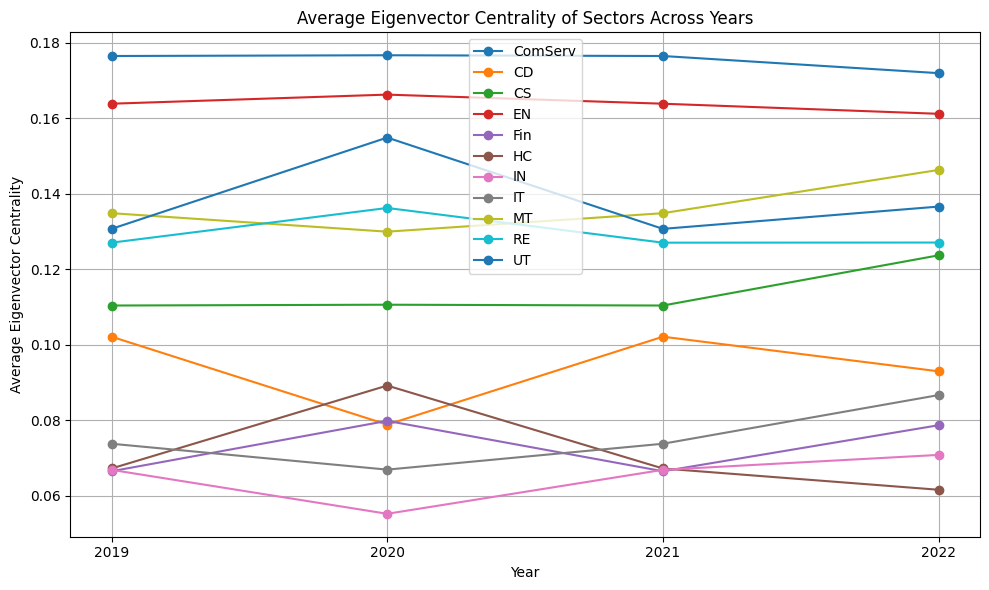

In [ ]:
import matplotlib.pyplot as plt

# Plotting the average eigenvector centrality for each sector across four years
plt.figure(figsize=(10, 6))

# Plotting lines for each sector across years
for sector in avg_eigenvector_19['Sector']:
    data_19 = avg_eigenvector_19[avg_eigenvector_19['Sector'] == sector]['Average_Eigenvector']
    data_20 = avg_eigenvector_20[avg_eigenvector_20['Sector'] == sector]['Average_Eigenvector']
    data_21 = avg_eigenvector_21[avg_eigenvector_21['Sector'] == sector]['Average_Eigenvector']
    data_22 = avg_eigenvector_22[avg_eigenvector_22['Sector'] == sector]['Average_Eigenvector']

    plt.plot(['2019', '2020', '2021', '2022'], [data_19.iloc[0], data_20.iloc[0], data_21.iloc[0], data_22.iloc[0]], label=sector, marker='o')

plt.xlabel('Year')
plt.ylabel('Average Eigenvector Centrality')
plt.title('Average Eigenvector Centrality of Sectors Across Years')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


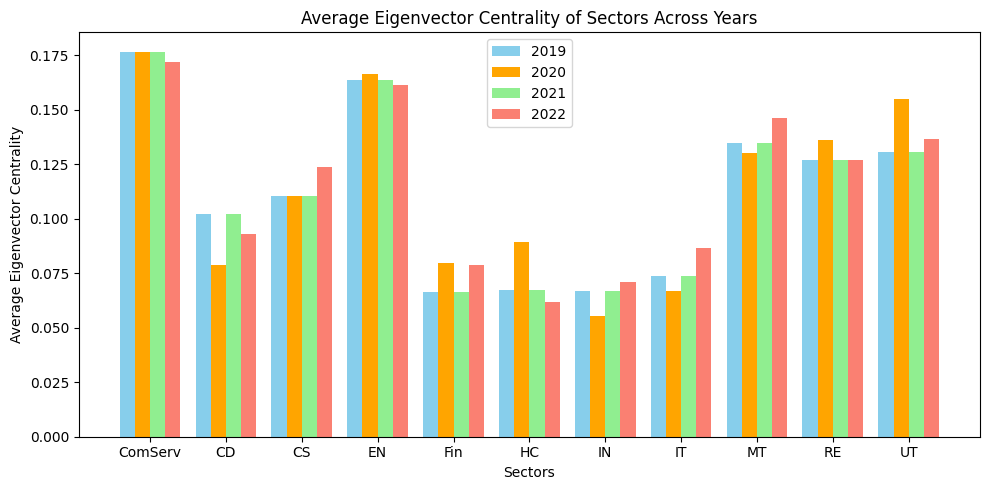

In [ ]:
import matplotlib.pyplot as plt

# Combine the average eigenvector centrality values for each sector across four years
sectors = ['ComServ', 'CD', 'CS', 'EN', 'Fin', 'HC', 'IN', 'IT', 'MT', 'RE', 'UT']
avg_eigenvector_19_values = [avg_eigenvector_19[avg_eigenvector_19['Sector'] == sector]['Average_Eigenvector'].values[0] for sector in sectors]
avg_eigenvector_20_values = [avg_eigenvector_20[avg_eigenvector_20['Sector'] == sector]['Average_Eigenvector'].values[0] for sector in sectors]
avg_eigenvector_21_values = [avg_eigenvector_21[avg_eigenvector_21['Sector'] == sector]['Average_Eigenvector'].values[0] for sector in sectors]
avg_eigenvector_22_values = [avg_eigenvector_22[avg_eigenvector_22['Sector'] == sector]['Average_Eigenvector'].values[0] for sector in sectors]

# Set the width of the bars
bar_width = 0.2
index = range(len(sectors))

# Plotting the bar plots for each year
plt.figure(figsize=(10, 5))

plt.bar(index, avg_eigenvector_19_values, bar_width, label='2019', color='skyblue')
plt.bar([i + bar_width for i in index], avg_eigenvector_20_values, bar_width, label='2020', color='orange')
plt.bar([i + 2 * bar_width for i in index], avg_eigenvector_21_values, bar_width, label='2021', color='lightgreen')
plt.bar([i + 3 * bar_width for i in index], avg_eigenvector_22_values, bar_width, label='2022', color='salmon')

plt.xlabel('Sectors')
plt.ylabel('Average Eigenvector Centrality')
plt.title('Average Eigenvector Centrality of Sectors Across Years')
plt.xticks([i + 1.5 * bar_width for i in index], sectors)
plt.legend()
plt.tight_layout()
plt.show()


## Community Detection

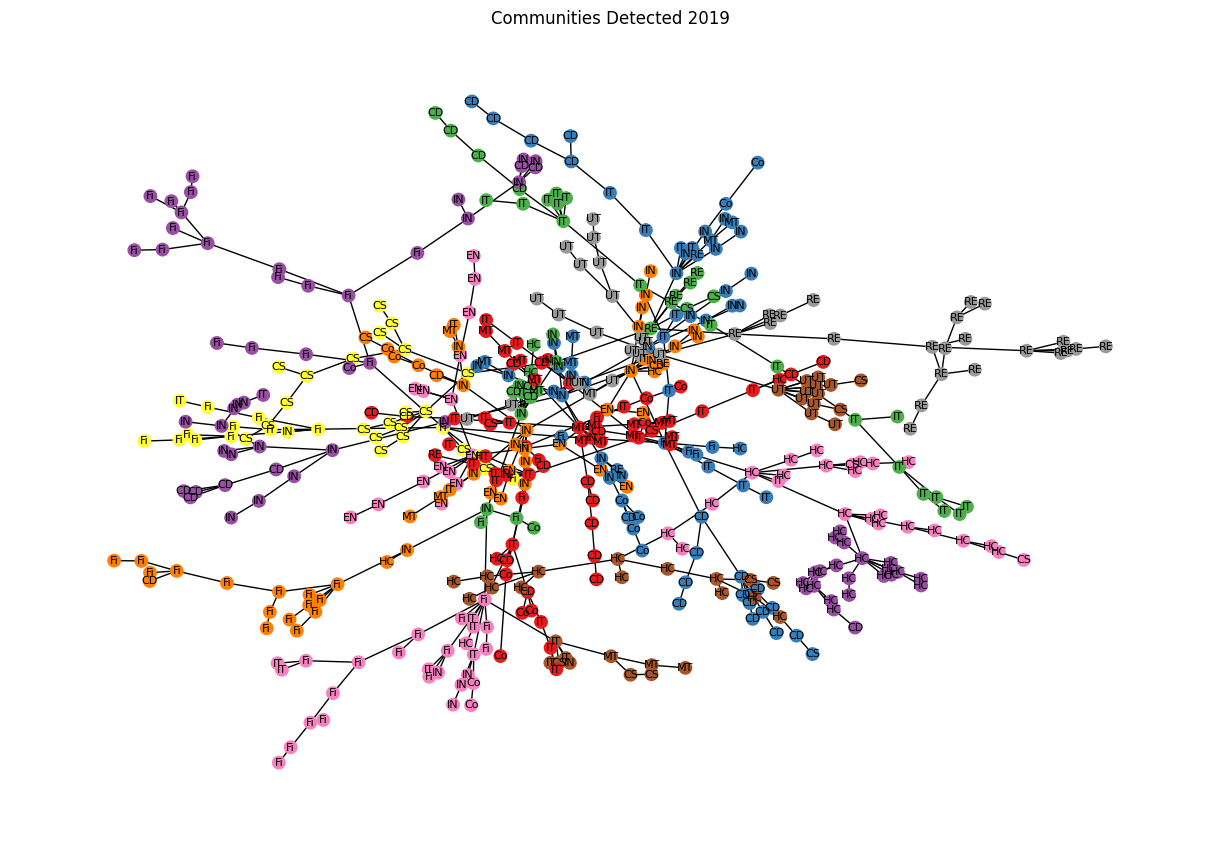

In [207]:
from community import community_louvain
partition_thresholded_19= community_louvain.best_partition(mst_19)
plt.figure(figsize=(12, 8))
pos_thresholded = nx.spring_layout(mst_19)
node_colors_thresholded = [partition_thresholded_19[node] for node in mst_19.nodes()]
nx.draw(mst_19, pos_thresholded, labels = node_labels_19, with_labels=True, node_color=node_colors_thresholded, cmap=plt.cm.Set1, node_size=80, font_size=8, edge_color='black')
plt.title('Communities Detected 2019')
plt.show()

In [208]:
# Assuming partition_thresholded maps nodes to communities and node_labels_19 stores label names as a list
sectors_in_communities_19 = {community: [] for community in set(partition_thresholded_19.values())}

for node, community in partition_thresholded_19.items():
    # Assuming node IDs correspond to indices in node_labels_19
    sector_id = node  # Assuming node is the sector ID
    sector_name = node_names_19[sector_id] if sector_id < len(node_names_19) else f"Unknown Sector {sector_id}"
    sectors_in_communities_19[community].append(sector_name)

# Print sectors in each community
for community, sectors in sectors_in_communities_19.items():
    print(f"Community {community}: {sectors}")


Community 0: ['CD', 'CD', 'CD', 'Co', 'Co', 'Co', 'Co', 'Co', 'Co', 'Fi', 'Fi', 'Fi', 'Fi', 'HC', 'IT', 'IT', 'IT', 'IT', 'IT']
Community 1: ['CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CS', 'IN', 'IT', 'IT', 'IT', 'MT', 'MT', 'MT', 'MT', 'MT', 'MT', 'MT', 'MT', 'MT', 'MT', 'MT', 'MT', 'MT', 'MT']
Community 2: ['CD', 'CD', 'CD', 'CS', 'Co', 'HC', 'IN', 'IN', 'IT', 'IT', 'IT', 'IT', 'IT', 'IT', 'IT', 'IT', 'IT', 'IT', 'IT', 'IT', 'RE']
Community 3: ['CD', 'Co', 'Co', 'Co', 'Co', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'MT', 'MT', 'MT', 'RE']
Community 4: ['CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CS', 'CS', 'Fi', 'Fi', 'Fi', 'Fi', 'Fi', 'HC', 'IT', 'IT', 'IT', 'IT', 'IT', 'IT']
Community 5: ['CD', 'CD', 'CD', 'CD', 'CD', 'Co', 'Co', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IT', 'IT', 'IT', 'IT', 'MT', 'MT', 'RE']
Community 6: ['CD', 'CD', 'CD', 'CS', 'CS', 'Co', 'Fi', 'Fi', 'H

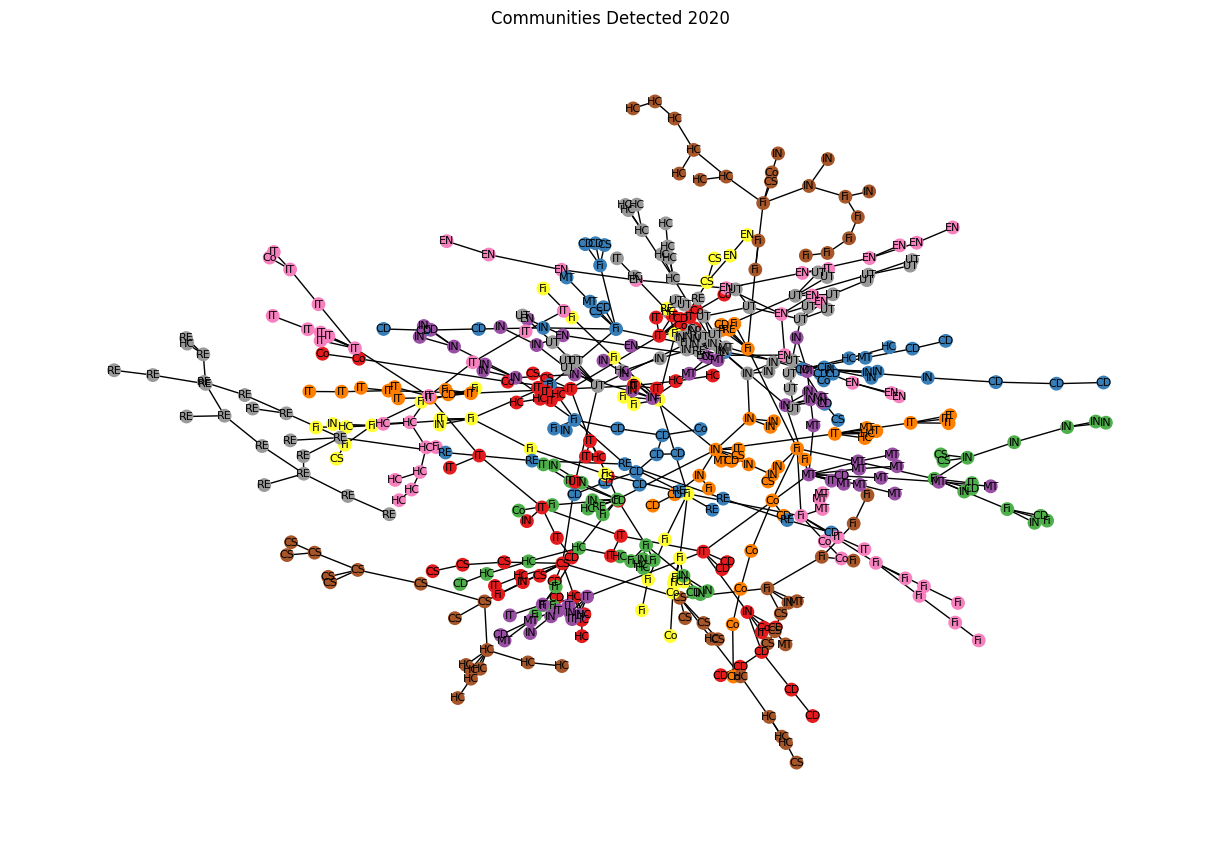

In [209]:
from community import community_louvain
partition_thresholded_20= community_louvain.best_partition(mst_20)
plt.figure(figsize=(12, 8))
pos_thresholded = nx.spring_layout(mst_20)
node_colors_thresholded = [partition_thresholded_20[node] for node in mst_20.nodes()]
nx.draw(mst_20, pos_thresholded, labels = node_labels_20, with_labels=True, node_color=node_colors_thresholded, cmap=plt.cm.Set1, node_size=80, font_size=8, edge_color='black')

plt.title('Communities Detected 2020')
plt.show()

In [210]:
# Assuming partition_thresholded maps nodes to communities and node_labels_20 stores label names as a list
sectors_in_communities_20 = {community: [] for community in set(partition_thresholded_20.values())}

for node, community in partition_thresholded_20.items():
    # Assuming node IDs correspond to indices in node_labels_20
    sector_id = node  # Assuming node is the sector ID
    sector_name = node_names_20[sector_id] if sector_id < len(node_names_20) else f"Unknown Sector {sector_id}"
    sectors_in_communities_20[community].append(sector_name)

# Print sectors in each community
for community, sectors in sectors_in_communities_20.items():
    print(f"Community {community}: {sectors}")


Community 0: ['CD', 'CD', 'CS', 'CS', 'CS', 'Co', 'Co', 'Co', 'Co', 'Co', 'Co', 'Co', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'IT', 'IT', 'IT', 'IT', 'IT', 'IT', 'IT', 'IT', 'IT', 'IT', 'IT', 'IT']
Community 1: ['CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'Co', 'IN', 'IN', 'IT', 'IT', 'IT', 'IT', 'IT', 'IT', 'IT', 'IT']
Community 2: ['CD', 'CD', 'CS', 'CS', 'CS', 'CS', 'CS', 'Fi', 'HC', 'HC', 'HC', 'HC', 'HC', 'IN', 'IT', 'UT']
Community 3: ['CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CS', 'Co', 'HC', 'HC', 'MT']
Community 4: ['CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'Co', 'Fi', 'Fi', 'Fi', 'IN', 'RE', 'RE', 'RE', 'RE', 'RE', 'RE', 'RE']
Community 5: ['CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CS', 'CS', 'Fi', 'Fi', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'MT', 'MT']
Community 6: ['CD', 'CD', 'Co', 'Fi', 'Fi', 'Fi', 'Fi', 'Fi', 'Fi', 'Fi', 'Fi', 'Fi', 'Fi', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IT', 'IT', 'R

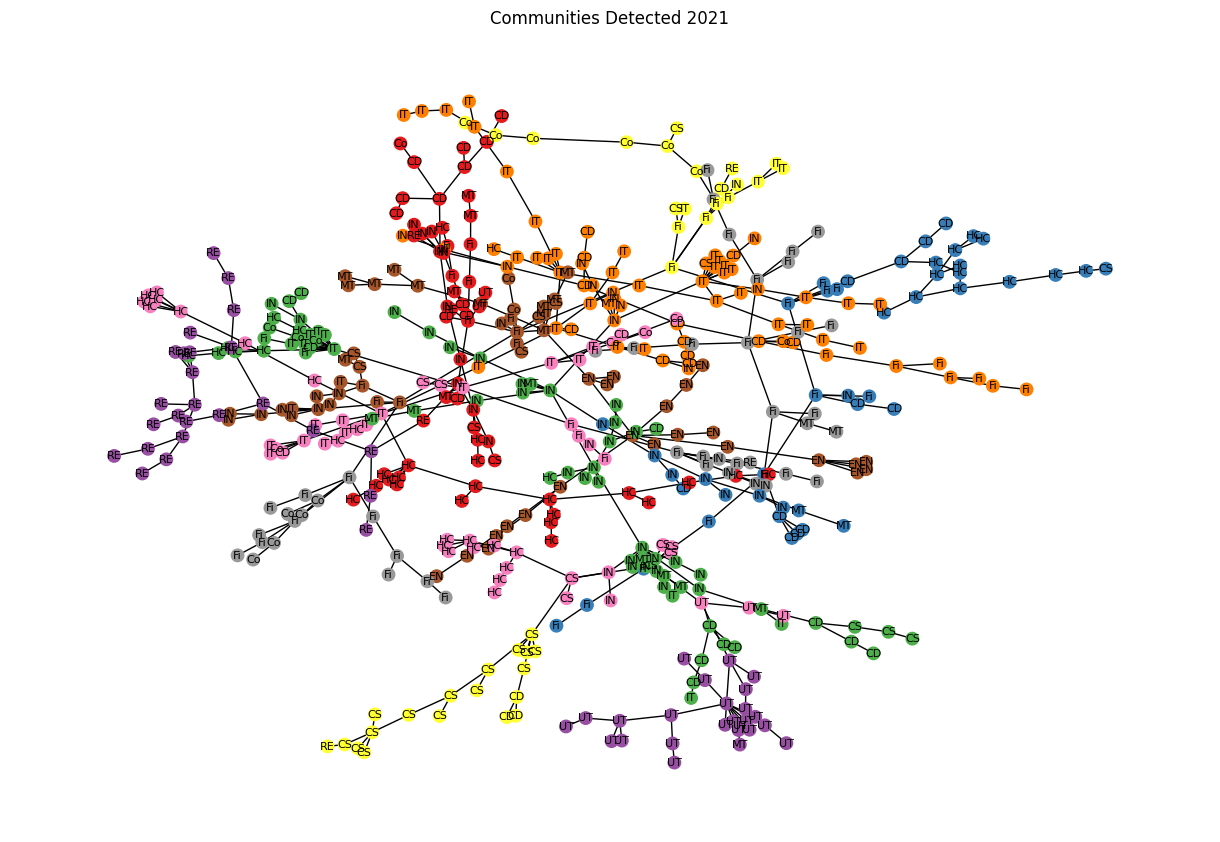

In [211]:
from community import community_louvain
partition_thresholded_21 = community_louvain.best_partition(mst_21)
plt.figure(figsize=(12, 8))
pos_thresholded = nx.spring_layout(mst_21)
node_colors_thresholded = [partition_thresholded_21[node] for node in mst_21.nodes()]
nx.draw(mst_21, pos_thresholded, labels = node_labels_21, with_labels=True, node_color=node_colors_thresholded, cmap=plt.cm.Set1, node_size=80, font_size=8, edge_color='black')

plt.title('Communities Detected 2021')
plt.show()

In [212]:
# Assuming partition_thresholded maps nodes to communities and node_labels_21 stores label names as a list
sectors_in_communities_21 = {community: [] for community in set(partition_thresholded_21.values())}

for node, community in partition_thresholded_21.items():
    # Assuming node IDs correspond to indices in node_labels_21
    sector_id = node  # Assuming node is the sector ID
    sector_name = node_names_21[sector_id] if sector_id < len(node_names_21) else f"Unknown Sector {sector_id}"
    sectors_in_communities_21[community].append(sector_name)

# Print sectors in each community
for community, sectors in sectors_in_communities_21.items():
    print(f"Community {community}: {sectors}")


Community 0: ['CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CS', 'CS', 'Co', 'HC', 'HC', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'MT', 'RE', 'RE']
Community 1: ['HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC']
Community 2: ['CD', 'CD', 'CD', 'Fi', 'Fi', 'Fi', 'Fi', 'Fi', 'HC', 'IN', 'IN', 'MT', 'MT', 'MT', 'RE', 'UT', 'UT']
Community 3: ['CD', 'CD', 'CD', 'CD', 'CS', 'Fi', 'Fi', 'Fi', 'Fi', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC', 'HC']
Community 4: ['CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'Fi', 'Fi', 'Fi', 'Fi', 'Fi', 'Fi', 'Fi', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'MT', 'MT']
Community 5: ['CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CS', 'CS', 'CS', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IT', 'IT', 'IT', 'MT', 'MT', 'MT', 'MT']
Community 6: ['CD', 'HC', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'I

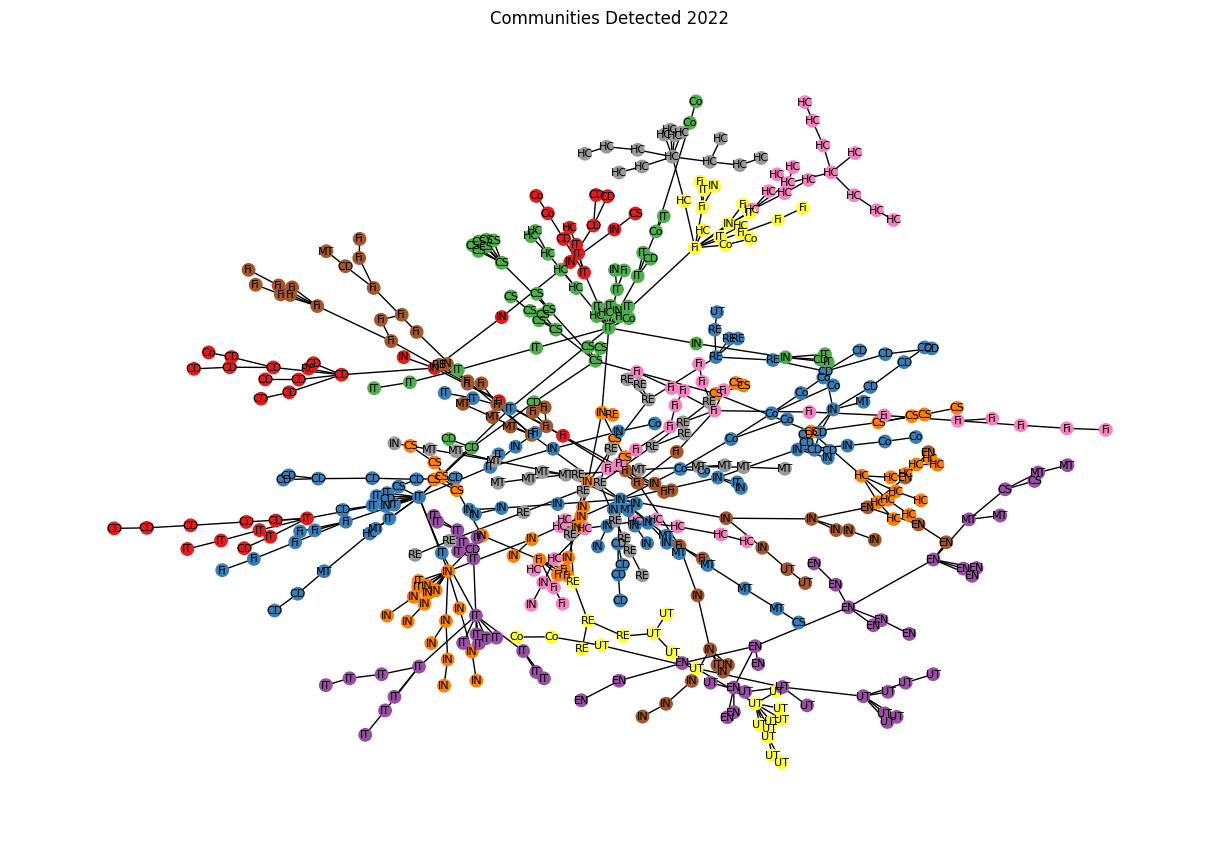

In [213]:
from community import community_louvain
partition_thresholded_22 = community_louvain.best_partition(mst_22)
plt.figure(figsize=(12, 8))
pos_thresholded = nx.spring_layout(mst_22)
node_colors_thresholded = [partition_thresholded_22[node] for node in mst_22.nodes()]
nx.draw(mst_22, pos_thresholded, labels = node_labels_22, with_labels=True, node_color=node_colors_thresholded, cmap=plt.cm.Set1, node_size=80, font_size=8, edge_color='black')

plt.title('Communities Detected 2022')
plt.show()

In [214]:
# Assuming partition_thresholded maps nodes to communities and node_labels_19 stores label names as a list
sectors_in_communities_22 = {community: [] for community in set(partition_thresholded_22.values())}

for node, community in partition_thresholded_22.items():
    # Assuming node IDs correspond to indices in node_labels_22
    sector_id = node  # Assuming node is the sector ID
    sector_name = node_names_22[sector_id] if sector_id < len(node_names_22) else f"Unknown Sector {sector_id}"
    sectors_in_communities_22[community].append(sector_name)

# Print sectors in each community
for community, sectors in sectors_in_communities_22.items():
    print(f"Community {community}: {sectors}")


Community 0: ['CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CS', 'Co', 'Fi', 'Fi', 'IN', 'IN', 'IN', 'IN', 'IN', 'RE']
Community 1: ['CD', 'Co', 'Co', 'HC', 'IT', 'IT', 'IT']
Community 2: ['CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'IT', 'IT', 'IT', 'IT', 'IT']
Community 3: ['CD', 'CD', 'CD', 'CD', 'CS', 'Co', 'Co', 'Co', 'Co', 'Co', 'Co', 'Co', 'Co', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'MT', 'MT', 'MT', 'MT', 'MT', 'MT']
Community 4: ['CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CS', 'Co', 'Fi', 'Fi', 'Fi', 'Fi', 'Fi', 'Fi', 'Fi', 'HC', 'IN', 'IN', 'IN', 'IN', 'IT', 'IT', 'IT', 'IT', 'IT', 'IT', 'IT', 'IT', 'IT', 'IT', 'IT', 'IT', 'MT', 'MT']
Community 5: ['CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'CD', 'Co', 'Co', 'IN', 'IN', 'IN', 'IN', 'IN', 'IN', 'IT', 'MT', 'RE', 'RE', 'RE', 'RE', 'RE', 'UT']
Community 6: ['CD', 'CD', 'Co', 'Co', 'Co', 'Co', 'Fi', 'Fi', 'HC', 'HC', 'HC', 'H

In [220]:
# Assuming sectors_in_communities_19, sectors_in_communities_20, sectors_in_communities_21, sectors_in_communities_22 contain community information for each respective year

# Calculate the total number of communities for each year
num_communities_19 = len(sectors_in_communities_19)
num_communities_20 = len(sectors_in_communities_20)
num_communities_21 = len(sectors_in_communities_21)
num_communities_22 = len(sectors_in_communities_22)

# Create a DataFrame to display the total number of communities for each year
data = {
    'Year': ['2019', '2020', '2021', '2022'],
    'Total Communities': [num_communities_19, num_communities_20, num_communities_21, num_communities_22]
}

# Create the DataFrame
df_total_communities = pd.DataFrame(data)

# Display the DataFrame showing the total number of communities for each year
df_total_communities


Year  Total Communities
0  2019                 25
1  2020                 25
2  2021                 23
3  2022                 25

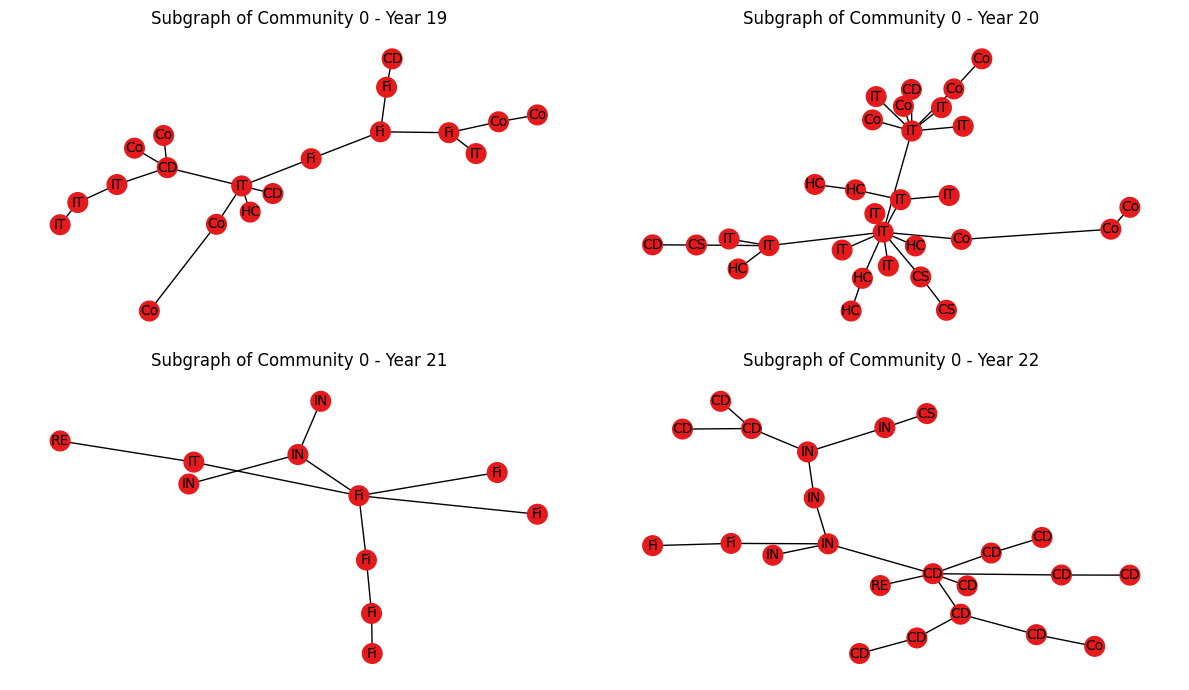

In [244]:
from community import community_louvain

# Assuming mst_19, mst_20, mst_21, and mst_22 are your graphs for each year

# Create a 2x2 grid layout for subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

# Iterate over each year
for i, (year, partition_data) in enumerate([("19", partition_thresholded_19), ("20", partition_thresholded_20), ("21", partition_thresholded_21), ("22", partition_thresholded_22)]):
    row = i // 2
    col = i % 2

    # Fetching the corresponding graph based on the year variable
    graph_for_year = globals()[f"mst_{year}"]

    # Calculate the community structure for the current year
    partition = community_louvain.best_partition(graph_for_year)

    # Extract nodes belonging to Community 0
    community_0_nodes = [node for node, community_id in partition.items() if community_id == 0]

    # Create a subgraph for Community 0
    community_0_subgraph = graph_for_year.subgraph(community_0_nodes)

    # Plot the subgraph of Community 0 for the current year
    pos_community_0 = nx.spring_layout(community_0_subgraph)
    node_labels_dict = {node: node_names_19[node] for node in community_0_subgraph.nodes()}

    # Plot on the current subplot
    axs[row, col].set_title(f'Subgraph of Community 0 - Year {year}')
    node_colors_community_0 = [partition[node] for node in community_0_subgraph.nodes()]
    nx.draw(community_0_subgraph, pos=pos_community_0, labels=node_labels_dict, with_labels=True, node_color=node_colors_community_0, cmap=plt.cm.Set1, node_size=200, font_size=10, edge_color='black', ax=axs[row, col])

# Adjust layout
plt.tight_layout()
plt.show()


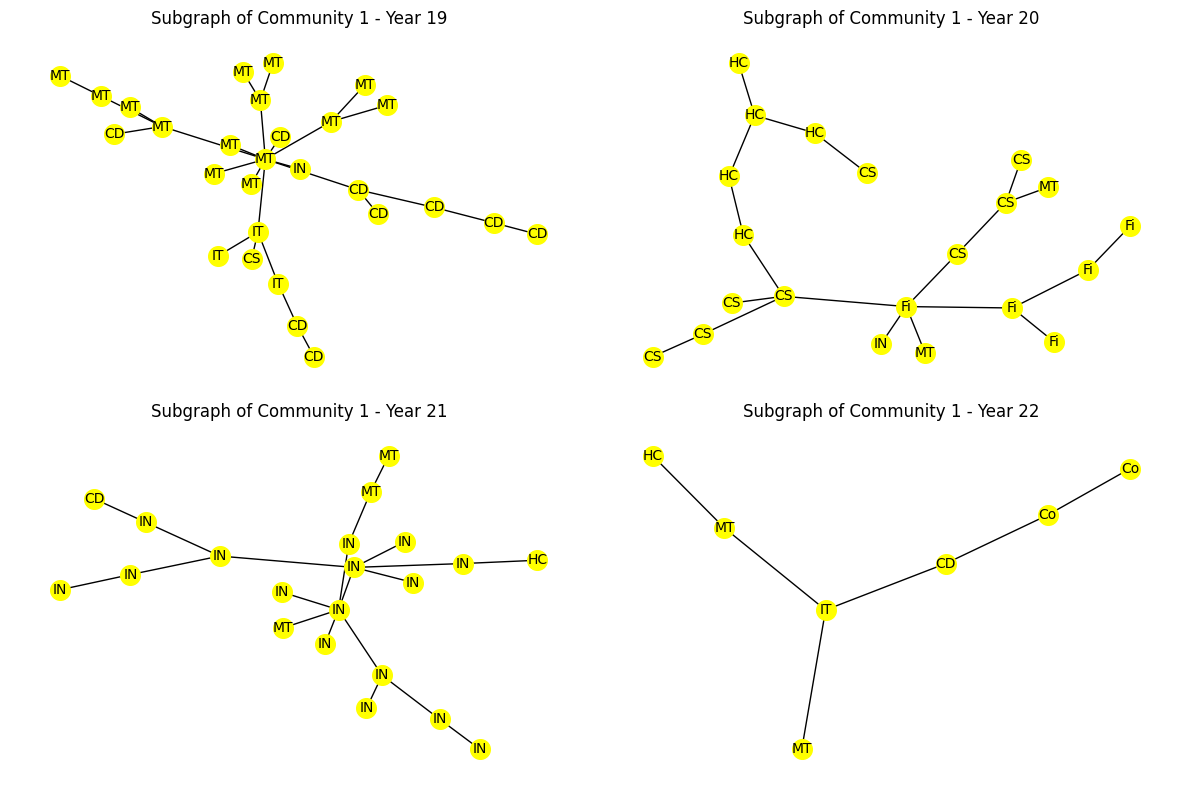

In [245]:
from community import community_louvain

# Assuming mst_19, mst_20, mst_21, and mst_22 are your graphs for each year

# Create a 2x2 grid layout for subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Iterate over each year
for i, (year, partition_data) in enumerate([("19", partition_thresholded_19), ("20", partition_thresholded_20), ("21", partition_thresholded_21), ("22", partition_thresholded_22)]):
    row = i // 2
    col = i % 2

    # Fetching the corresponding graph based on the year variable
    graph_for_year = globals()[f"mst_{year}"]

    # Calculate the community structure for the current year
    partition = community_louvain.best_partition(graph_for_year)

    # Extract nodes belonging to Community 1
    community_0_nodes = [node for node, community_id in partition.items() if community_id == 1]

    # Create a subgraph for Community 1
    community_0_subgraph = graph_for_year.subgraph(community_0_nodes)

    # Plot the subgraph of Community 1 for the current year
    pos_community_0 = nx.spring_layout(community_0_subgraph)
    node_labels_dict = {node: node_names_19[node] for node in community_0_subgraph.nodes()}

    # Plot on the current subplot
    axs[row, col].set_title(f'Subgraph of Community 1 - Year {year}')
    node_colors_community_0 = [partition[node] for node in community_0_subgraph.nodes()]
    nx.draw(community_0_subgraph, pos=pos_community_0, labels=node_labels_dict, with_labels=True, node_color='yellow', cmap=plt.cm.Set1, node_size=200, font_size=10, edge_color='black', ax=axs[row, col])

# Adjust layout
plt.tight_layout()
plt.show()


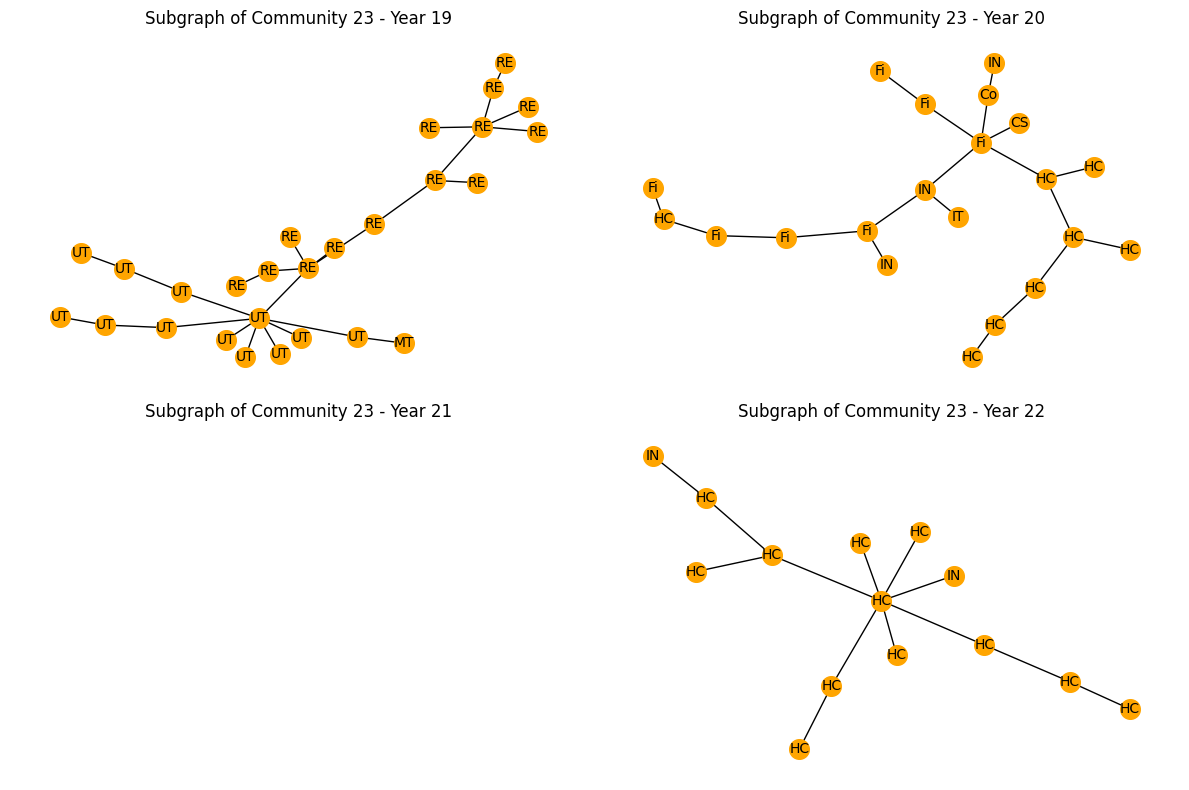

In [253]:
from community import community_louvain

# Assuming mst_19, mst_20, mst_21, and mst_22 are your graphs for each year

# Create a 2x2 grid layout for subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Iterate over each year
for i, (year, partition_data) in enumerate([("19", partition_thresholded_19), ("20", partition_thresholded_20), ("21", partition_thresholded_21), ("22", partition_thresholded_22)]):
    row = i // 2
    col = i % 2

    # Fetching the corresponding graph based on the year variable
    graph_for_year = globals()[f"mst_{year}"]

    # Calculate the community structure for the current year
    partition = community_louvain.best_partition(graph_for_year)

    # Extract nodes belonging to Community 1
    community_0_nodes = [node for node, community_id in partition.items() if community_id == 23]

    # Create a subgraph for Community 1
    community_0_subgraph = graph_for_year.subgraph(community_0_nodes)

    # Plot the subgraph of Community 1 for the current year
    pos_community_0 = nx.spring_layout(community_0_subgraph)
    node_labels_dict = {node: node_names_19[node] for node in community_0_subgraph.nodes()}

    # Plot on the current subplot
    axs[row, col].set_title(f'Subgraph of Community 23 - Year {year}')
    node_colors_community_0 = [partition[node] for node in community_0_subgraph.nodes()]
    nx.draw(community_0_subgraph, pos=pos_community_0, labels=node_labels_dict, with_labels=True, node_color='orange', cmap=plt.cm.Set1, node_size=200, font_size=10, edge_color='black', ax=axs[row, col])

# Adjust layout
plt.tight_layout()
plt.show()


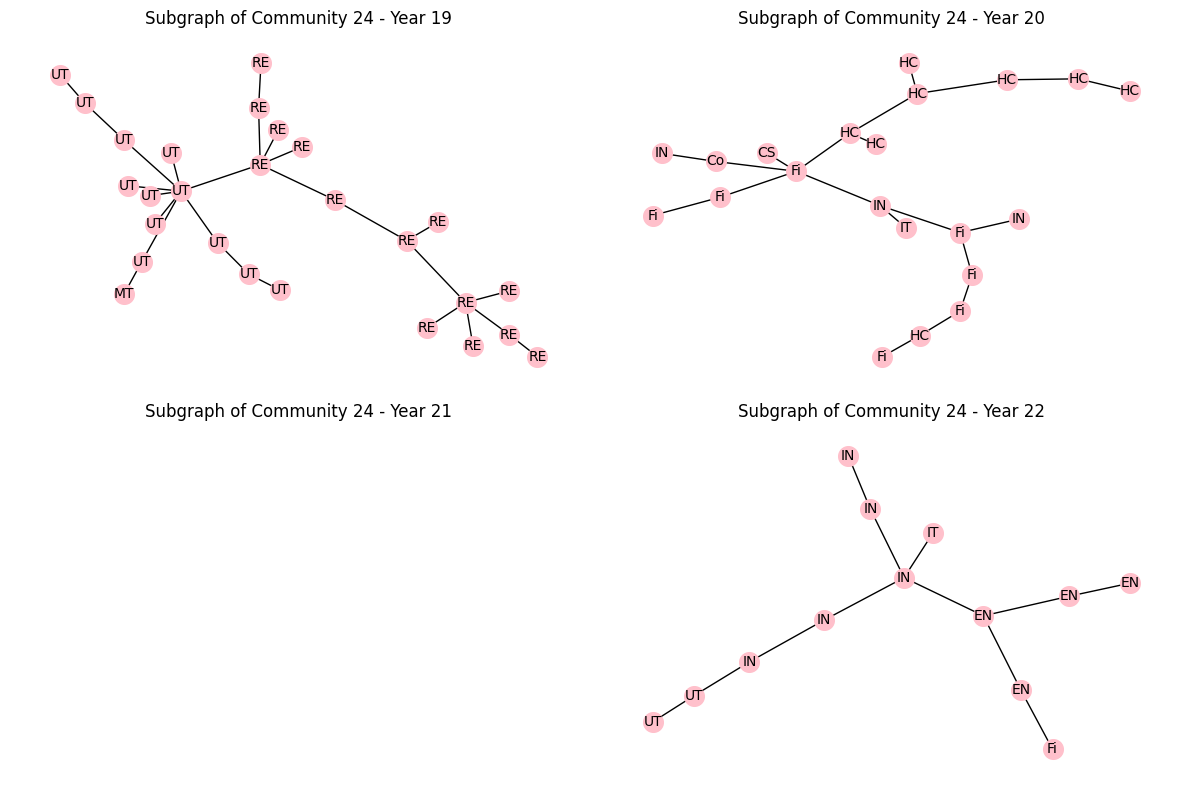

In [252]:
from community import community_louvain

# Assuming mst_19, mst_20, mst_21, and mst_22 are your graphs for each year

# Create a 2x2 grid layout for subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Iterate over each year
for i, (year, partition_data) in enumerate([("19", partition_thresholded_19), ("20", partition_thresholded_20), ("21", partition_thresholded_21), ("22", partition_thresholded_22)]):
    row = i // 2
    col = i % 2

    # Fetching the corresponding graph based on the year variable
    graph_for_year = globals()[f"mst_{year}"]

    # Calculate the community structure for the current year
    partition = community_louvain.best_partition(graph_for_year)

    # Extract nodes belonging to Community 1
    community_0_nodes = [node for node, community_id in partition.items() if community_id == 24]

    # Create a subgraph for Community 1
    community_0_subgraph = graph_for_year.subgraph(community_0_nodes)

    # Plot the subgraph of Community 1 for the current year
    pos_community_0 = nx.spring_layout(community_0_subgraph)
    node_labels_dict = {node: node_names_19[node] for node in community_0_subgraph.nodes()}

    # Plot on the current subplot
    axs[row, col].set_title(f'Subgraph of Community 24 - Year {year}')
    node_colors_community_0 = [partition[node] for node in community_0_subgraph.nodes()]
    nx.draw(community_0_subgraph, pos=pos_community_0, labels=node_labels_dict, with_labels=True, node_color='pink', cmap=plt.cm.Set1, node_size=200, font_size=10, edge_color='black', ax=axs[row, col])

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Assuming you have partitions for each year as partition_thresholded_19, partition_thresholded_20, partition_thresholded_21, partition_thresholded_22

# Combine all partitions into a single list for easier iteration
all_partitions = [partition_thresholded_19, partition_thresholded_20, partition_thresholded_21, partition_thresholded_22]

# Create a dictionary to track node transitions between communities
node_transitions = {}

# Loop through the partitions to track node transitions between communities
for i in range(len(all_partitions) - 1):
    current_partition = all_partitions[i]
    next_partition = all_partitions[i + 1]

    for node, comm_year_i in current_partition.items():
        comm_year_iplus1 = next_partition.get(node, -1)

        if comm_year_i != comm_year_iplus1:
            if node not in node_transitions:
                node_transitions[node] = []

            node_transitions[node].append((i + 2019, comm_year_i, comm_year_iplus1))

# Display node transitions
for node, transitions in node_transitions.items():
    print(f"Node {node}:")
    for year, comm_i, comm_iplus1 in transitions:
        print(f"  Year {year}: Community {comm_i} -> Community {comm_iplus1}")


Node 0:
  Year 2019: Community 0 -> Community 7
  Year 2020: Community 7 -> Community 21
  Year 2021: Community 21 -> Community 0
Node 2:
  Year 2019: Community 2 -> Community 3
  Year 2020: Community 3 -> Community 18
  Year 2021: Community 18 -> Community 2
Node 3:
  Year 2019: Community 11 -> Community 1
  Year 2020: Community 1 -> Community 3
Node 5:
  Year 2019: Community 1 -> Community 11
  Year 2020: Community 11 -> Community 21
  Year 2021: Community 21 -> Community 5
Node 8:
  Year 2019: Community 20 -> Community 1
  Year 2020: Community 1 -> Community 21
  Year 2021: Community 21 -> Community 0
Node 9:
  Year 2019: Community 13 -> Community 11
  Year 2020: Community 11 -> Community 2
  Year 2021: Community 2 -> Community 1
Node 10:
  Year 2019: Community 10 -> Community 1
  Year 2020: Community 1 -> Community 21
  Year 2021: Community 21 -> Community 0
Node 11:
  Year 2019: Community 7 -> Community 4
  Year 2020: Community 4 -> Community 8
  Year 2021: Community 8 -> Communit

In [247]:
# Assuming you have stored community memberships for each year in separate dictionaries:
# sectors_in_communities_19, sectors_in_communities_20, sectors_in_communities_21, sectors_in_communities_22

# Create sets of unique communities for each year
communities_19 = set(sectors_in_communities_19.keys())
communities_20 = set(sectors_in_communities_20.keys())
communities_21 = set(sectors_in_communities_21.keys())
communities_22 = set(sectors_in_communities_22.keys())

# Identify common and unique communities across years
common_communities = communities_19.intersection(communities_20, communities_21, communities_22)
unique_communities_19 = communities_19 - common_communities
unique_communities_20 = communities_20 - common_communities
unique_communities_21 = communities_21 - common_communities
unique_communities_22 = communities_22 - common_communities

# Track changes in community memberships between consecutive years
# Example: Changes from 2019 to 2020
community_changes_19_to_20 = {
    community: (
        set(sectors_in_communities_20.get(community, [])) - set(sectors_in_communities_19.get(community, [])),
        set(sectors_in_communities_19.get(community, [])) - set(sectors_in_communities_20.get(community, []))
    ) for community in common_communities
}

# Similarly, track changes for other year transitions (e.g., 2020 to 2021, 2021 to 2022)

# Print the identified communities and changes
print("Common Communities Across Years:", common_communities)
print("Unique Communities in 2019:", unique_communities_19)
print("Unique Communities in 2020:", unique_communities_20)
print("Unique Communities in 2021:", unique_communities_21)
print("Unique Communities in 2022:", unique_communities_22)
"\nChanges from 2019 to 2020:", community_changes_19_to_20
# Print changes for other year transitions as well


Common Communities Across Years: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22}
Unique Communities in 2019: {24, 23}
Unique Communities in 2020: {24, 23}
Unique Communities in 2021: set()
Unique Communities in 2022: {24, 23}


('\nChanges from 2019 to 2020:',
 {0: ({'CS'}, {'Fi'}),
  1: ({'Co'}, {'CS', 'MT'}),
  2: ({'Fi', 'UT'}, {'Co', 'RE'}),
  3: ({'CS', 'HC'}, {'IN', 'RE'}),
  4: ({'Co', 'IN', 'RE'}, {'CS', 'HC', 'IT'}),
  5: ({'CS', 'Fi'}, {'Co', 'IT', 'RE'}),
  6: (set(), {'CS', 'MT'}),
  7: ({'CS', 'Fi', 'IN'}, set()),
  8: ({'MT'}, set()),
  9: ({'CS', 'EN', 'MT'}, {'Co', 'Fi'}),
  10: ({'IN', 'IT', 'MT'}, {'HC'}),
  11: ({'CS', 'Fi', 'MT'}, {'EN', 'RE'}),
  12: ({'CS', 'Co', 'RE'}, {'HC'}),
  13: ({'Fi'}, {'CS', 'Co', 'EN', 'IN', 'MT'}),
  14: ({'CD', 'Co', 'HC'}, set()),
  15: ({'EN', 'Fi', 'RE'}, set()),
  16: ({'HC'}, {'IN', 'IT', 'MT'}),
  17: ({'Fi', 'HC', 'IN', 'MT'}, {'UT'}),
  18: ({'Co', 'Fi', 'IN'}, set()),
  19: ({'Co', 'Fi'}, {'CS'}),
  20: ({'MT'}, {'HC', 'IN'}),
  21: ({'IT'}, set()),
  22: ({'Fi', 'HC', 'IN', 'IT', 'RE'}, {'UT'})})

In [ ]:
community_changes_20_to_21 = {
    community: (
        set(sectors_in_communities_21.get(community, [])) - set(sectors_in_communities_20.get(community, [])),
        set(sectors_in_communities_20.get(community, [])) - set(sectors_in_communities_21.get(community, []))
    ) for community in common_communities
}
"\nChanges from 2020 to 2021:", community_changes_20_to_21

('\nChanges from 2020 to 2021:',
 {0: ({'Fi', 'IN'}, {'HC'}),
  1: ({'HC'}, {'CD', 'Co', 'IN', 'IT'}),
  2: ({'Co', 'HC', 'IN'}, set()),
  3: (set(), {'IN', 'IT', 'UT'}),
  4: ({'Fi', 'IN'}, {'CS', 'Co', 'HC'}),
  5: ({'CD', 'CS', 'MT'}, {'Fi', 'HC', 'RE'}),
  6: ({'HC'}, {'CS', 'Fi'}),
  7: ({'RE'}, {'CD', 'CS', 'Co', 'HC', 'IT'}),
  8: ({'CD', 'CS', 'IN', 'IT'}, {'RE', 'UT'}),
  9: ({'MT', 'UT'}, {'CD', 'CS', 'Fi', 'IN', 'IT'}),
  10: ({'HC'}, {'MT'}),
  11: (set(), {'CD', 'IN', 'RE'}),
  12: ({'Co', 'Fi'}, {'IT', 'MT'}),
  13: ({'CS'}, {'Co', 'Fi', 'HC', 'IN', 'IT'}),
  14: ({'Co', 'RE'}, {'HC', 'MT'}),
  15: ({'EN'}, {'CD', 'CS', 'Co', 'Fi', 'HC', 'IN', 'IT'}),
  16: ({'EN', 'MT'}, {'CD', 'RE'}),
  17: ({'CS', 'IN', 'UT'}, {'Co', 'Fi', 'IT'}),
  18: ({'CD', 'HC', 'IN', 'MT', 'UT'}, {'CS', 'EN'}),
  19: ({'CD', 'CS', 'HC', 'IN'}, {'MT'}),
  20: ({'Fi', 'MT'}, {'CS', 'HC'}),
  21: ({'CD', 'Co', 'RE'}, {'Fi'}),
  22: ({'Fi', 'IT'}, {'CD', 'EN'})})

In [ ]:
community_changes_21_to_22 = {
    community: (
        set(sectors_in_communities_22.get(community, [])) - set(sectors_in_communities_21.get(community, [])),
        set(sectors_in_communities_21.get(community, [])) - set(sectors_in_communities_22.get(community, []))
    ) for community in common_communities
}
"\nChanges from 2021 to 2022:", community_changes_21_to_22

('\nChanges from 2021 to 2022:',
 {0: ({'CD', 'CS', 'Co'}, set()),
  1: ({'CD', 'Co', 'Fi', 'IN', 'IT'}, set()),
  2: (set(), {'Co', 'Fi', 'HC', 'IN'}),
  3: ({'Co', 'IN', 'MT'}, {'Fi', 'HC'}),
  4: ({'CS', 'Co', 'HC', 'IT'}, set()),
  5: ({'Co', 'RE', 'UT'}, {'CS'}),
  6: ({'CS'}, {'HC', 'IN', 'MT'}),
  7: (set(), set()),
  8: (set(), {'CS', 'IN', 'MT'}),
  9: ({'CS', 'EN'}, {'UT'}),
  10: ({'CS'}, {'CD', 'IN', 'IT'}),
  11: ({'CS', 'IN', 'IT'}, {'Co'}),
  12: ({'CS', 'RE'}, {'CD', 'Co', 'Fi'}),
  13: ({'Co', 'Fi', 'HC', 'IN', 'IT'}, {'CD', 'CS', 'RE'}),
  14: ({'UT'}, {'CD', 'CS', 'Fi', 'IN', 'IT'}),
  15: ({'IN', 'UT'}, set()),
  16: ({'CD', 'RE'}, {'CS', 'Co', 'EN'}),
  17: ({'Fi', 'IT'}, {'CS', 'HC', 'UT'}),
  18: (set(), {'CD', 'MT', 'RE', 'UT'}),
  19: (set(), {'CD', 'CS', 'Co', 'HC', 'IN', 'IT'}),
  20: ({'HC'}, {'Fi', 'MT'}),
  21: (set(), {'CD', 'CS', 'Co', 'IN', 'MT', 'RE'}),
  22: (set(), {'CS', 'Fi', 'IT'})})

This code snippet compares communities across the four years, identifies common communities, and tracks unique communities for each year. It also tracks changes in community memberships between consecutive years (e.g., from 2019 to 2020) for the common communities.

You can adapt this code by including additional comparisons between other years, aggregating statistics on changes, or visualizing the community evolution based on your specific analysis requirements. Adjust the variable names and structures based on your actual data storage and requirements.







## MaxEigen Values and MeanCorrelation

In [325]:
import pandas as pd
import numpy as np

# Assuming 'corr_matrix_19' contains the correlation matrix of companies

sectors = ['ComServ', 'CD', 'CS', 'EN', 'Fin', 'HC', 'IN', 'IT', 'MT', 'RE', 'UT']
sector_avg_corr = {}  # Dictionary to store mean correlations
sector_max_eigen = {}  # Dictionary to store maximum eigenvalues

# Iterate over sectors
for sector in sectors:
    # Modify the filtering condition for sector based on the name before the underscore
    sector_companies = [company for company in corr_19.columns if company.split('_')[0] == sector]

    # print(f"Sector: {sector}, Companies: {sector_companies}")

    # Create a submatrix with companies of the specific sector
    submatrix = corr_19.loc[sector_companies, sector_companies]

    # print(f"Submatrix for {sector}:\n{submatrix}")

    # Check if the submatrix is non-empty
    if not submatrix.empty and not submatrix.isnull().values.all():
        # Calculate mean correlation for the sector
        mean_corr = submatrix.mean().mean()
        sector_avg_corr[sector] = mean_corr

        # Calculate maximum eigenvalue for the sector
        max_eigen = np.max(np.linalg.eigvals(submatrix))
        sector_max_eigen[sector] = max_eigen
    else:
        print(f"Warning: No valid data for sector {sector}")

# Convert dictionaries to DataFrames
avg_corr_19 = pd.DataFrame(list(sector_avg_corr.items()), columns=['Sector', 'Mean_Correlation'])
max_eigen_19 = pd.DataFrame(list(sector_max_eigen.items()), columns=['Sector', 'Max_Eigenvalue'])

# Merge DataFrames on 'Sector'
result = pd.merge(avg_corr_19, max_eigen_19, on='Sector')

# Display the calculated values in a table
print("/n 2019 MaxEigen Value and Mean Corrleation")
result


/n 2019 MaxEigen Value and Mean Corrleation


Sector  Mean_Correlation  Max_Eigenvalue
0   ComServ          0.317543        6.581385
1        CD          0.279468       15.471518
2        CS          0.230766        9.175337
3        EN          0.550961       12.875302
4       Fin          0.455306       34.100961
5        HC          0.333800       21.940679
6        IN          0.419799       32.442205
7        IT          0.413755       27.585123
8        MT          0.370412       10.875278
9        RE          0.481072       15.651574
10       UT          0.562140       17.204093

In [326]:
import pandas as pd
import numpy as np

# Assuming 'corr_matrix_19' contains the correlation matrix of companies

sectors = ['ComServ', 'CD', 'CS', 'EN', 'Fin', 'HC', 'IN', 'IT', 'MT', 'RE', 'UT']
sector_avg_corr = {}  # Dictionary to store mean correlations
sector_max_eigen = {}  # Dictionary to store maximum eigenvalues

# Iterate over sectors
for sector in sectors:
    # Modify the filtering condition for sector based on the name before the underscore
    sector_companies = [company for company in corr_20.columns if company.split('_')[0] == sector]

    # print(f"Sector: {sector}, Companies: {sector_companies}")

    # Create a submatrix with companies of the specific sector
    submatrix = corr_20.loc[sector_companies, sector_companies]

    # print(f"Submatrix for {sector}:\n{submatrix}")

    # Check if the submatrix is non-empty
    if not submatrix.empty and not submatrix.isnull().values.all():
        # Calculate mean correlation for the sector
        mean_corr = submatrix.mean().mean()
        sector_avg_corr[sector] = mean_corr

        # Calculate maximum eigenvalue for the sector
        max_eigen = np.max(np.linalg.eigvals(submatrix))
        sector_max_eigen[sector] = max_eigen
    else:
        print(f"Warning: No valid data for sector {sector}")

# Convert dictionaries to DataFrames
avg_corr_20 = pd.DataFrame(list(sector_avg_corr.items()), columns=['Sector', 'Mean_Correlation'])
max_eigen_20 = pd.DataFrame(list(sector_max_eigen.items()), columns=['Sector', 'Max_Eigenvalue'])

# Merge DataFrames on 'Sector'
result = pd.merge(avg_corr_20, max_eigen_20, on='Sector')

# Display the calculated values in a table
print("/n 2020 MaxEigen Value and Mean Corrleation")
result


/n 2020 MaxEigen Value and Mean Corrleation


Sector  Mean_Correlation  Max_Eigenvalue
0   ComServ          0.535430       12.043125
1        CD          0.549162       29.370832
2        CS          0.503172       19.119188
3        EN          0.694774       16.486105
4       Fin          0.691718       50.404570
5        HC          0.518004       33.617871
6        IN          0.635987       47.670297
7        IT          0.615158       39.908436
8        MT          0.642455       19.002823
9        RE          0.659769       20.639474
10       UT          0.738218       21.610592

In [327]:
import pandas as pd
import numpy as np

# Assuming 'corr_matrix_19' contains the correlation matrix of companies

sectors = ['ComServ', 'CD', 'CS', 'EN', 'Fin', 'HC', 'IN', 'IT', 'MT', 'RE', 'UT']
sector_avg_corr = {}  # Dictionary to store mean correlations
sector_max_eigen = {}  # Dictionary to store maximum eigenvalues

# Iterate over sectors
for sector in sectors:
    # Modify the filtering condition for sector based on the name before the underscore
    sector_companies = [company for company in corr_21.columns if company.split('_')[0] == sector]

    # print(f"Sector: {sector}, Companies: {sector_companies}")

    # Create a submatrix with companies of the specific sector
    submatrix = corr_21.loc[sector_companies, sector_companies]

    # print(f"Submatrix for {sector}:\n{submatrix}")

    # Check if the submatrix is non-empty
    if not submatrix.empty and not submatrix.isnull().values.all():
        # Calculate mean correlation for the sector
        mean_corr = submatrix.mean().mean()
        sector_avg_corr[sector] = mean_corr

        # Calculate maximum eigenvalue for the sector
        max_eigen = np.max(np.linalg.eigvals(submatrix))
        sector_max_eigen[sector] = max_eigen
    else:
        print(f"Warning: No valid data for sector {sector}")

# Convert dictionaries to DataFrames
avg_corr_21 = pd.DataFrame(list(sector_avg_corr.items()), columns=['Sector', 'Mean_Correlation'])
max_eigen_21 = pd.DataFrame(list(sector_max_eigen.items()), columns=['Sector', 'Max_Eigenvalue'])

# Merge DataFrames on 'Sector'
result = pd.merge(avg_corr_21, max_eigen_21, on='Sector')

# Display the calculated values in a table
print("2021 MaxEigen Value and Mean Corrleation")
result


2021 MaxEigen Value and Mean Corrleation


Sector  Mean_Correlation  Max_Eigenvalue
0   ComServ          0.256650        6.000531
1        CD          0.330053       18.347527
2        CS          0.311179       12.311356
3        EN          0.723597       16.807499
4       Fin          0.479538       37.154180
5        HC          0.254615       17.057965
6        IN          0.396119       31.569411
7        IT          0.398121       27.167304
8        MT          0.435854       13.150115
9        RE          0.440207       14.279719
10       UT          0.560290       16.810093

In [328]:
import pandas as pd
import numpy as np

# Assuming 'corr_matrix_19' contains the correlation matrix of companies

sectors = ['ComServ', 'CD', 'CS', 'EN', 'Fin', 'HC', 'IN', 'IT', 'MT', 'RE', 'UT']
sector_avg_corr = {}  # Dictionary to store mean correlations
sector_max_eigen = {}  # Dictionary to store maximum eigenvalues

# Iterate over sectors
for sector in sectors:
    # Modify the filtering condition for sector based on the name before the underscore
    sector_companies = [company for company in corr_22.columns if company.split('_')[0] == sector]

    # print(f"Sector: {sector}, Companies: {sector_companies}")

    # Create a submatrix with companies of the specific sector
    submatrix = corr_22.loc[sector_companies, sector_companies]

    # print(f"Submatrix for {sector}:\n{submatrix}")

    # Check if the submatrix is non-empty
    if not submatrix.empty and not submatrix.isnull().values.all():
        # Calculate mean correlation for the sector
        mean_corr = submatrix.mean().mean()
        sector_avg_corr[sector] = mean_corr

        # Calculate maximum eigenvalue for the sector
        max_eigen = np.max(np.linalg.eigvals(submatrix))
        sector_max_eigen[sector] = max_eigen
    else:
        print(f"Warning: No valid data for sector {sector}")

# Convert dictionaries to DataFrames
avg_corr_22 = pd.DataFrame(list(sector_avg_corr.items()), columns=['Sector', 'Mean_Correlation'])
max_eigen_22 = pd.DataFrame(list(sector_max_eigen.items()), columns=['Sector', 'Max_Eigenvalue'])

# Merge DataFrames on 'Sector'
result = pd.merge(avg_corr_22, max_eigen_22, on='Sector')

# Display the calculated values in a table
print("2022 MaxEigen Value and Mean Corrleation")
result


2022 MaxEigen Value and Mean Corrleation


Sector  Mean_Correlation  Max_Eigenvalue
0   ComServ          0.460652       10.394898
1        CD          0.538448       28.863970
2        CS          0.433352       16.524291
3        EN          0.751667       17.365182
4       Fin          0.576104       42.350821
5        HC          0.429329       27.933743
6        IN          0.526173       41.143900
7        IT          0.609423       39.882625
8        MT          0.515566       15.472031
9        RE          0.653341       20.441618
10       UT          0.733531       21.659696

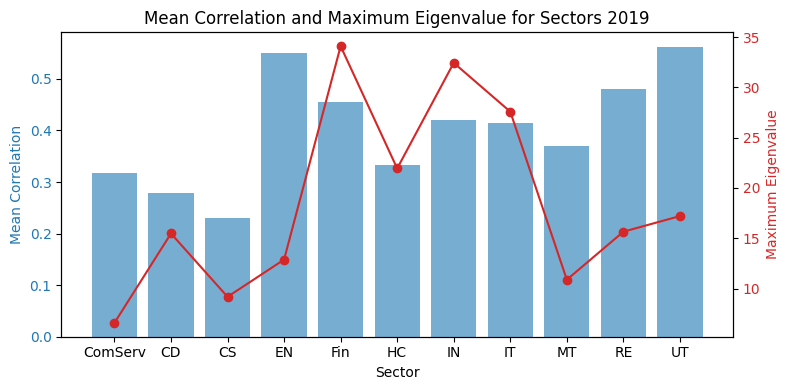

In [329]:
import matplotlib.pyplot as plt

# Assuming you've calculated avg_corr_df and max_eigen_df as shown in the previous code

fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot Mean Correlation on primary y-axis
ax1.set_xlabel('Sector')
ax1.set_ylabel('Mean Correlation', color='tab:blue')
ax1.bar(avg_corr_19['Sector'], avg_corr_19['Mean_Correlation'], color='tab:blue', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Maximum Eigenvalue', color='tab:red')
ax2.plot(max_eigen_19['Sector'], max_eigen_19['Max_Eigenvalue'], color='tab:red', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Title and display
plt.title('Mean Correlation and Maximum Eigenvalue for Sectors 2019')
fig.tight_layout()
plt.show()


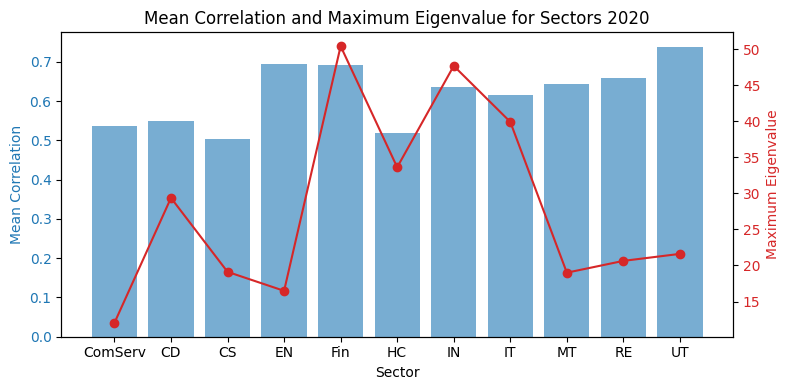

In [330]:
import matplotlib.pyplot as plt

# Assuming you've calculated avg_corr_df and max_eigen_df as shown in the previous code

fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot Mean Correlation on primary y-axis
ax1.set_xlabel('Sector')
ax1.set_ylabel('Mean Correlation', color='tab:blue')
ax1.bar(avg_corr_20['Sector'], avg_corr_20['Mean_Correlation'], color='tab:blue', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Maximum Eigenvalue', color='tab:red')
ax2.plot(max_eigen_20['Sector'], max_eigen_20['Max_Eigenvalue'], color='tab:red', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Title and display
plt.title('Mean Correlation and Maximum Eigenvalue for Sectors 2020')
fig.tight_layout()
plt.show()


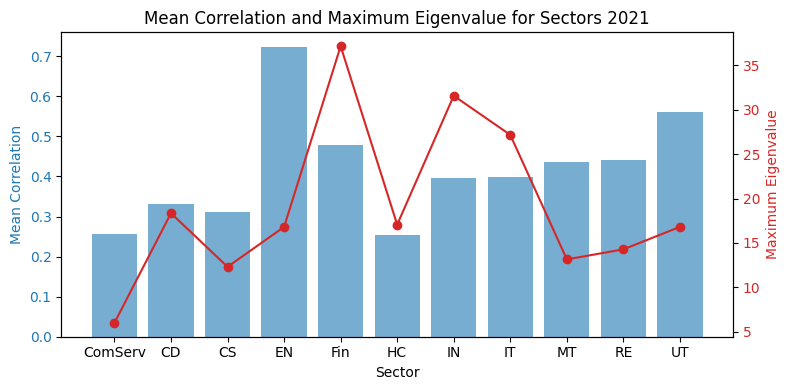

In [331]:
import matplotlib.pyplot as plt

# Assuming you've calculated avg_corr_df and max_eigen_df as shown in the previous code

fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot Mean Correlation on primary y-axis
ax1.set_xlabel('Sector')
ax1.set_ylabel('Mean Correlation', color='tab:blue')
ax1.bar(avg_corr_21['Sector'], avg_corr_21['Mean_Correlation'], color='tab:blue', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Maximum Eigenvalue', color='tab:red')
ax2.plot(max_eigen_21['Sector'], max_eigen_21['Max_Eigenvalue'], color='tab:red', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Title and display
plt.title('Mean Correlation and Maximum Eigenvalue for Sectors 2021')
fig.tight_layout()
plt.show()


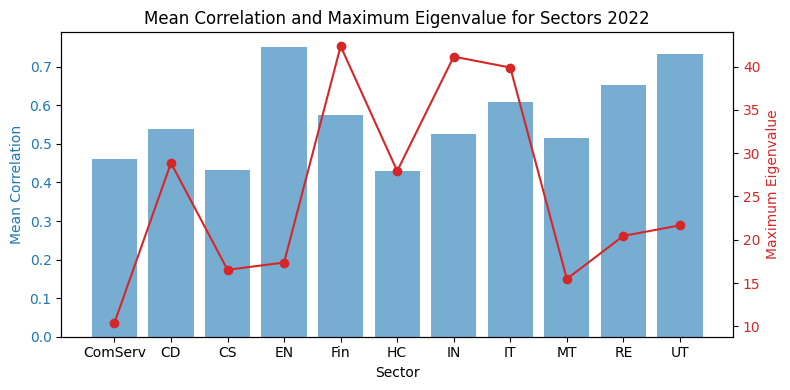

In [336]:
import matplotlib.pyplot as plt

# Assuming you've calculated avg_corr_df and max_eigen_df as shown in the previous code

fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot Mean Correlation on primary y-axis
ax1.set_xlabel('Sector')
ax1.set_ylabel('Mean Correlation', color='tab:blue')
ax1.bar(avg_corr_22['Sector'], avg_corr_22['Mean_Correlation'], color='tab:blue', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Maximum Eigenvalue', color='tab:red')
ax2.plot(max_eigen_22['Sector'], max_eigen_22['Max_Eigenvalue'], color='tab:red', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Title and display
plt.title('Mean Correlation and Maximum Eigenvalue for Sectors 2022')
fig.tight_layout()
plt.show()


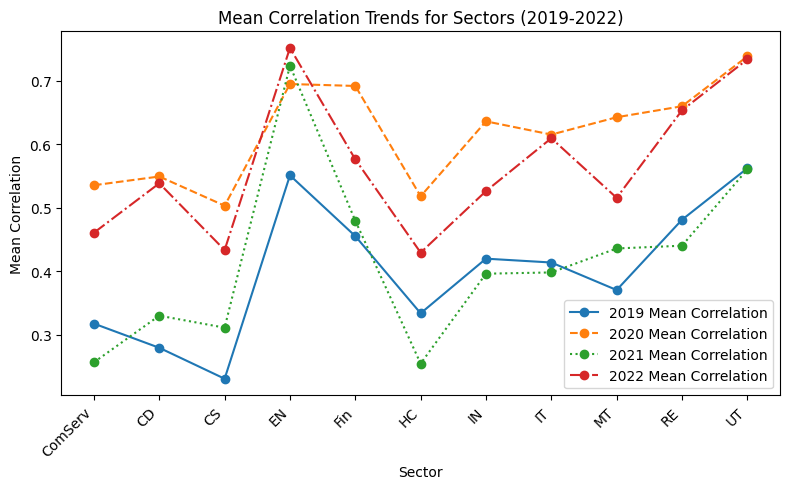

In [334]:
import matplotlib.pyplot as plt

# Concatenate dataframes for all four years (assuming you have avg_corr_19, avg_corr_20, avg_corr_21, avg_corr_22)
avg_corr_combined = pd.concat([avg_corr_19, avg_corr_20, avg_corr_21, avg_corr_22], keys=['2019', '2020', '2021', '2022'])

# Reset index for proper plotting
avg_corr_combined.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(8, 5))  # Adjusted figure size

# Plot Mean Correlation for all four years with different line styles
for year, color, linestyle in zip(['2019', '2020', '2021', '2022'], ['tab:blue', 'tab:orange', 'tab:green', 'tab:red'], ['-', '--', ':', '-.']):
    data_year = avg_corr_combined[avg_corr_combined['level_0'] == year]
    ax.plot(data_year['Sector'], data_year['Mean_Correlation'], marker='o', label=f'{year} Mean Correlation', color=color, linestyle=linestyle)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Align labels to the right for better readability
plt.legend()
plt.xlabel('Sector')
plt.ylabel('Mean Correlation')
plt.title('Mean Correlation Trends for Sectors (2019-2022)')
plt.tight_layout()
plt.show()


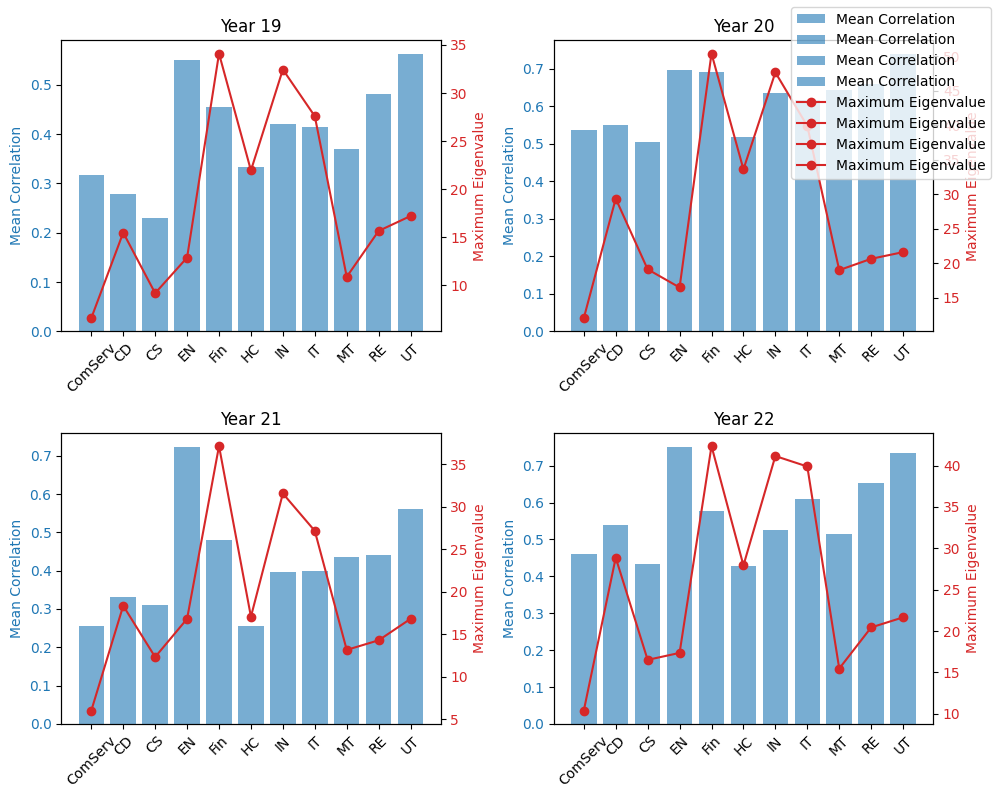

In [337]:
import matplotlib.pyplot as plt

years = ["19", "20", "21", "22"]  # List of years

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, year in enumerate(years):
    # Example Data (Replace with your actual variable names)
    avg_corr = globals()[f"avg_corr_{year}"]  # DataFrame for mean correlation
    max_eigen = globals()[f"max_eigen_{year}"]  # DataFrame for max eigenvalue

    # Calculate the position in the grid
    row = i // 2
    col = i % 2

    # Plot Mean Correlation on primary y-axis
    ax = axs[row, col]
    ax.bar(avg_corr['Sector'], avg_corr['Mean_Correlation'], color='tab:blue', alpha=0.6, label='Mean Correlation')
    ax.tick_params(axis='y', labelcolor='tab:blue')
    ax.set_ylabel('Mean Correlation', color='tab:blue')

    # Create a secondary y-axis
    ax2 = ax.twinx()
    ax2.plot(max_eigen['Sector'], max_eigen['Max_Eigenvalue'], color='tab:red', marker='o', label='Maximum Eigenvalue')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    ax2.set_ylabel('Maximum Eigenvalue', color='tab:red')

    # Title for the plot
    ax.set_title(f'Year {year}')

    # Rotate x-axis labels for better readability (if needed)
    plt.setp(ax.get_xticklabels(), rotation=45)

# Add legend for all subplots
fig.legend(loc='upper right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


## Network Dynamics

In [261]:
import warnings

# Ignore all warnings (not recommended in general)
warnings.filterwarnings("ignore")
# Your code generating warnings


In [283]:
import networkx as nx
import numpy as np
import pandas as pd

# Assuming 'DistMat' contains the distance matrix of companies

# Define sectors
sectors = ['ComServ', 'CD', 'CS', 'EN', 'Fin', 'HC', 'IN', 'IT', 'MT', 'RE', 'UT']

# Initialize an empty DataFrame to store metrics
metrics_df = pd.DataFrame(columns=['Sector', 'Nodes', 'Edges', 'Avg_Degree', 'Path_Length', 'Betweenness_Centrality', 'Closeness_Centrality', 'Eigenvector_Centrality'])

# Iterate over sectors
for sector in sectors:
    # Extract sector name before the underscore
    sector_name = sector.split('_')[0]

    # Filter companies belonging to the specific sector
    sector_companies = [company for company in DistMat_19.columns if company.startswith(f"{sector_name}_")]

    # Create a subgraph with companies of the specific sector
    subgraph = DistMat_19[sector_companies].loc[sector_companies]
    G = nx.from_numpy_array(np.array(subgraph))

    # Calculate the minimum spanning tree using NetworkX
    mst = nx.minimum_spanning_tree(G)

    # Calculate desired metrics
    nodes = len(mst.nodes())
    edges = len(mst.edges())
    avg_degree = np.mean([val for (node, val) in mst.degree()])
    path_length = nx.average_shortest_path_length(mst)
    betweenness_centrality = nx.betweenness_centrality(mst)
    closeness_centrality = nx.closeness_centrality(mst)
    eigenvector_centrality = nx.eigenvector_centrality(mst, max_iter=1000, tol=1e-6)

    # Add the calculated metrics to the DataFrame
    metrics_df = metrics_df.append({'Sector': sector,
                                    'Nodes': nodes,
                                    'Edges': edges,
                                    'Avg_Degree': avg_degree,
                                    'Path_Length': path_length,
                                    'Betweenness_Centrality': np.mean(list(betweenness_centrality.values())),
                                    'Closeness_Centrality': np.mean(list(closeness_centrality.values())),
                                    'Eigenvector_Centrality': np.mean(list(eigenvector_centrality.values()))}, ignore_index=True)

# Display the table with network metrics for each sector
print("Network Evolution 2019")
metrics_df


Network Evolution 2019


Sector Nodes Edges  Avg_Degree  Path_Length  Betweenness_Centrality  \
0   ComServ    20    19    1.900000     4.415789                0.189766   
1        CD    52    51    1.961538     5.943439                0.098869   
2        CS    37    36    1.945946     4.711712                0.106049   
3        EN    23    22    1.913043     3.984190                0.142104   
4       Fin    72    71    1.972222     7.955399                0.099363   
5        HC    63    62    1.968254     5.437788                0.072751   
6        IN    74    73    1.972973     5.680118                0.065002   
7        IT    64    63    1.968750     7.480159                0.104519   
8        MT    27    26    1.925926     4.039886                0.121595   
9        RE    31    30    1.935484     5.002151                0.138005   
10       UT    29    28    1.931034     3.310345                0.085568   

    Closeness_Centrality  Eigenvector_Centrality  
0               0.236975                0.178835  
1               0.173875                0.076334  
2               0.222469                0.111830  
3               0.264910                0.156117  
4               0.132066                0.070802  
5               0.191972                0.074247  
6               0.184325                0.067325  
7               0.139783                0.068852  
8               0.257946                0.134153  
9               0.209188                0.136780  
10              0.316337                0.139660

In [281]:
import networkx as nx
import numpy as np
import pandas as pd

# Assuming 'DistMat' contains the distance matrix of companies

# Define sectors
sectors = ['ComServ', 'CD', 'CS', 'EN', 'Fin', 'HC', 'IN', 'IT', 'MT', 'RE', 'UT']

# Initialize an empty DataFrame to store metrics
metrics_df = pd.DataFrame(columns=['Sector', 'Nodes', 'Edges', 'Avg_Degree', 'Path_Length', 'Betweenness_Centrality', 'Closeness_Centrality', 'Eigenvector_Centrality'])

# Iterate over sectors
for sector in sectors:
    # Extract sector name before the underscore
    sector_name = sector.split('_')[0]

    # Filter companies belonging to the specific sector
    sector_companies = [company for company in DistMat_20.columns if company.startswith(f"{sector_name}_")]

    # Create a subgraph with companies of the specific sector
    subgraph = DistMat_20[sector_companies].loc[sector_companies]
    G = nx.from_numpy_array(np.array(subgraph))

    # Calculate the minimum spanning tree using NetworkX
    mst = nx.minimum_spanning_tree(G)

    # Calculate desired metrics
    nodes = len(mst.nodes())
    edges = len(mst.edges())
    avg_degree = np.mean([val for (node, val) in mst.degree()])
    path_length = nx.average_shortest_path_length(mst)
    betweenness_centrality = nx.betweenness_centrality(mst)
    closeness_centrality = nx.closeness_centrality(mst)
    eigenvector_centrality = nx.eigenvector_centrality(mst, max_iter=1000, tol=1e-6)

    # Add the calculated metrics to the DataFrame
    metrics_df = metrics_df.append({'Sector': sector,
                                    'Nodes': nodes,
                                    'Edges': edges,
                                    'Avg_Degree': avg_degree,
                                    'Path_Length': path_length,
                                    'Betweenness_Centrality': np.mean(list(betweenness_centrality.values())),
                                    'Closeness_Centrality': np.mean(list(closeness_centrality.values())),
                                    'Eigenvector_Centrality': np.mean(list(eigenvector_centrality.values()))}, ignore_index=True)

# Display the table with network metrics for each sector
print("Network Evolution 2020")
metrics_df


Network Evolution 2020


Sector Nodes Edges  Avg_Degree  Path_Length  Betweenness_Centrality  \
0   ComServ    22    21    1.909091     4.714286                0.185714   
1        CD    52    51    1.961538     6.419306                0.108386   
2        CS    37    36    1.945946     4.507508                0.100215   
3        EN    23    22    1.913043     4.498024                0.166573   
4       Fin    72    71    1.972222     6.689750                0.081282   
5        HC    63    62    1.968254     5.631336                0.075924   
6        IN    74    73    1.972973     6.129952                0.071249   
7        IT    64    63    1.968750     6.857143                0.094470   
8        MT    29    28    1.931034     3.960591                0.109652   
9        RE    31    30    1.935484     5.453763                0.153578   
10       UT    29    28    1.931034     4.354680                0.124247   

    Closeness_Centrality  Eigenvector_Centrality  
0               0.221608                0.176658  
1               0.162594                0.078848  
2               0.232794                0.110600  
3               0.233385                0.166237  
4               0.155591                0.079839  
5               0.184413                0.089191  
6               0.168523                0.055233  
7               0.149839                0.066929  
8               0.266890                0.129942  
9               0.191550                0.136218  
10              0.237852                0.154863

In [284]:
import networkx as nx
import numpy as np
import pandas as pd

# Assuming 'DistMat' contains the distance matrix of companies

# Define sectors
sectors = ['ComServ', 'CD', 'CS', 'EN', 'Fin', 'HC', 'IN', 'IT', 'MT', 'RE', 'UT']

# Initialize an empty DataFrame to store metrics
metrics_df = pd.DataFrame(columns=['Sector', 'Nodes', 'Edges', 'Avg_Degree', 'Path_Length', 'Betweenness_Centrality', 'Closeness_Centrality', 'Eigenvector_Centrality'])

# Iterate over sectors
for sector in sectors:
    # Extract sector name before the underscore
    sector_name = sector.split('_')[0]

    # Filter companies belonging to the specific sector
    sector_companies = [company for company in DistMat_21.columns if company.startswith(f"{sector_name}_")]

    # Create a subgraph with companies of the specific sector
    subgraph = DistMat_21[sector_companies].loc[sector_companies]
    G = nx.from_numpy_array(np.array(subgraph))

    # Calculate the minimum spanning tree using NetworkX
    mst = nx.minimum_spanning_tree(G)

    # Calculate desired metrics
    nodes = len(mst.nodes())
    edges = len(mst.edges())
    avg_degree = np.mean([val for (node, val) in mst.degree()])
    path_length = nx.average_shortest_path_length(mst)
    betweenness_centrality = nx.betweenness_centrality(mst)
    closeness_centrality = nx.closeness_centrality(mst)
    eigenvector_centrality = nx.eigenvector_centrality(mst, max_iter=1000, tol=1e-6)

    # Add the calculated metrics to the DataFrame
    metrics_df = metrics_df.append({'Sector': sector,
                                    'Nodes': nodes,
                                    'Edges': edges,
                                    'Avg_Degree': avg_degree,
                                    'Path_Length': path_length,
                                    'Betweenness_Centrality': np.mean(list(betweenness_centrality.values())),
                                    'Closeness_Centrality': np.mean(list(closeness_centrality.values())),
                                    'Eigenvector_Centrality': np.mean(list(eigenvector_centrality.values()))}, ignore_index=True)

# Display the table with network metrics for each sector
print("Network Evolution 2021")
metrics_df


Network Evolution 2021


Sector Nodes Edges  Avg_Degree  Path_Length  Betweenness_Centrality  \
0   ComServ    22    21    1.909091     4.787879                0.189394   
1        CD    53    52    1.962264     6.911466                0.115911   
2        CS    37    36    1.945946     4.864865                0.110425   
3        EN    23    22    1.913043     3.683794                0.127800   
4       Fin    72    71    1.972222     8.282864                0.104041   
5        HC    63    62    1.968254     8.335893                0.120261   
6        IN    76    75    1.973684     6.765965                0.077918   
7        IT    64    63    1.968750     6.440972                0.087758   
8        MT    29    28    1.931034     4.004926                0.111294   
9        RE    31    30    1.935484     5.303226                0.148387   
10       UT    29    28    1.931034     3.679803                0.099252   

    Closeness_Centrality  Eigenvector_Centrality  
0               0.217733                0.176461  
1               0.150335                0.102131  
2               0.214849                0.110386  
3               0.283597                0.163827  
4               0.126953                0.066499  
5               0.124524                0.067229  
6               0.155488                0.066872  
7               0.160854                0.073784  
8               0.261300                0.134839  
9               0.195863                0.127032  
10              0.284625                0.130684

In [285]:
import networkx as nx
import numpy as np
import pandas as pd

# Assuming 'DistMat' contains the distance matrix of companies

# Define sectors
sectors = ['ComServ', 'CD', 'CS', 'EN', 'Fin', 'HC', 'IN', 'IT', 'MT', 'RE', 'UT']

# Initialize an empty DataFrame to store metrics
metrics_df = pd.DataFrame(columns=['Sector', 'Nodes', 'Edges', 'Avg_Degree', 'Path_Length', 'Betweenness_Centrality', 'Closeness_Centrality', 'Eigenvector_Centrality'])

# Iterate over sectors
for sector in sectors:
    # Extract sector name before the underscore
    sector_name = sector.split('_')[0]

    # Filter companies belonging to the specific sector
    sector_companies = [company for company in DistMat_22.columns if company.startswith(f"{sector_name}_")]

    # Create a subgraph with companies of the specific sector
    subgraph = DistMat_22[sector_companies].loc[sector_companies]
    G = nx.from_numpy_array(np.array(subgraph))

    # Calculate the minimum spanning tree using NetworkX
    mst = nx.minimum_spanning_tree(G)

    # Calculate desired metrics
    nodes = len(mst.nodes())
    edges = len(mst.edges())
    avg_degree = np.mean([val for (node, val) in mst.degree()])
    path_length = nx.average_shortest_path_length(mst)
    betweenness_centrality = nx.betweenness_centrality(mst)
    closeness_centrality = nx.closeness_centrality(mst)
    eigenvector_centrality = nx.eigenvector_centrality(mst, max_iter=1000, tol=1e-6)

    # Add the calculated metrics to the DataFrame
    metrics_df = metrics_df.append({'Sector': sector,
                                    'Nodes': nodes,
                                    'Edges': edges,
                                    'Avg_Degree': avg_degree,
                                    'Path_Length': path_length,
                                    'Betweenness_Centrality': np.mean(list(betweenness_centrality.values())),
                                    'Closeness_Centrality': np.mean(list(closeness_centrality.values())),
                                    'Eigenvector_Centrality': np.mean(list(eigenvector_centrality.values()))}, ignore_index=True)

# Display the table with network metrics for each sector
print("Network Evolution 2022")
metrics_df


Network Evolution 2022


Sector Nodes Edges  Avg_Degree  Path_Length  Betweenness_Centrality  \
0   ComServ    22    21    1.909091     4.043290                0.152165   
1        CD    53    52    1.962264     6.792453                0.113578   
2        CS    37    36    1.945946     4.303303                0.094380   
3        EN    23    22    1.913043     3.960474                0.140975   
4       Fin    72    71    1.972222     7.304382                0.090063   
5        HC    63    62    1.968254     7.224782                0.102046   
6        IN    76    75    1.973684     5.690877                0.063390   
7        IT    64    63    1.968750     4.975198                0.064116   
8        MT    29    28    1.931034     4.187192                0.118044   
9        RE    31    30    1.935484     4.563441                0.122877   
10       UT    29    28    1.931034     4.014778                0.111658   

    Closeness_Centrality  Eigenvector_Centrality  
0               0.258281                0.171921  
1               0.152364                0.092961  
2               0.242481                0.123680  
3               0.266165                0.161154  
4               0.143037                0.078688  
5               0.143405                0.061596  
6               0.183653                0.070828  
7               0.208125                0.086674  
8               0.248090                0.146293  
9               0.228910                0.127064  
10              0.259909                0.136588